# Import librairies and load data

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [27]:
goalscorers = pd.read_csv('archive/goalscorers.csv', sep=',')
results = pd.read_csv('archive/results.csv', sep=',')
shootouts = pd.read_csv('archive/shootouts.csv', sep=',')

# Data analysis

In [28]:
goalscorers.head()

date  home_team away_team       team            scorer  minute  \
0  1916-07-02      Chile   Uruguay    Uruguay   José Piendibene    44.0   
1  1916-07-02      Chile   Uruguay    Uruguay  Isabelino Gradín    55.0   
2  1916-07-02      Chile   Uruguay    Uruguay  Isabelino Gradín    70.0   
3  1916-07-02      Chile   Uruguay    Uruguay   José Piendibene    75.0   
4  1916-07-06  Argentina     Chile  Argentina     Alberto Ohaco     2.0   

   own_goal  penalty  
0     False    False  
1     False    False  
2     False    False  
3     False    False  
4     False    False

In [29]:
goalscorers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41113 entries, 0 to 41112
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       41113 non-null  object 
 1   home_team  41113 non-null  object 
 2   away_team  41113 non-null  object 
 3   team       41113 non-null  object 
 4   scorer     41064 non-null  object 
 5   minute     40855 non-null  float64
 6   own_goal   41113 non-null  bool   
 7   penalty    41113 non-null  bool   
dtypes: bool(2), float64(1), object(5)
memory usage: 2.0+ MB


In [30]:
goalscorers.isna().sum()

date           0
home_team      0
away_team      0
team           0
scorer        49
minute       258
own_goal       0
penalty        0
dtype: int64

That dataset contains 41113 examples and 8 features.\
scorer and minute features have NaN values, which might be explained if the game is draw.

In [31]:
results.head()

date home_team away_team  home_score  away_score tournament     city  \
0  1872-11-30  Scotland   England           0           0   Friendly  Glasgow   
1  1873-03-08   England  Scotland           4           2   Friendly   London   
2  1874-03-07  Scotland   England           2           1   Friendly  Glasgow   
3  1875-03-06   England  Scotland           2           2   Friendly   London   
4  1876-03-04  Scotland   England           3           0   Friendly  Glasgow   

    country  neutral  
0  Scotland    False  
1   England    False  
2  Scotland    False  
3   England    False  
4  Scotland    False

In [32]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45100 entries, 0 to 45099
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        45100 non-null  object
 1   home_team   45100 non-null  object
 2   away_team   45100 non-null  object
 3   home_score  45100 non-null  int64 
 4   away_score  45100 non-null  int64 
 5   tournament  45100 non-null  object
 6   city        45100 non-null  object
 7   country     45100 non-null  object
 8   neutral     45100 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.8+ MB


That dataset contains 45100 examples and 9 features.\
Compared to the previous one, there is none NaN values.\
N.B: neutral feature is if the game was not played in the home or away team.

In [33]:
shootouts.head()

date    home_team         away_team       winner first_shooter
0  1967-08-22        India            Taiwan       Taiwan           NaN
1  1971-11-14  South Korea  Vietnam Republic  South Korea           NaN
2  1972-05-07  South Korea              Iraq         Iraq           NaN
3  1972-05-17     Thailand       South Korea  South Korea           NaN
4  1972-05-19     Thailand          Cambodia     Thailand           NaN

In [34]:
shootouts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           559 non-null    object
 1   home_team      559 non-null    object
 2   away_team      559 non-null    object
 3   winner         559 non-null    object
 4   first_shooter  86 non-null     object
dtypes: object(5)
memory usage: 22.0+ KB


That dataset is smaller than the two previous ones as it only contains 559 examples and 5 features.\
first_shooter feature has NaN values.

In [35]:
min_date_goalscorers, max_date_goalscorers = min(goalscorers["date"]), max(goalscorers["date"])
min_date_results, max_date_results = min(results["date"]), max(results["date"])
min_date_shootouts, max_date_shootouts = min(shootouts["date"]), max(shootouts["date"])

min_date, max_date = min(min_date_goalscorers, min_date_results, min_date_shootouts), max(max_date_goalscorers, max_date_results, max_date_shootouts)
print(f"Dates range from: {min_date}, to: {max_date}")

Dates range from: 1872-11-30, to: 2023-10-23


Our project tries to predict the winner of the next European championship.\
Some data are therefore useless as we focus only on national European teams. Moreover, dates range from 1872 to 2023, all data included. So, outdated data might be irrelevant for our purpose.

In [36]:
#Parameters (global variables) for the filter function

europe_teams = [
    "Belgium",
    "France",
    "Sweden",
    "Poland",
    "Switzerland",
    "Luxembourg",
    "Spain",
    "Portugal",
    "Italy",
    "Netherlands",
    "Austria",
    "Germany",
    "Finland",
    "Norway",
    "Greece",
    "Wales",
    "Scotland",
    "England",
    "Iceland",
    "Lithuania",
    "Republic of Ireland",
    "Bulgaria",
    "Israel",
    "Hungary",
    "Romania",
    "Latvia",
    "Northern Ireland",
    "Turkey",
    "Denmark",
    "Cyprus",
    "Malta",
    "Czech Republic",
    "Faroe Islands",
    "San Marino",
    "Estonia",
    "Georgia",
    "Liechtenstein",
    "North Macedonia",
    "Slovenia",
    "Ukraine",
    "Croatia",
    "Belarus",
    "Azerbaijan",
    "Bosnia and Herzegovina",
    "Kazakhstan",
    "Montenegro",
    "Gibraltar",
    "Kosovo"
]

start_date = "2018-01-01"

In [ ]:
#Parameters (global variables) for the filter function

europe_teams = {
    "France":{
        "fifa_ranking": 2, #current
        "euro_final": 4,   #all time
        "euro_win": 2      #all time
        #"final": 7,
        #"win": 4
    },
    "England":{
        "fifa_ranking": 4, #current
        "euro_final": 1,   #all time
        "euro_win": 0      #all time
        #"final": 7,
        #"win": 4
    },
    "Belgium":{
        "fifa_ranking": 5, #current
    },
    "Portugal":{
        "fifa_ranking": 6, #current
    },
    "Netherlands":{
        "fifa_ranking": 7, #current
    },
    "Spain":{
        "fifa_ranking": 8, #current
    },
    "Italy":{
        "fifa_ranking": 9, #current
    },
    "Croatia":{
        "fifa_ranking": 10, #current
    },
    "Switzerland":{
        "fifa_ranking": 14, #current
    },
    "Germany":{

    },
    "Denmark":{

    }
    "Sweden",
    "Poland",
    "Switzerland",
    "Luxembourg",
    "Spain",
    "Portugal",
    "Italy",
    "Netherlands",
    "Austria",
    "Germany",
    "Finland",
    "Norway",
    "Greece",
    "Wales",
    "Scotland",
    "England",
    "Iceland",
    "Lithuania",
    "Republic of Ireland",
    "Bulgaria",
    "Israel",
    "Hungary",
    "Romania",
    "Latvia",
    "Northern Ireland",
    "Turkey",
    "Denmark",
    "Cyprus",
    "Malta",
    "Czech Republic",
    "Faroe Islands",
    "San Marino",
    "Estonia",
    "Georgia",
    "Liechtenstein",
    "North Macedonia",
    "Slovenia",
    "Ukraine",
    "Croatia",
    "Belarus",
    "Azerbaijan",
    "Bosnia and Herzegovina",
    "Kazakhstan",
    "Montenegro",
    "Gibraltar",
    "Kosovo"
}

start_date = "2018-01-01"

In [37]:
def filter(df: pd.DataFrame) -> pd.DataFrame:
    copy_df = df.copy()
    team_condition = copy_df["home_team"].isin(europe_teams) & copy_df["away_team"].isin(europe_teams)
    date_condition = copy_df["date"]>=start_date
    return copy_df[team_condition & date_condition]

In [38]:
filter(goalscorers)

date home_team    away_team         team               scorer  \
32712  2014-06-13     Spain  Netherlands        Spain          Xabi Alonso   
32713  2014-06-13     Spain  Netherlands  Netherlands     Robin van Persie   
32714  2014-06-13     Spain  Netherlands  Netherlands         Arjen Robben   
32715  2014-06-13     Spain  Netherlands  Netherlands       Stefan de Vrij   
32716  2014-06-13     Spain  Netherlands  Netherlands     Robin van Persie   
...           ...       ...          ...          ...                  ...   
40982  2022-12-06  Portugal  Switzerland     Portugal        Gonçalo Ramos   
40983  2022-12-06  Portugal  Switzerland     Portugal          Rafael Leão   
40990  2022-12-10   England       France       France  Aurélien Tchouaméni   
40991  2022-12-10   England       France      England           Harry Kane   
40992  2022-12-10   England       France       France       Olivier Giroud   

       minute  own_goal  penalty  
32712    27.0     False     True  
32713    44.0     False    False  
32714    53.0     False    False  
32715    64.0     False    False  
32716    72.0     False    False  
...       ...       ...      ...  
40982    67.0     False    False  
40983    90.0     False    False  
40990    17.0     False    False  
40991    54.0     False     True  
40992    78.0     False    False  

[2689 rows x 8 columns]

In [39]:
filter(results)

date         home_team         away_team  home_score  away_score  \
36212  2014-01-18            Norway            Poland           0           3   
36220  2014-01-21           Iceland            Sweden           0           2   
36240  2014-03-01         Gibraltar     Faroe Islands           1           4   
36251  2014-03-05          Bulgaria           Belarus           2           1   
36255  2014-03-05            Cyprus  Northern Ireland           0           0   
...           ...               ...               ...         ...         ...   
45093  2023-10-17             Malta           Ukraine           1           3   
45095  2023-10-17         Lithuania           Hungary           2           2   
45096  2023-10-17           Finland        Kazakhstan           1           2   
45097  2023-10-17  Northern Ireland          Slovenia           0           1   
45098  2023-10-17        San Marino           Denmark           1           2   

                    tournament        city               country  neutral  
36212                 Friendly   Abu Dhabi  United Arab Emirates     True  
36220                 Friendly   Abu Dhabi  United Arab Emirates     True  
36240                 Friendly   Gibraltar             Gibraltar    False  
36251                 Friendly       Sofia              Bulgaria    False  
36255                 Friendly     Nicosia                Cyprus    False  
...                        ...         ...                   ...      ...  
45093  UEFA Euro qualification    Ta' Qali                 Malta    False  
45095  UEFA Euro qualification      Kaunas             Lithuania    False  
45096  UEFA Euro qualification    Helsinki               Finland    False  
45097  UEFA Euro qualification     Belfast      Northern Ireland    False  
45098  UEFA Euro qualification  Serravalle            San Marino    False  

[1910 rows x 9 columns]

In [40]:
filter(shootouts)

date               home_team         away_team  \
399  2014-05-29                  Latvia           Estonia   
432  2016-06-03  Bosnia and Herzegovina           Denmark   
445  2016-06-25             Switzerland            Poland   
447  2016-06-30                  Poland          Portugal   
448  2016-07-02                 Germany             Italy   
476  2018-07-01                 Croatia           Denmark   
492  2019-06-09             Switzerland           England   
504  2020-10-08  Bosnia and Herzegovina  Northern Ireland   
506  2020-10-08                Scotland            Israel   
510  2021-06-28                  France       Switzerland   
512  2021-07-02             Switzerland             Spain   
514  2021-07-06                   Italy             Spain   
518  2021-07-11                 England             Italy   
539  2022-11-16               Lithuania           Iceland   
540  2022-11-16                  Latvia           Estonia   
541  2022-11-19                  Latvia           Iceland   
550  2023-06-18                 Croatia             Spain   

                     winner first_shooter  
399                  Latvia           NaN  
432  Bosnia and Herzegovina           NaN  
445                  Poland   Switzerland  
447                Portugal      Portugal  
448                 Germany         Italy  
476                 Croatia       Denmark  
492                 England           NaN  
504        Northern Ireland           NaN  
506                Scotland           NaN  
510             Switzerland   Switzerland  
512                   Spain         Spain  
514                   Italy         Italy  
518                   Italy         Italy  
539                 Iceland           NaN  
540                  Latvia           NaN  
541                 Iceland           NaN  
550                   Spain           NaN

Filtering the datasets on European countries and a certain recent date drops significantly the number of examples.
Keep in mind that the current europe_teams list is not the final one.

In [41]:
filtered_results = filter(results)

# Plots

In [42]:
filtered_results["tournament"].unique()

array(['Friendly', 'Baltic Cup', 'FIFA World Cup',
       'UEFA Euro qualification', 'Kirin Cup', 'UEFA Euro',
       'FIFA World Cup qualification', 'UEFA Nations League'],
      dtype=object)

In [43]:
stats = {}

stats["general"] = {}
for team in europe_teams:
    
    #Goals scored in general:
    home = np.sum(filtered_results[filtered_results["home_team"] == team]["home_score"])
    away = np.sum(filtered_results[filtered_results["away_team"] == team]["away_score"])
    home_val = len(filtered_results[filtered_results["home_team"] == team]["home_score"])
    away_val = len(filtered_results[filtered_results["away_team"] == team]["away_score"])
    avg_scored = np.sum([home, away])/np.sum([home_val, away_val])
    
    #Goals conceded in general:
    home = np.sum(filtered_results[filtered_results["home_team"] == team]["away_score"])
    away = np.sum(filtered_results[filtered_results["away_team"] == team]["home_score"])
    home_val = len(filtered_results[filtered_results["home_team"] == team]["away_score"])
    away_val = len(filtered_results[filtered_results["away_team"] == team]["home_score"])
    avg_conceded = np.sum([home, away])/np.sum([home_val, away_val])

    stats["general"][team] = [round(avg_scored, 2), round(avg_conceded, 2)]
    

stats["home"] = {}
for team in europe_teams:
    #Goals scored and conceded when team plays at home:
    scored = np.mean(filtered_results[filtered_results["home_team"] == team]["home_score"])
    conceded = np.mean(filtered_results[filtered_results["home_team"] == team]["away_score"])
    
    stats["home"][team] = [round(scored, 2), round(conceded, 2)]


stats["away"] = {}
for team in europe_teams:
    #Goals scored and conceded when team plays away:
    scored = np.mean(filtered_results[filtered_results["away_team"] == team]["away_score"])
    conceded = np.mean(filtered_results[filtered_results["away_team"] == team]["home_score"])
    
    stats["away"][team] = [round(scored, 2), round(conceded, 2)]



tournaments = ["FIFA World Cup", "UEFA Nations League", "UEFA Euro qualification", "FIFA World Cup qualification", "UEFA Euro"]
for tournament in tournaments:

    stats[tournament] = {}
    
    for team in europe_teams:
        #Goals scored:
        home = np.sum(filtered_results[(filtered_results["home_team"] == team) & (filtered_results["tournament"] == tournament)]["home_score"])
        away = np.sum(filtered_results[(filtered_results["away_team"] == team) & (filtered_results["tournament"] == tournament)]["away_score"])
        home_val = len(filtered_results[(filtered_results["home_team"] == team) & (filtered_results["tournament"] == tournament)]["home_score"])
        away_val = len(filtered_results[(filtered_results["away_team"] == team) & (filtered_results["tournament"] == tournament)]["away_score"])
        avg_scored = np.sum([home, away])/np.sum([home_val, away_val])
        
        #Goals conceded in general:
        home = np.sum(filtered_results[(filtered_results["home_team"] == team) & (filtered_results["tournament"] == tournament)]["away_score"])
        away = np.sum(filtered_results[(filtered_results["away_team"] == team) & (filtered_results["tournament"] == tournament)]["home_score"])
        home_val = len(filtered_results[(filtered_results["home_team"] == team) & (filtered_results["tournament"] == tournament)]["away_score"])
        away_val = len(filtered_results[(filtered_results["away_team"] == team) & (filtered_results["tournament"] == tournament)]["home_score"])
        avg_conceded = np.sum([home, away])/np.sum([home_val, away_val])

        stats[tournament][team] = [round(avg_scored, 2), round(avg_conceded, 2)]

C:\Users\Paul Wissemberg\AppData\Local\Temp\ipykernel_1532\3536233635.py:53: RuntimeWarning:

invalid value encountered in longlong_scalars

C:\Users\Paul Wissemberg\AppData\Local\Temp\ipykernel_1532\3536233635.py:60: RuntimeWarning:

invalid value encountered in longlong_scalars



In [44]:
stats

{'general': {'Belgium': [2.5, 0.85],
  'France': [1.95, 0.85],
  'Sweden': [1.46, 1.06],
  'Poland': [1.91, 1.06],
  'Switzerland': [1.86, 1.11],
  'Luxembourg': [0.89, 1.91],
  'Spain': [2.17, 0.73],
  'Portugal': [2.25, 0.67],
  'Italy': [1.71, 0.8],
  'Netherlands': [2.08, 1.1],
  'Austria': [1.57, 1.14],
  'Germany': [2.29, 1.01],
  'Finland': [1.05, 1.16],
  'Norway': [1.42, 1.19],
  'Greece': [1.09, 0.98],
  'Wales': [1.12, 1.09],
  'Scotland': [1.51, 1.26],
  'England': [2.08, 0.74],
  'Iceland': [1.33, 1.52],
  'Lithuania': [0.63, 1.95],
  'Republic of Ireland': [1.0, 0.97],
  'Bulgaria': [1.01, 1.53],
  'Israel': [1.28, 1.77],
  'Hungary': [1.42, 1.14],
  'Romania': [1.32, 1.04],
  'Latvia': [0.85, 1.81],
  'Northern Ireland': [1.1, 1.04],
  'Turkey': [1.7, 1.2],
  'Denmark': [1.76, 0.9],
  'Cyprus': [0.82, 1.9],
  'Malta': [0.64, 1.99],
  'Czech Republic': [1.54, 1.28],
  'Faroe Islands': [0.77, 1.97],
  'San Marino': [0.13, 3.95],
  'Estonia': [0.86, 1.55],
  'Georgia': [1.2

In [45]:
for key in stats.keys():

    teams = list(stats[key].keys())
    goals_scored = [value[0] for value in stats[key].values()]
    goals_conceded = [value[1] for value in stats[key].values()]
    goals_difference = [value[0]-value[1] for value in stats[key].values()]

    fig = go.Figure()

    fig.add_trace(go.Bar(x=teams, y=goals_scored, name='Goals Scored'))
    fig.add_trace(go.Bar(x=teams, y=goals_conceded, name='Goals Conceded'))

    fig.update_layout(barmode='group', xaxis_title='Teams', yaxis_title='Goals',
                    title=f'Goals Scored and Conceded by Team - {key}')

    fig.show()


    sorted_teams = [x for _, x in sorted(zip(goals_difference, teams), reverse=False)]
    sorted_goals_difference = sorted(goals_difference, reverse=False)

    fig = go.Figure()

    fig.add_trace(go.Bar(y=sorted_teams, x=sorted_goals_difference, orientation='h', name='Goal Difference'))

    fig.update_layout(barmode='group', xaxis_title='Goal Difference', yaxis_title='Teams',
                      title=f'Teams Ranked by Goal Difference - {key}')

    fig.show()

In [46]:
def average_score(data, data_scores):
    results = {}
    av_results = {}
    for i in range(len(data)):
        team = data[i]
        if team in results.keys():
            results[team].append(data_scores[i])
        else:
            results[team] = [data_scores[i]]

    for av_team in results.keys():
        av_results[av_team] = np.mean(results[av_team])

    return results, av_results

In [47]:
data_results = pd.read_csv('archive/results.csv', sep=',')
results_home, av_results_home = average_score(data_results.home_team,
                                              data_results.home_score)
results_away, av_results_away = average_score(data_results.away_team,
                                              data_results.away_score)

In [48]:
data_results["home_team"]

0                    Scotland
1                     England
2                    Scotland
3                     England
4                    Scotland
                 ...         
45095               Lithuania
45096                 Finland
45097        Northern Ireland
45098              San Marino
45099    United Arab Emirates
Name: home_team, Length: 45100, dtype: object

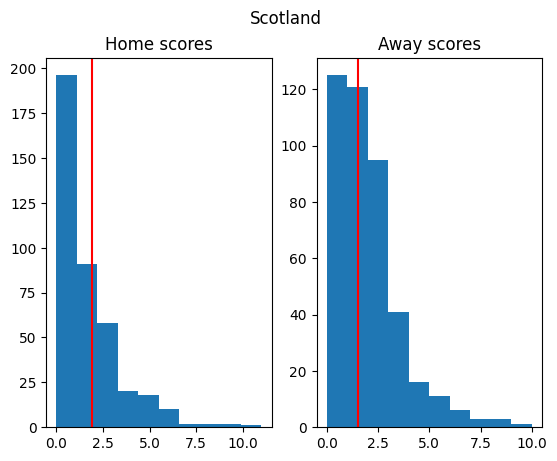

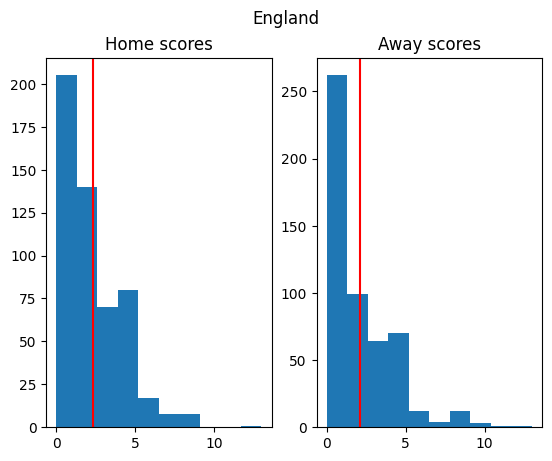

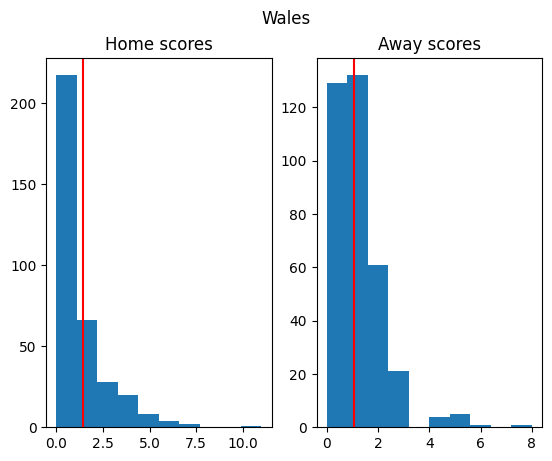

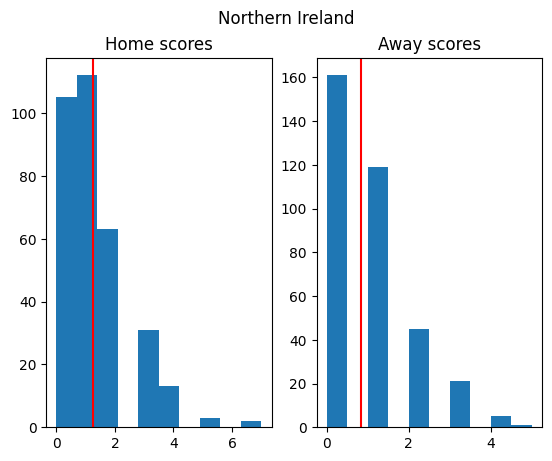

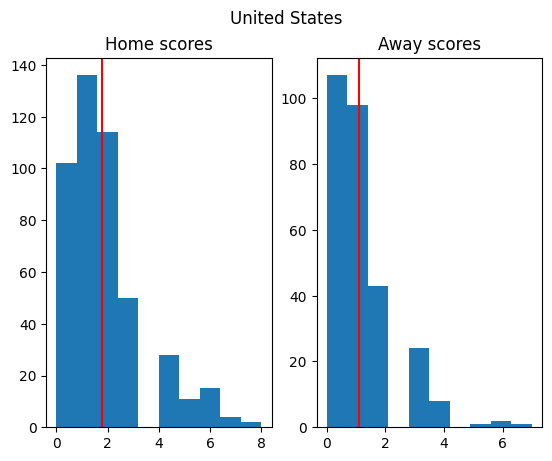

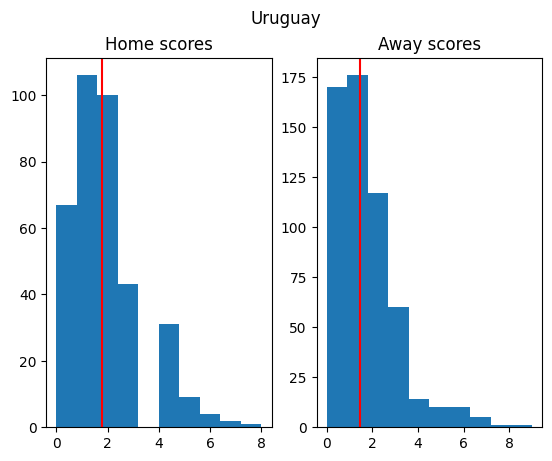

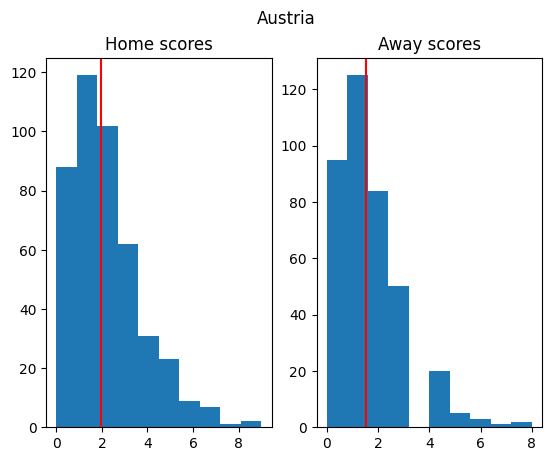

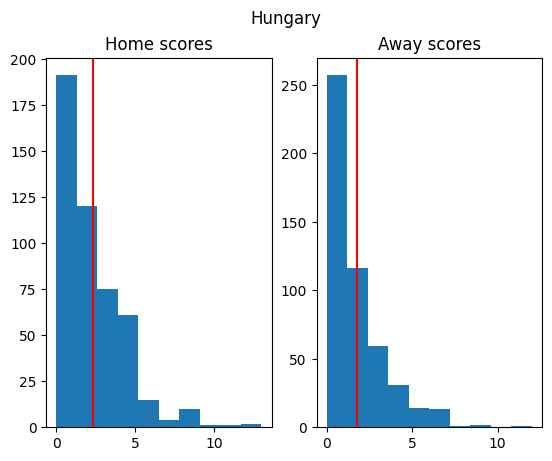

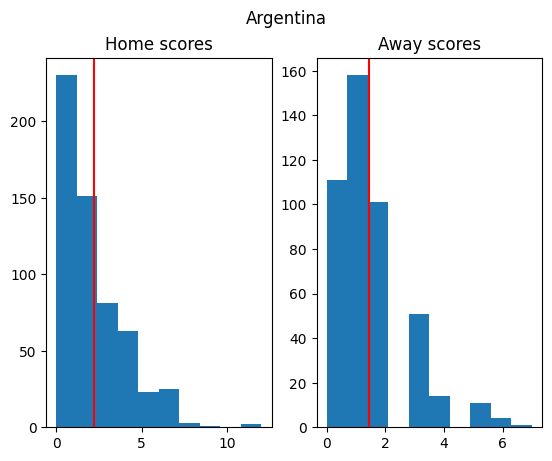

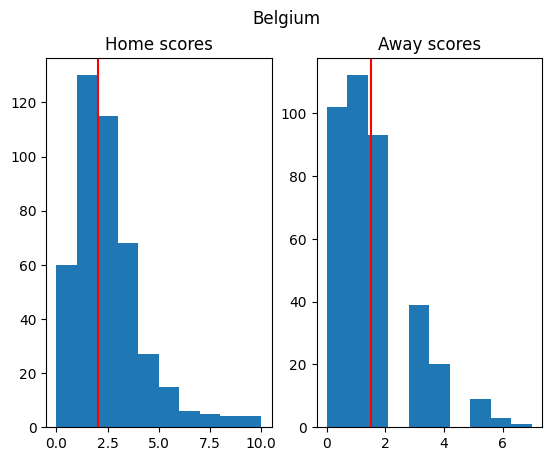

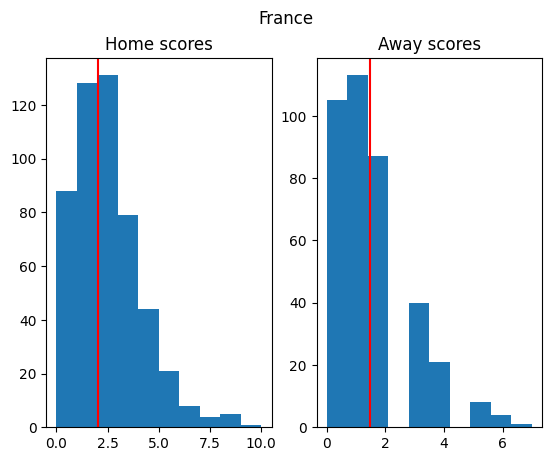

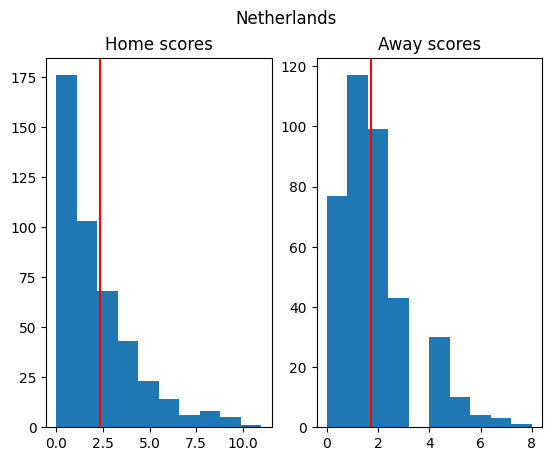

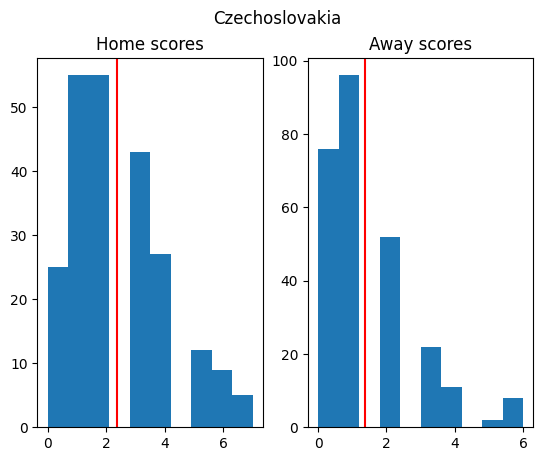

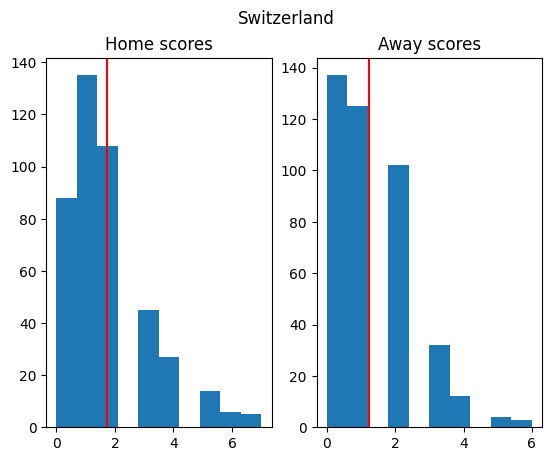

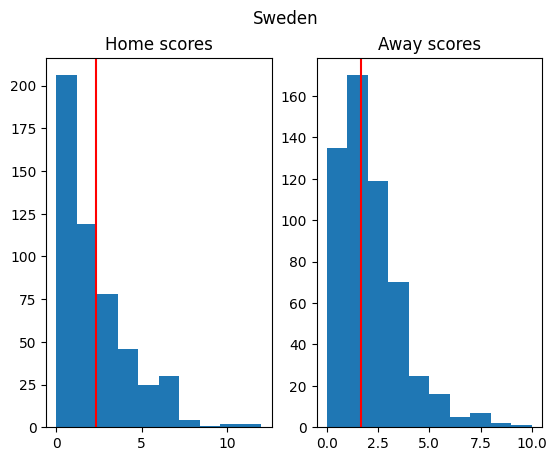

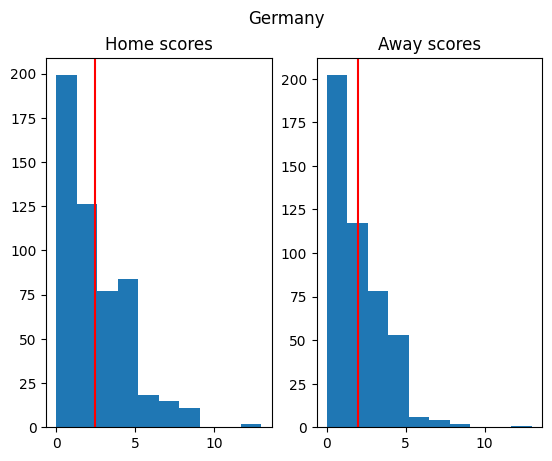

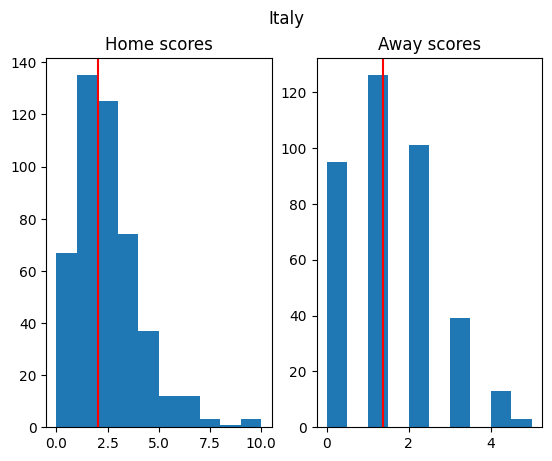

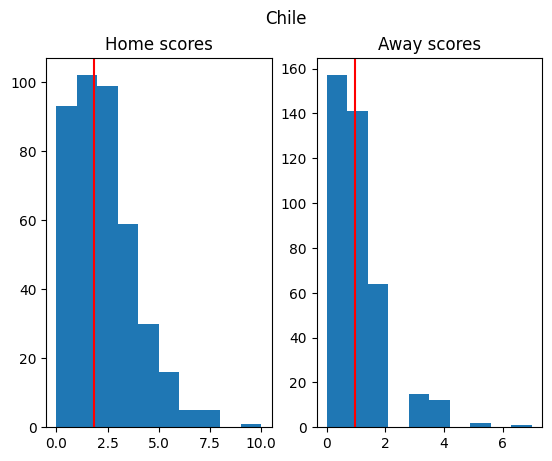

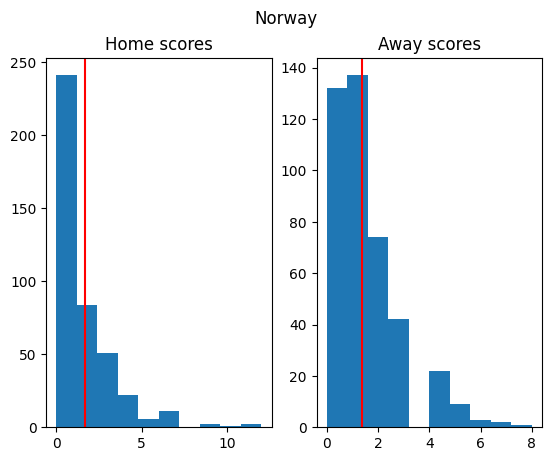

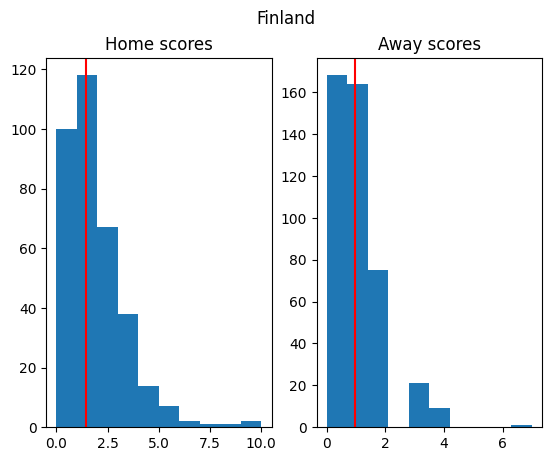

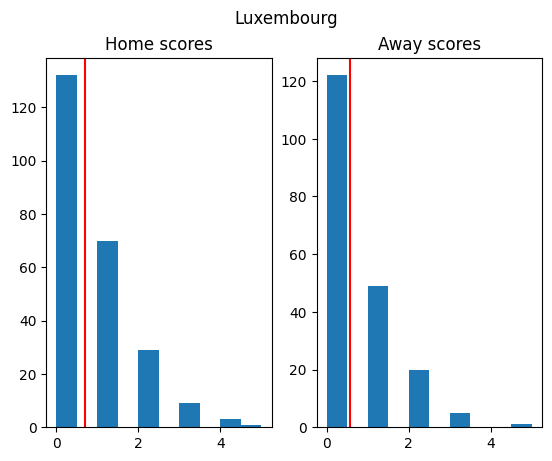

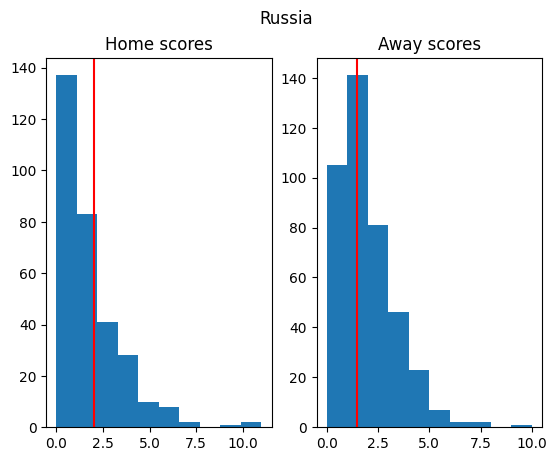

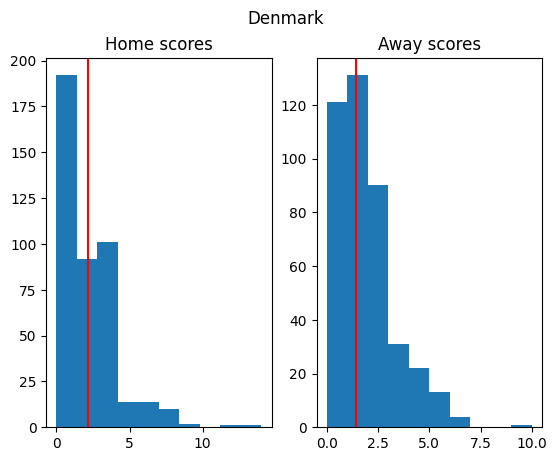

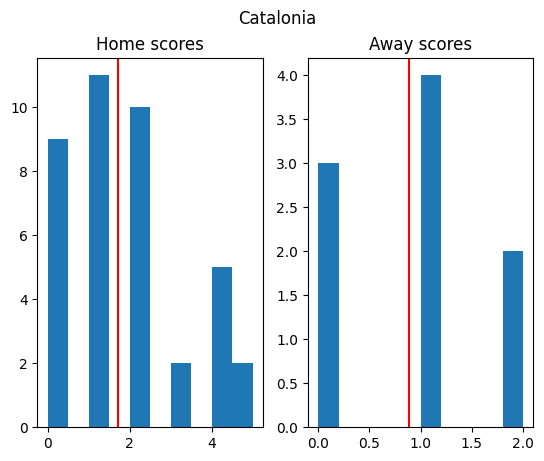

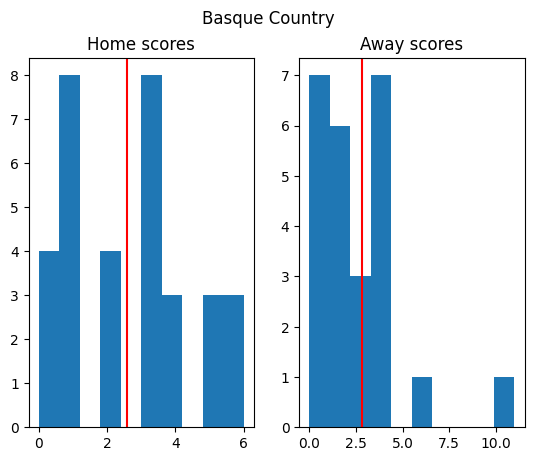

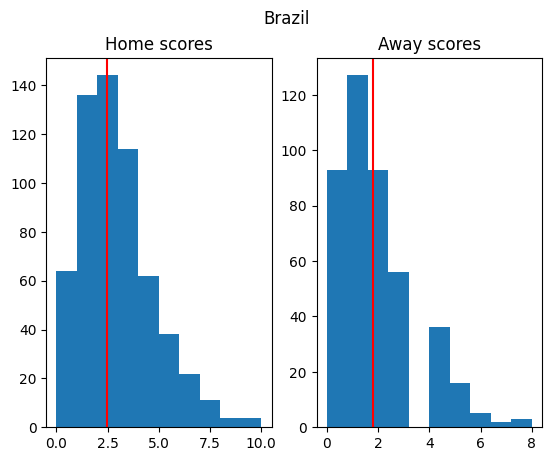

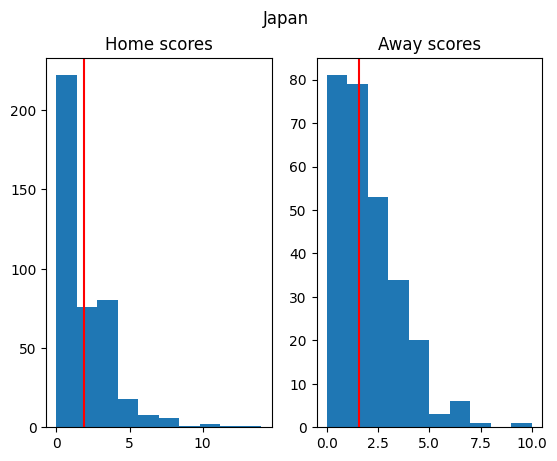

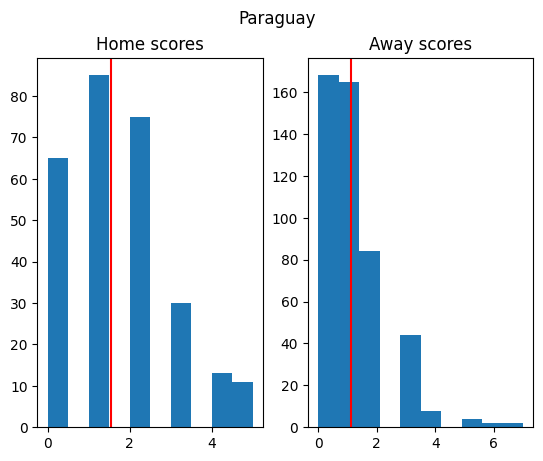

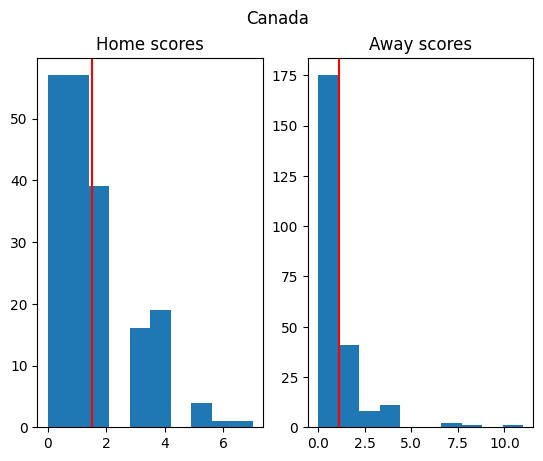

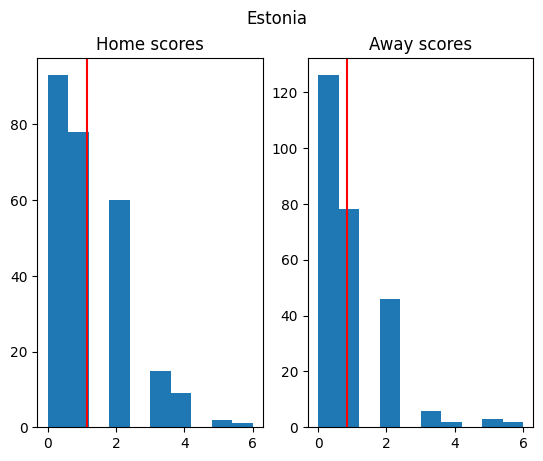

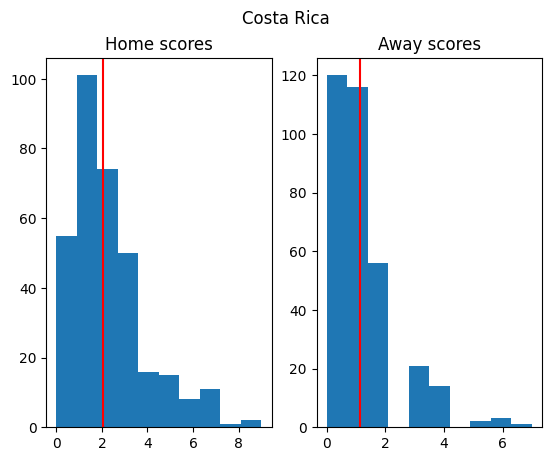

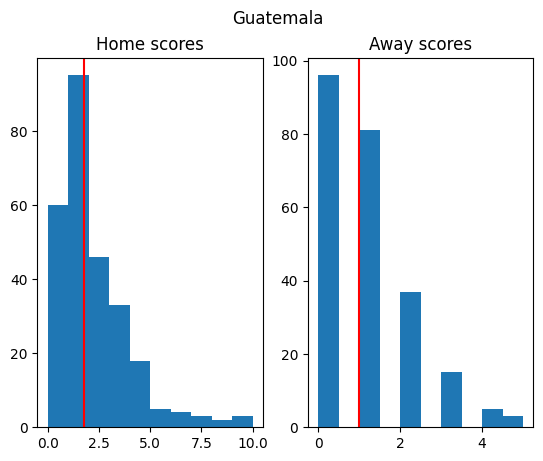

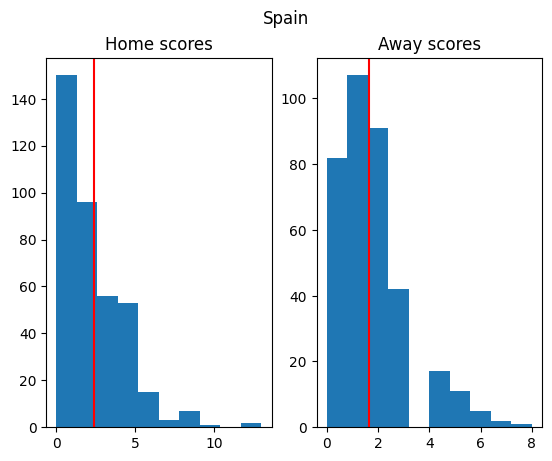

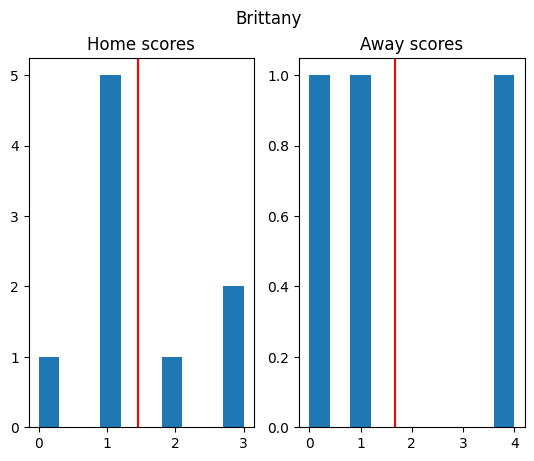

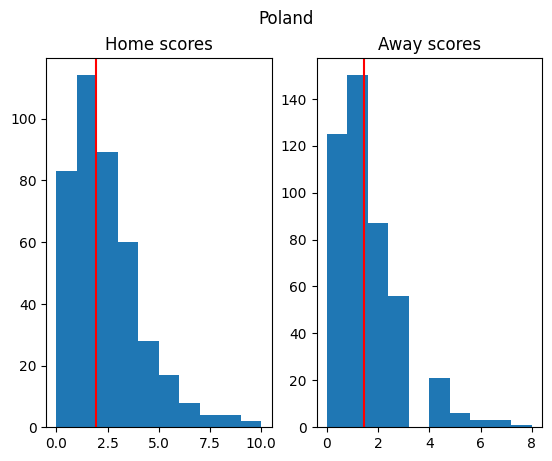

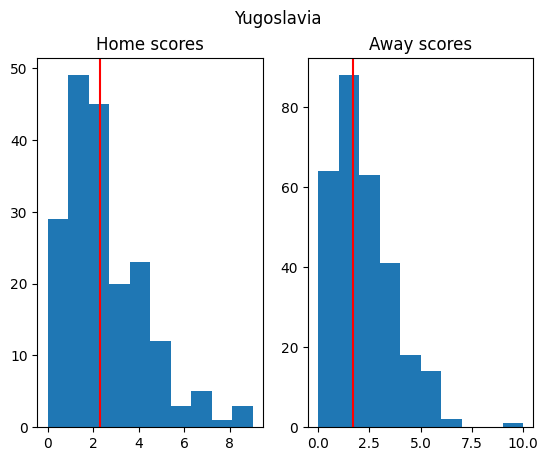

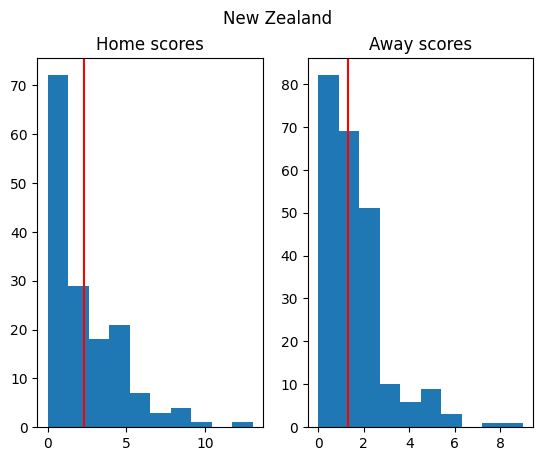

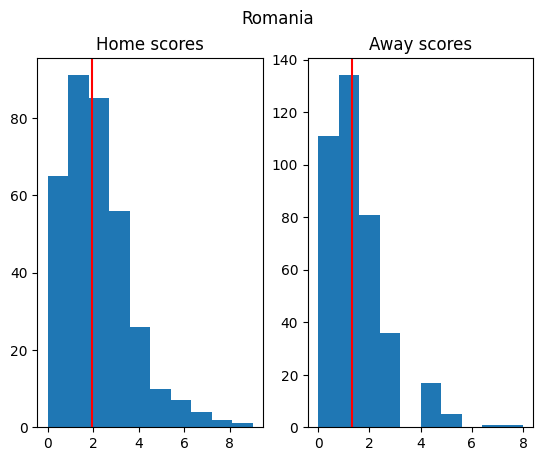

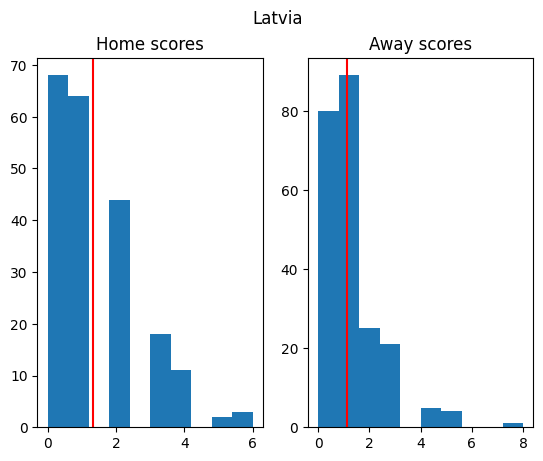

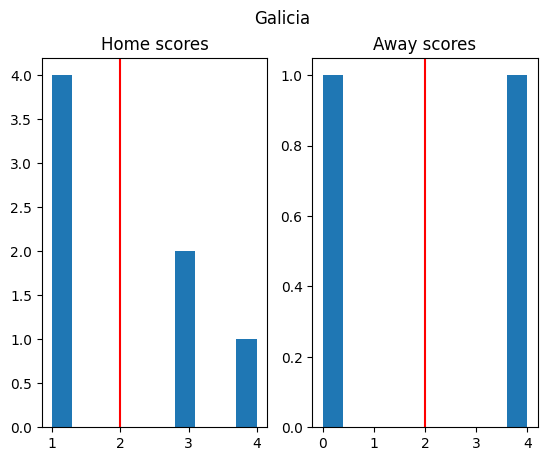

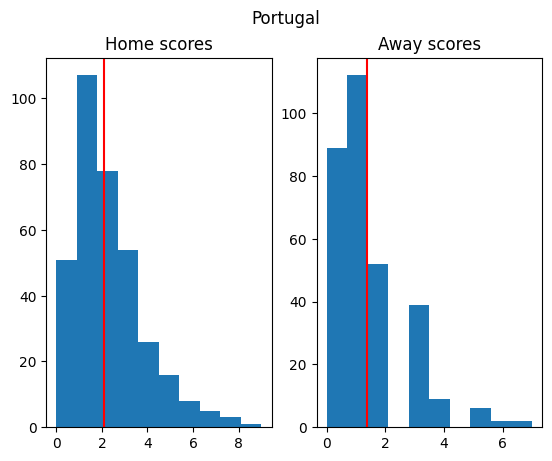

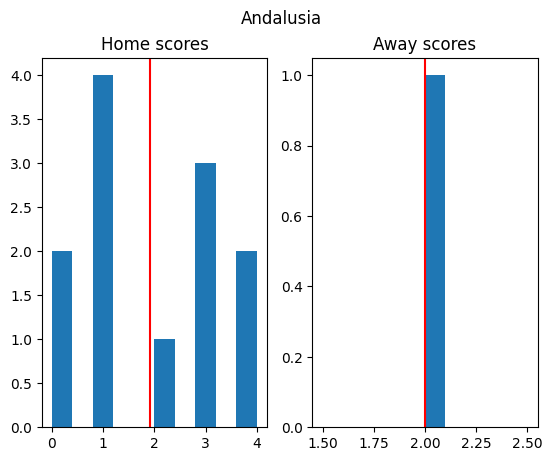

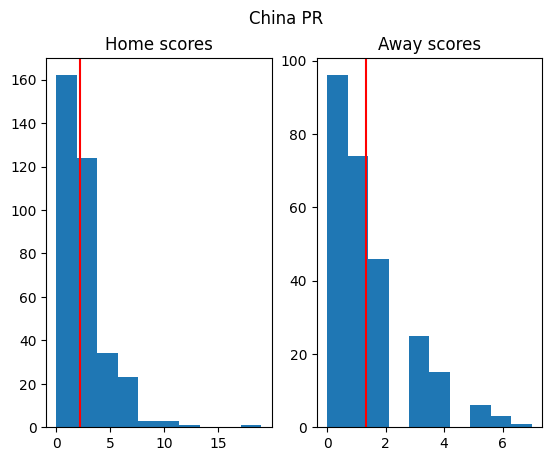

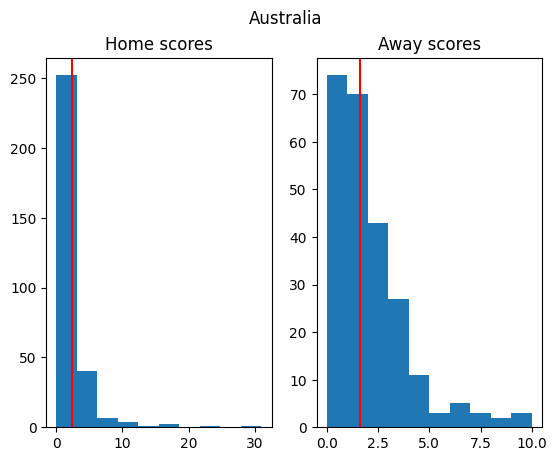

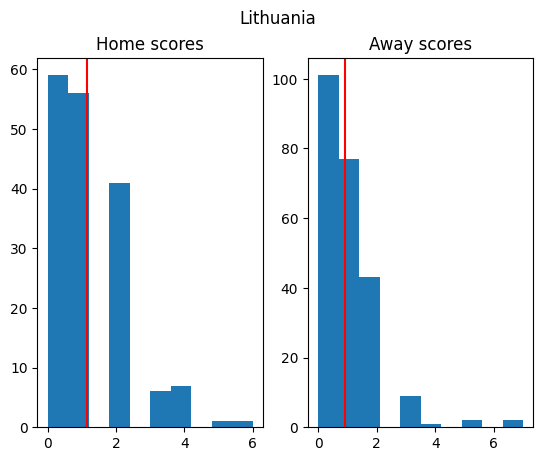

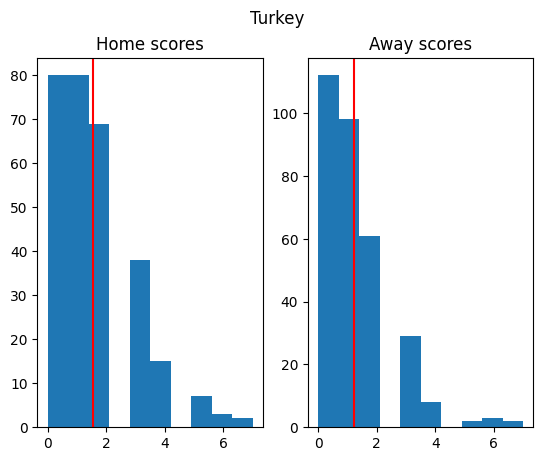

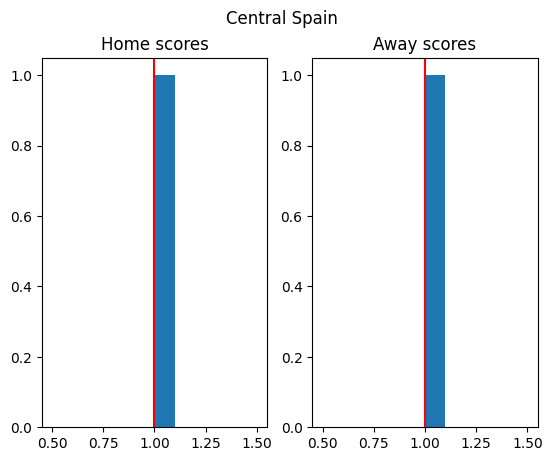

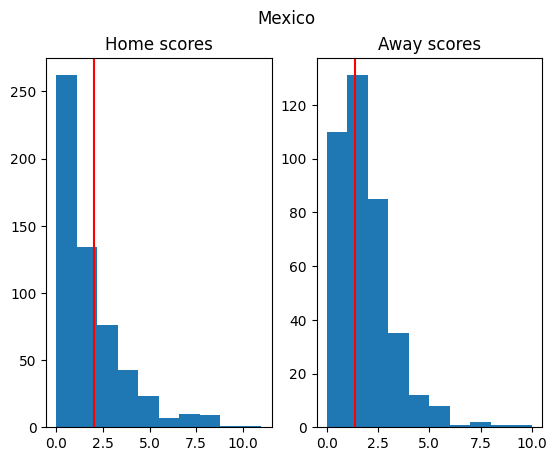

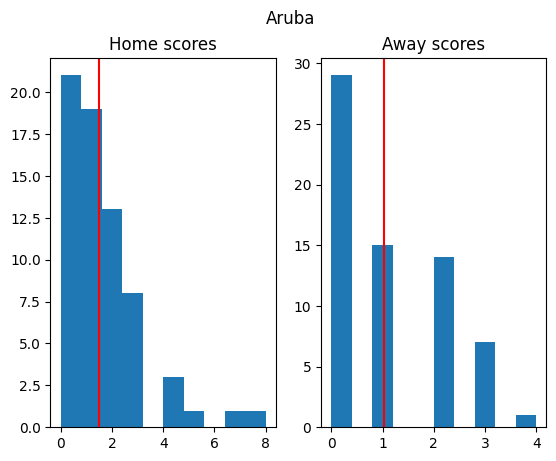

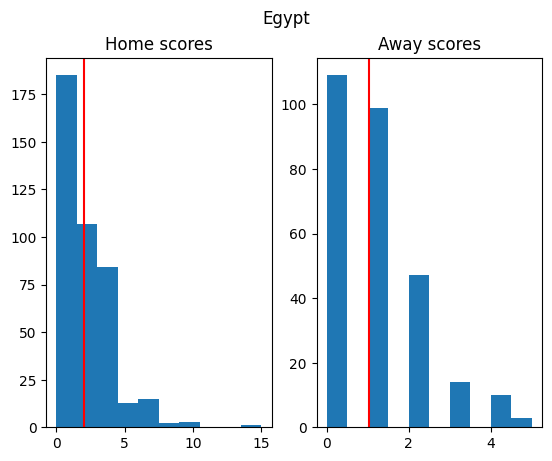

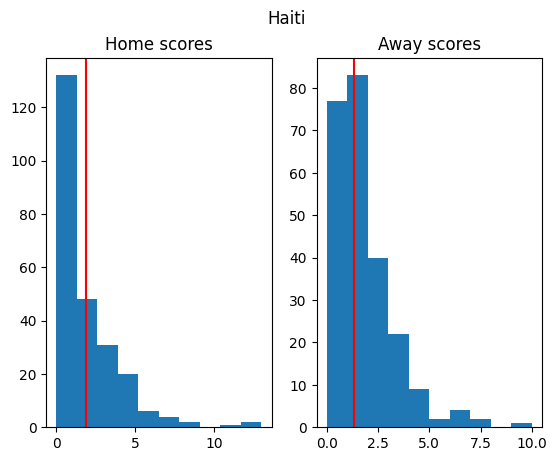

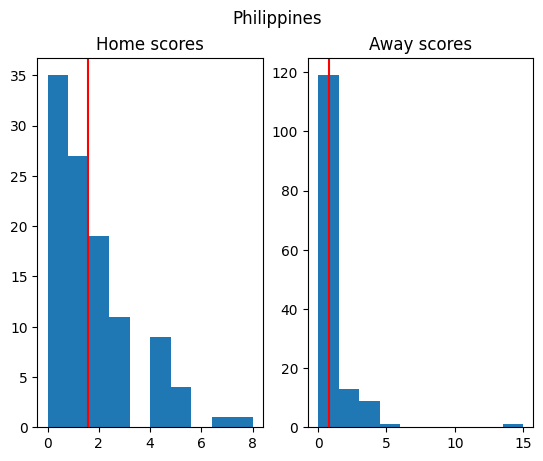

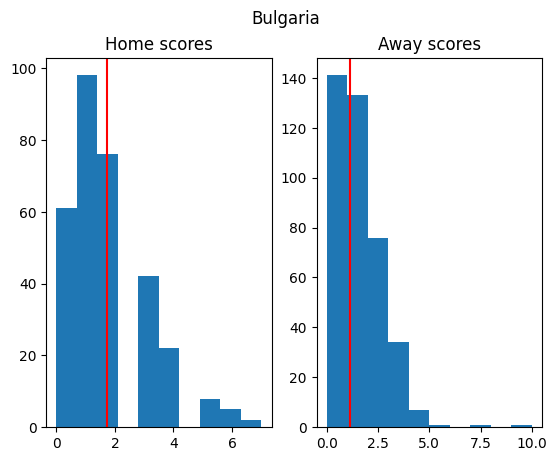

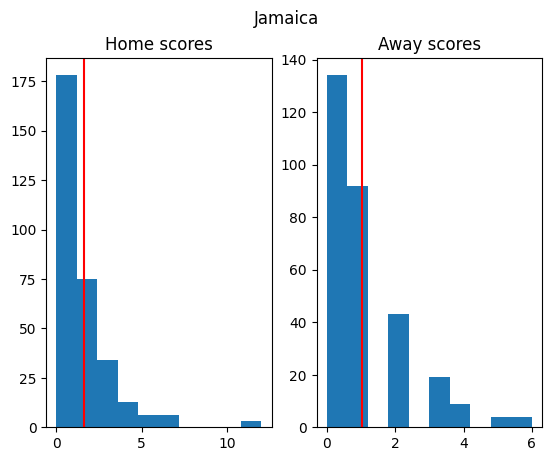

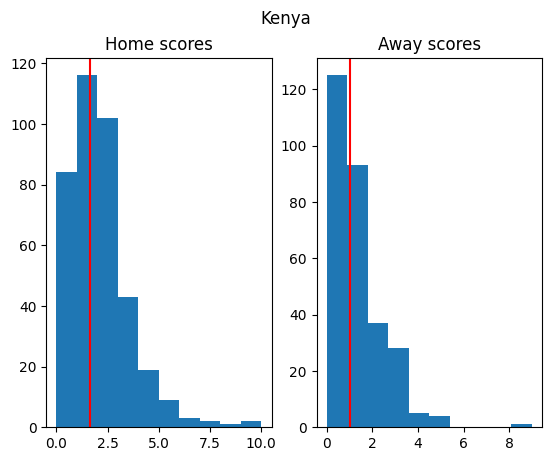

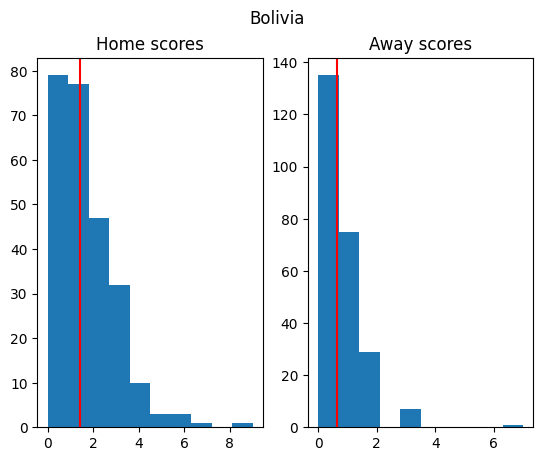

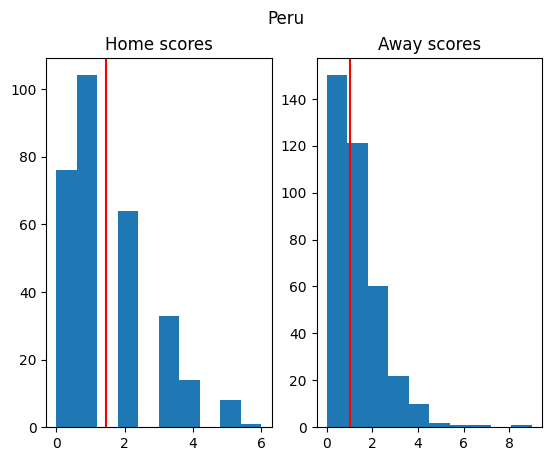

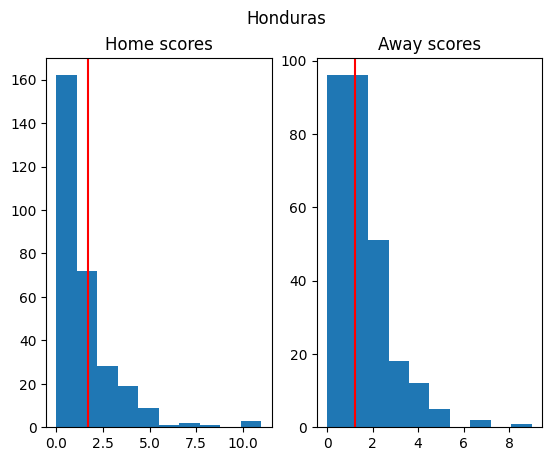

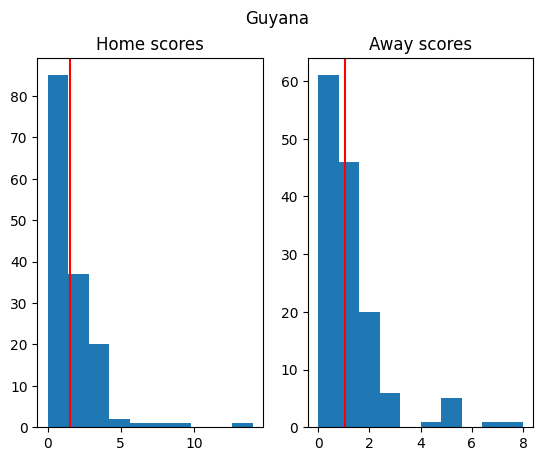

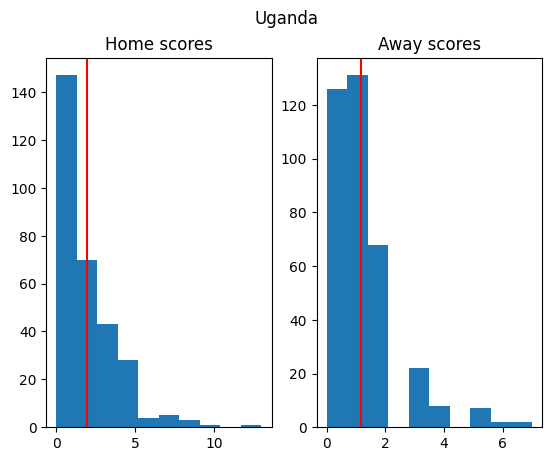

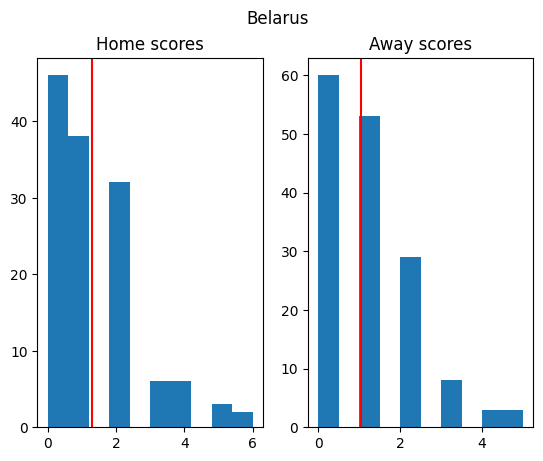

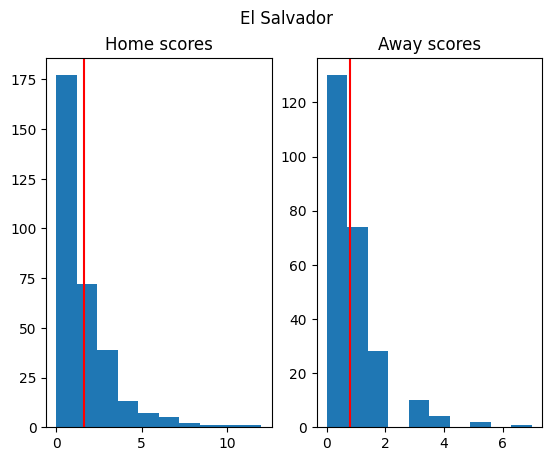

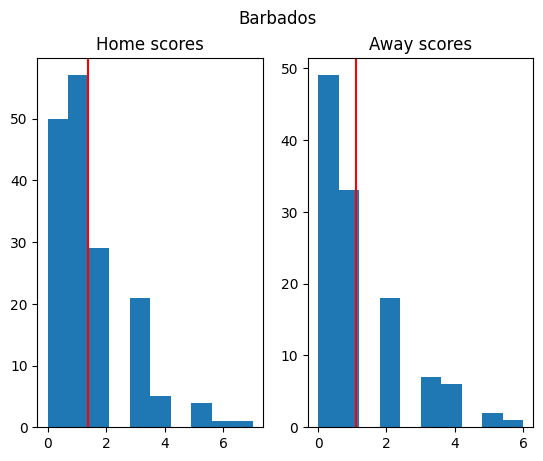

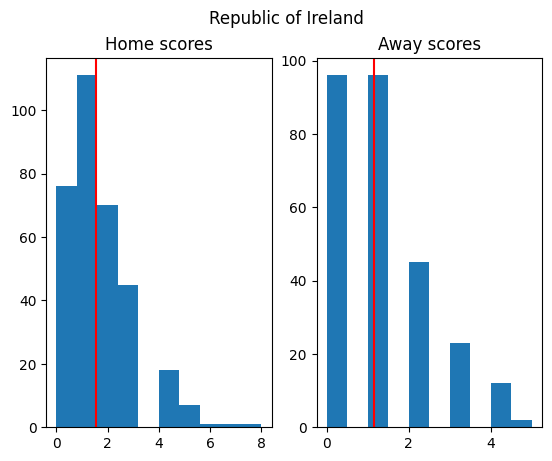

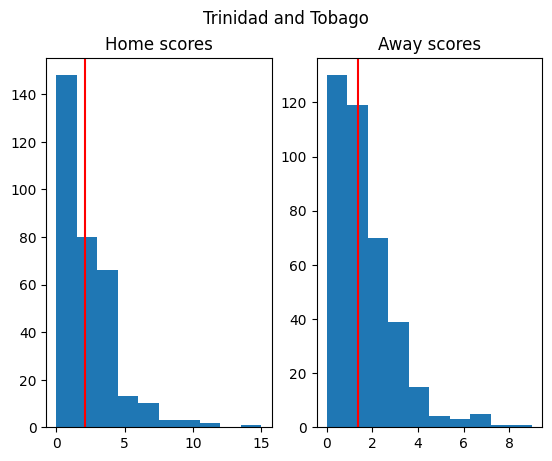

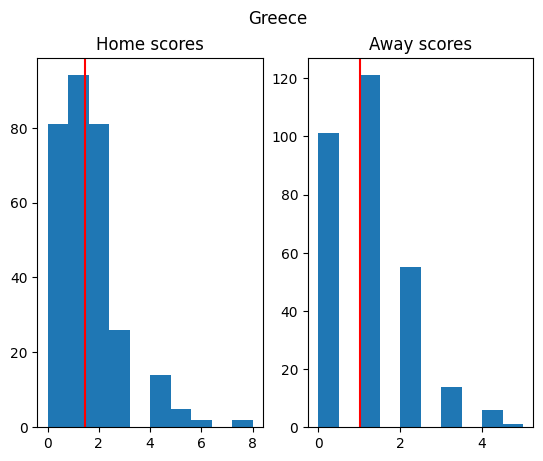

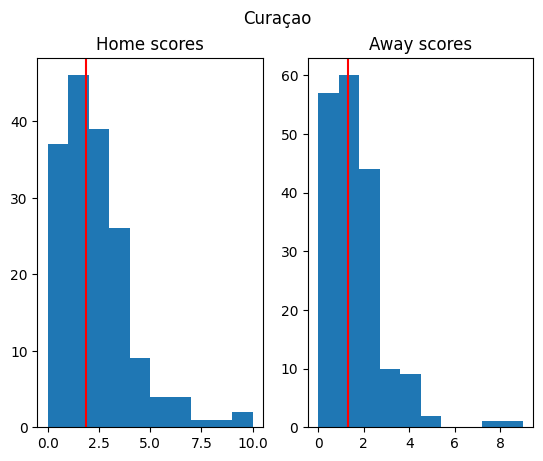

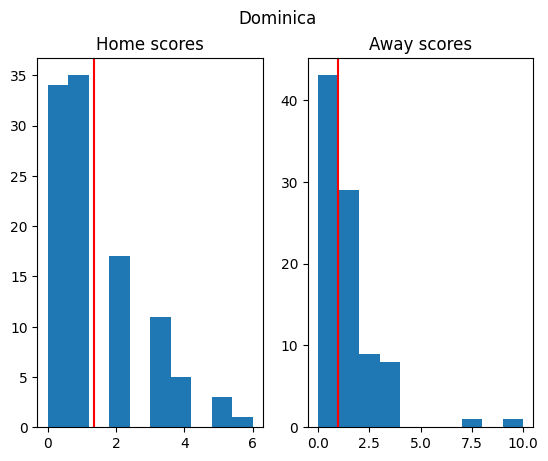

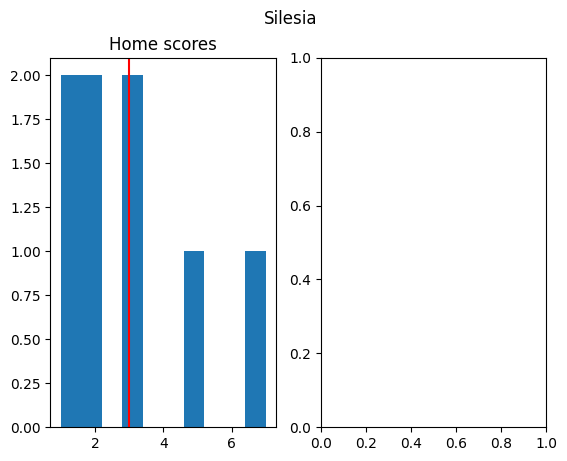

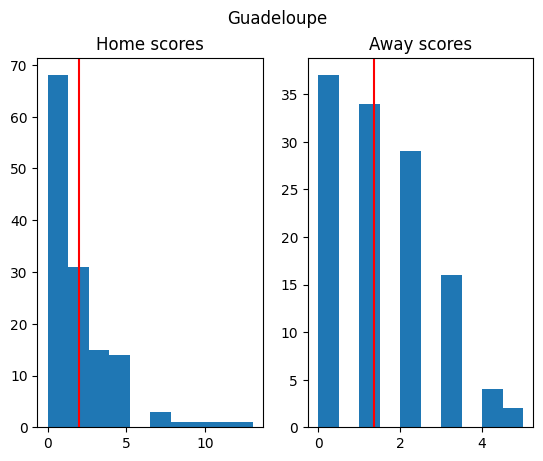

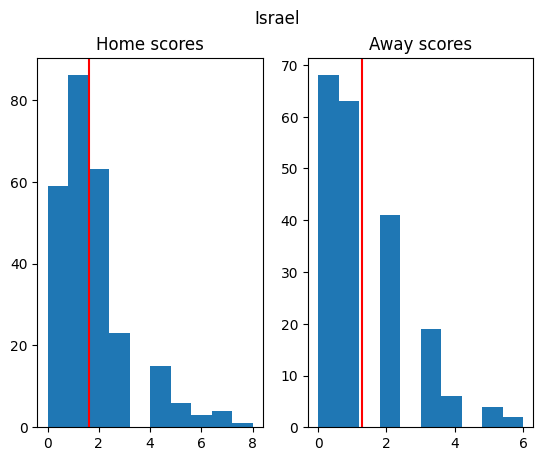

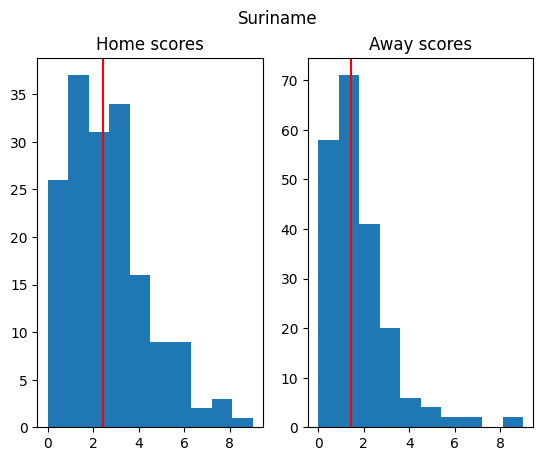

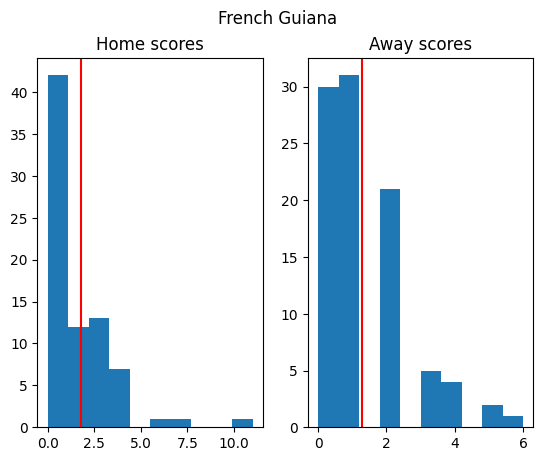

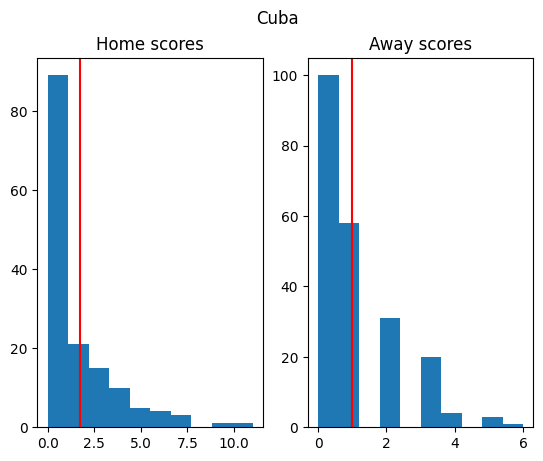

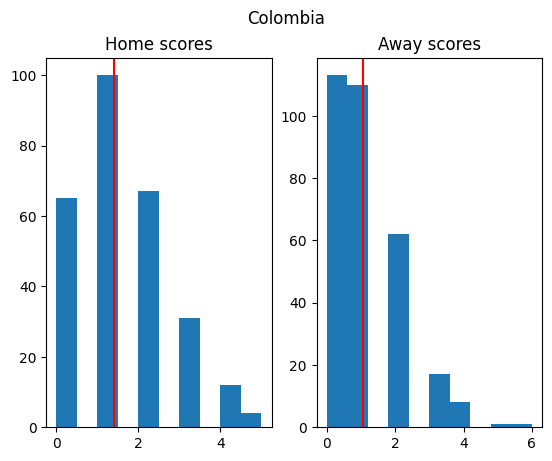

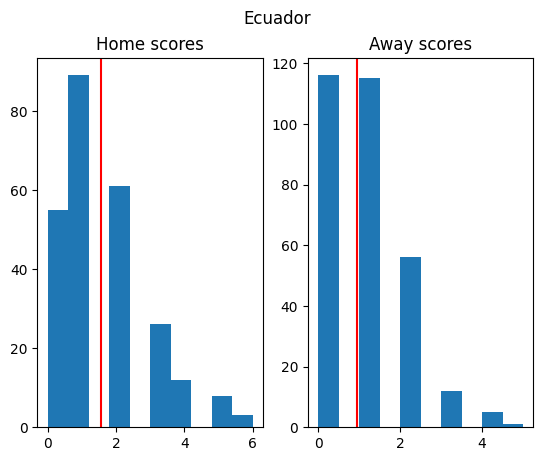

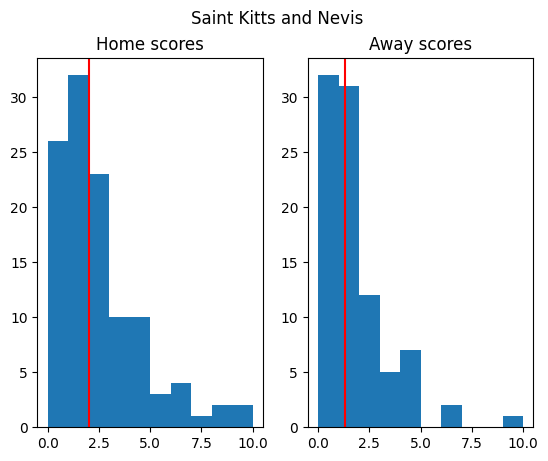

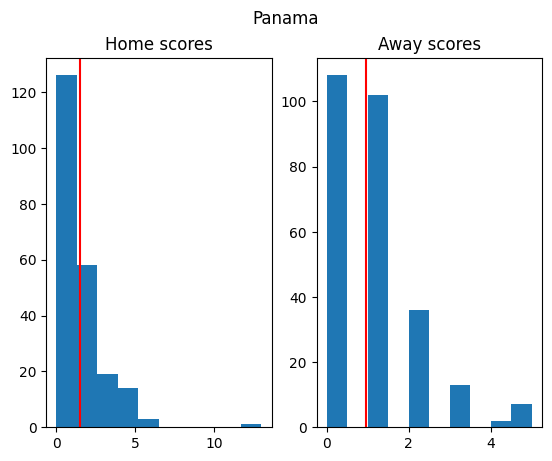

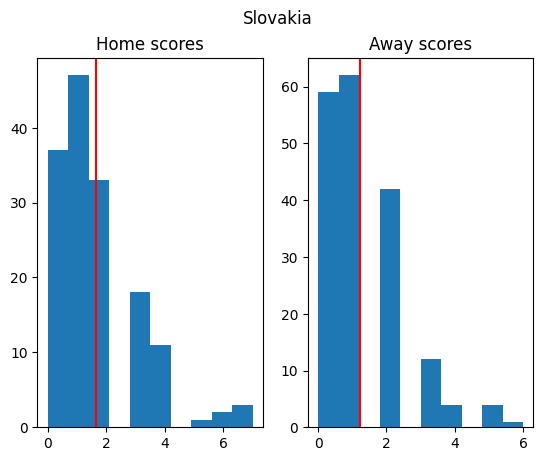

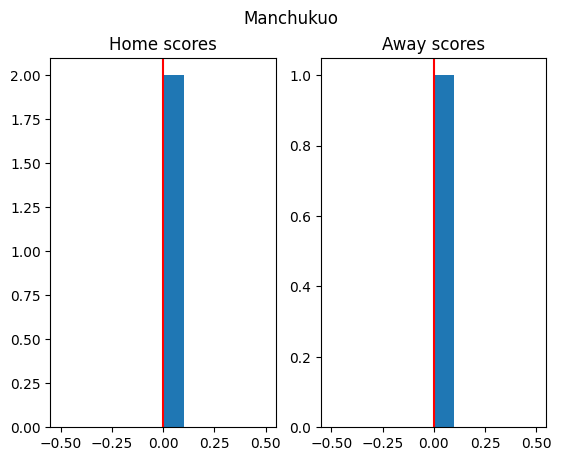

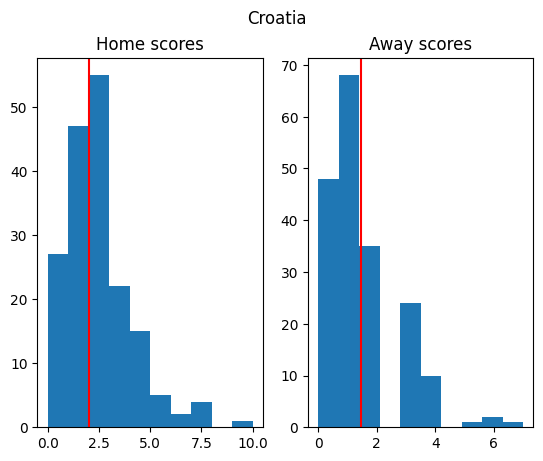

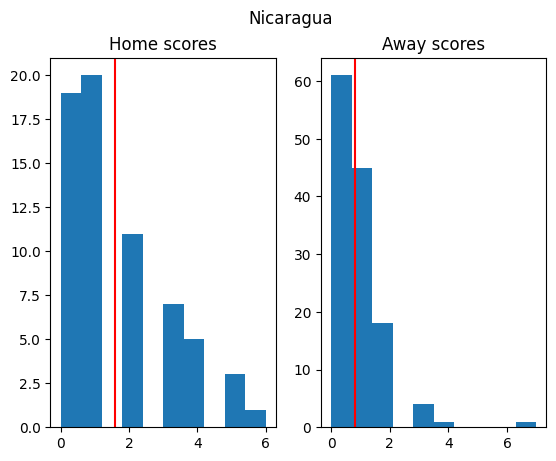

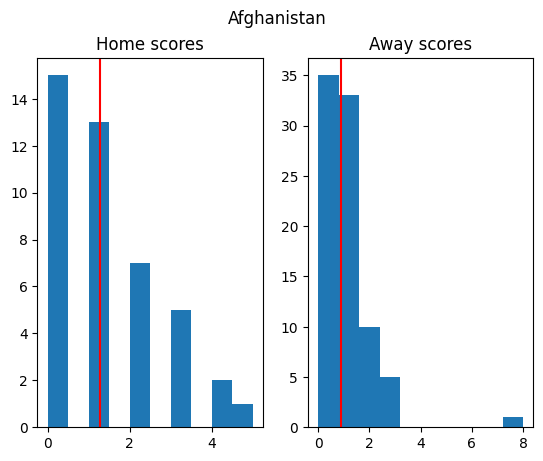

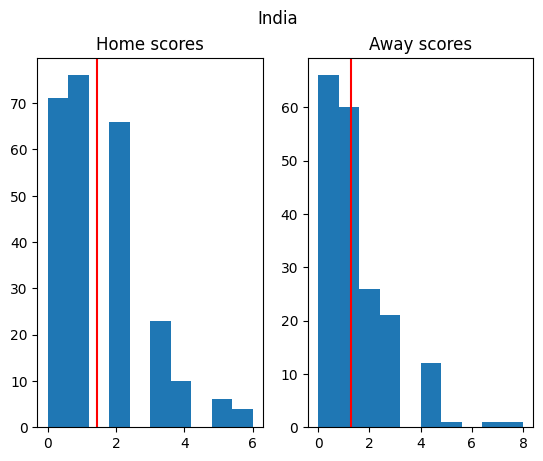

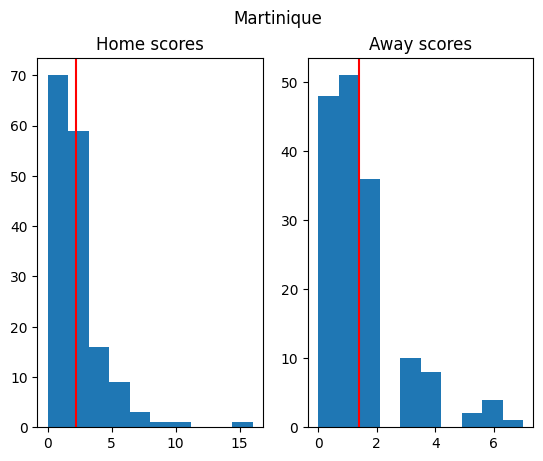

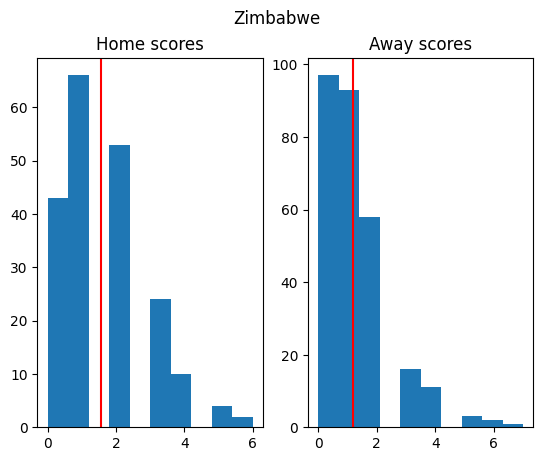

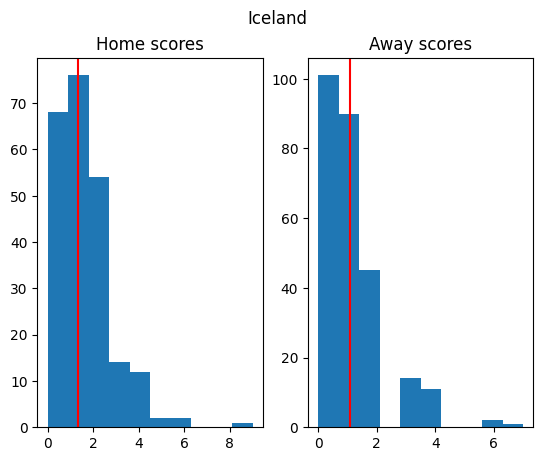

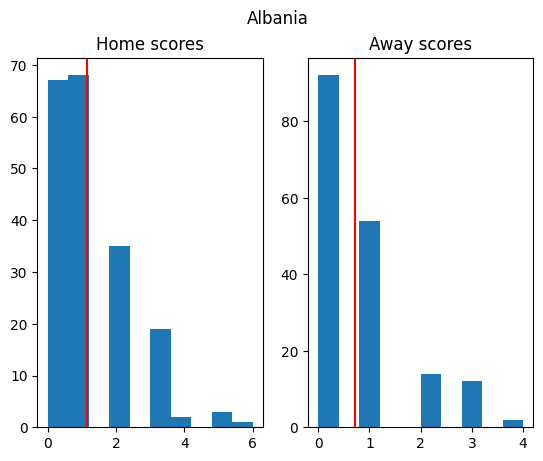

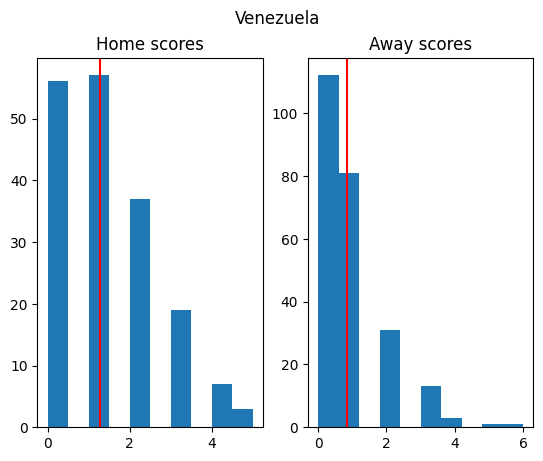

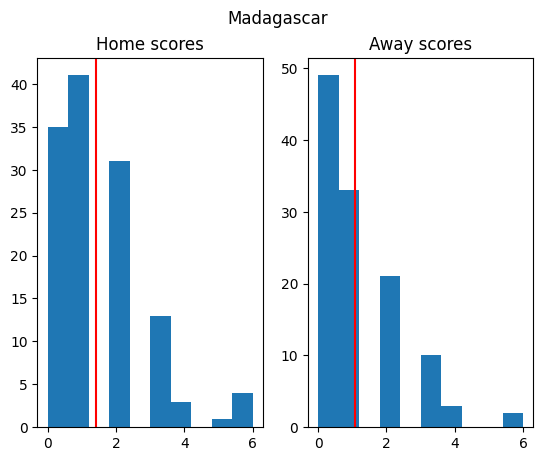

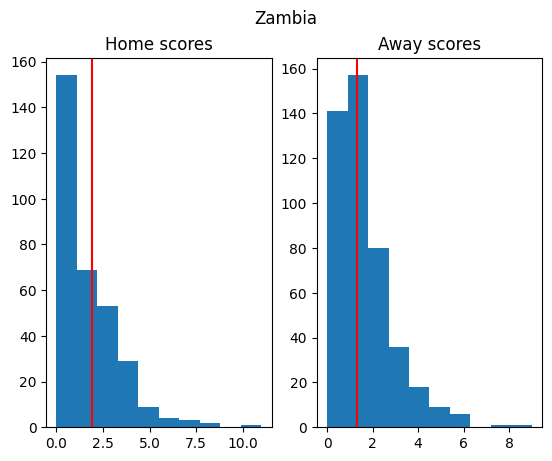

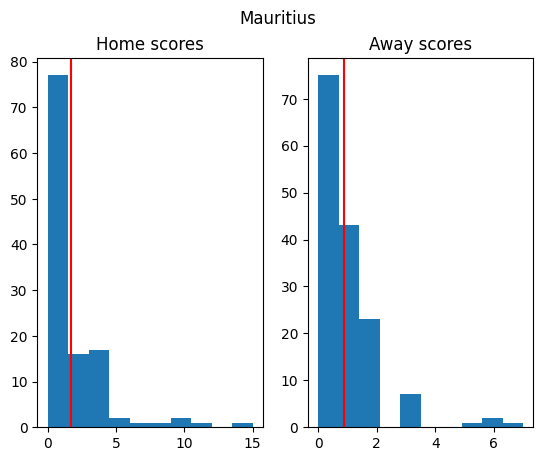

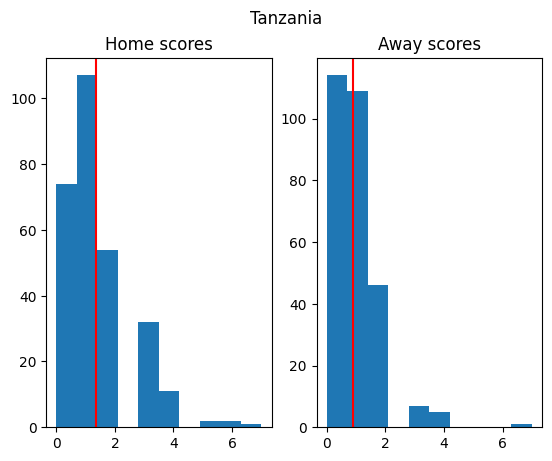

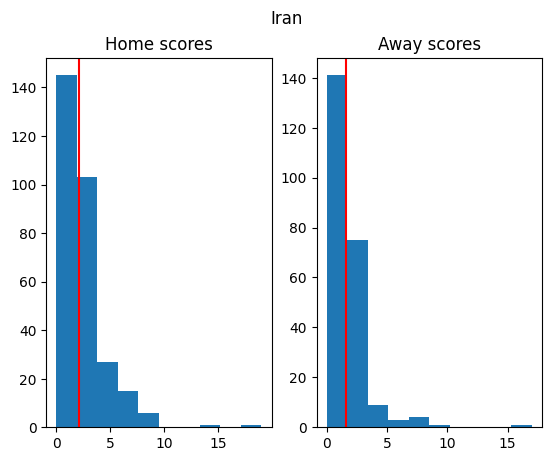

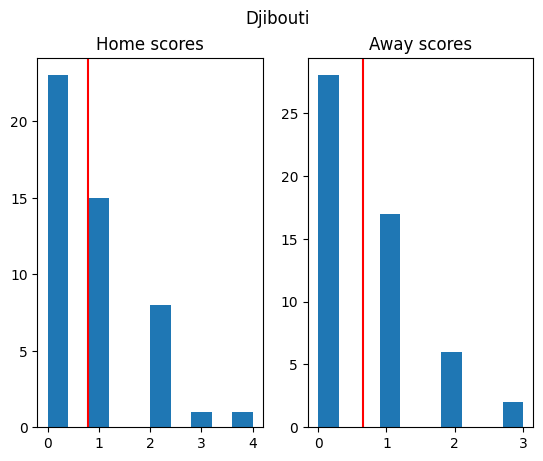

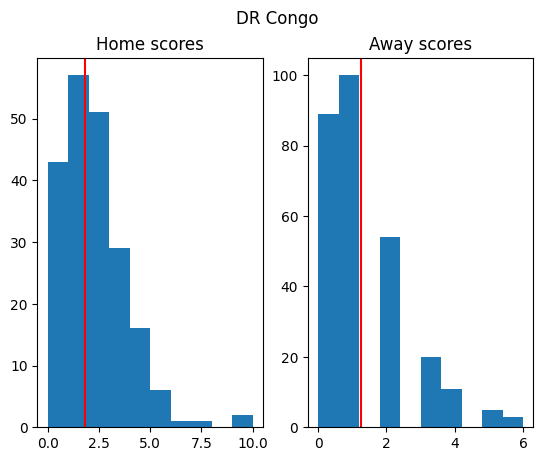

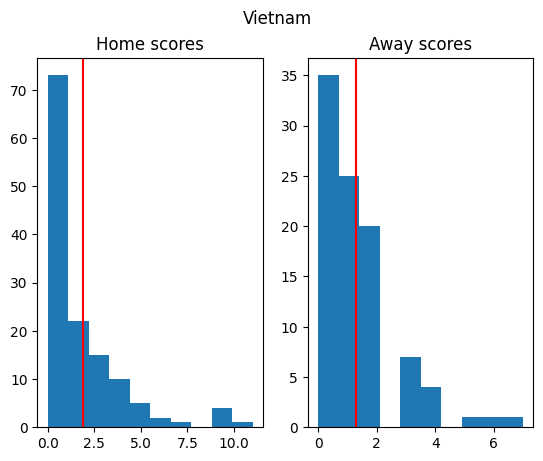

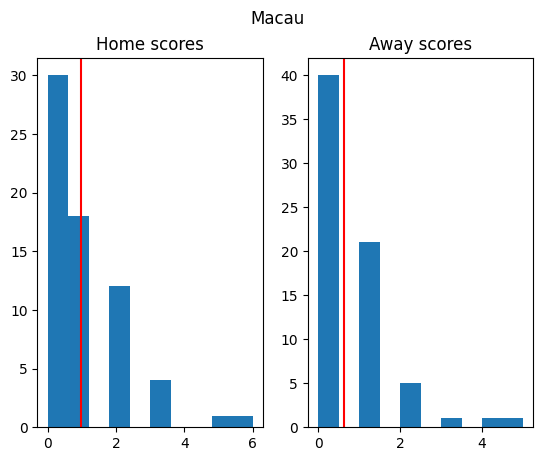

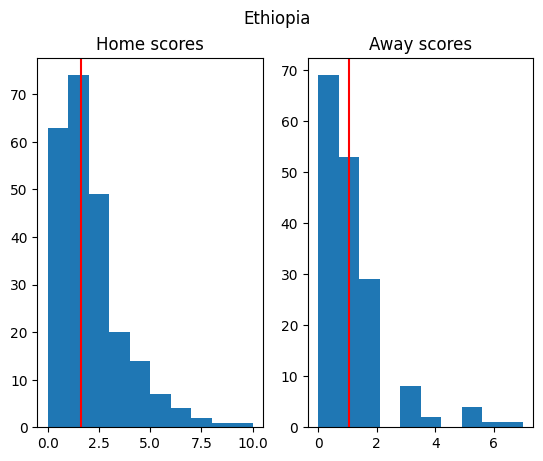

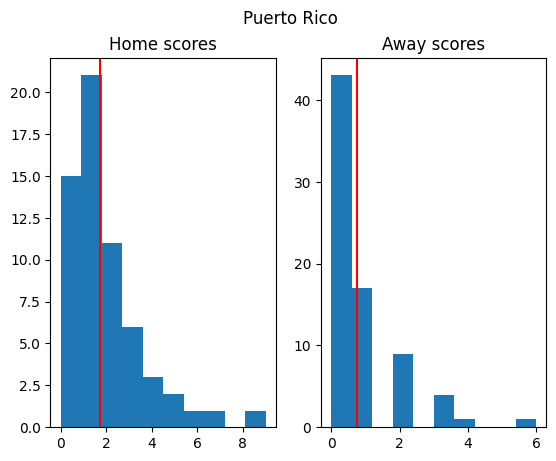

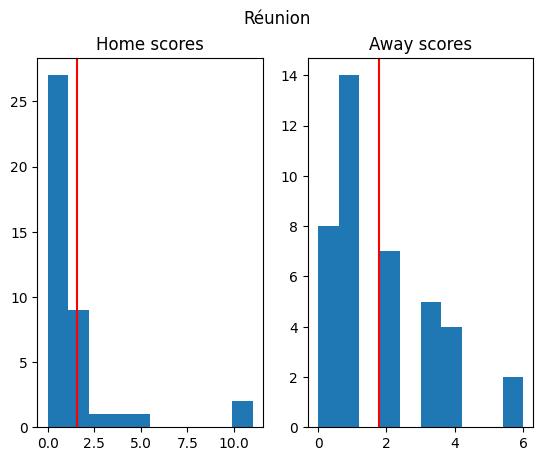

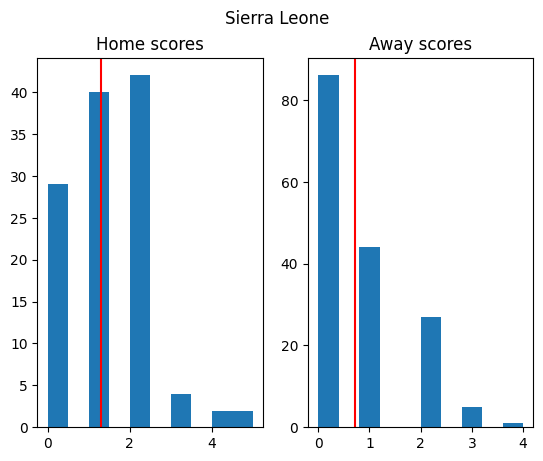

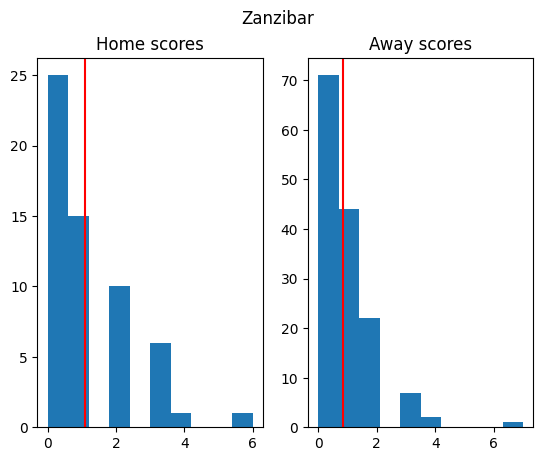

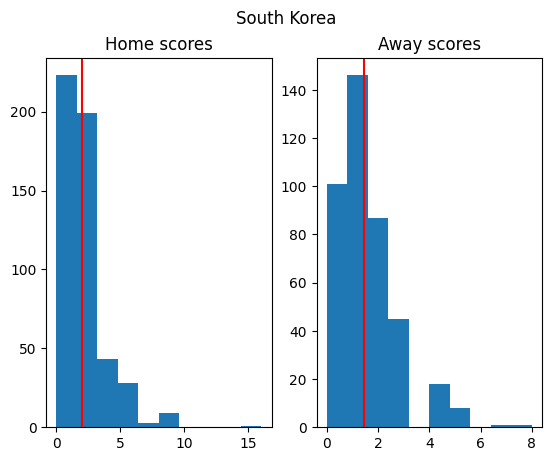

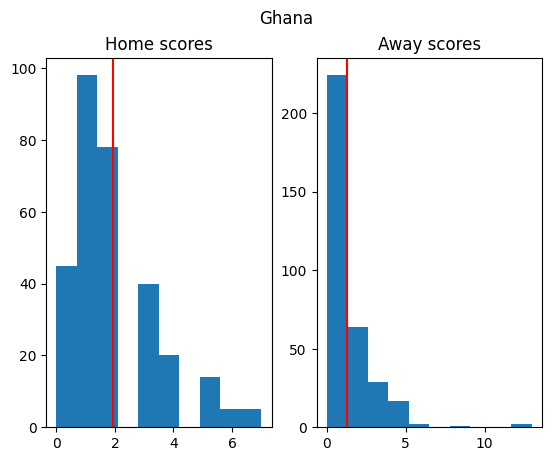

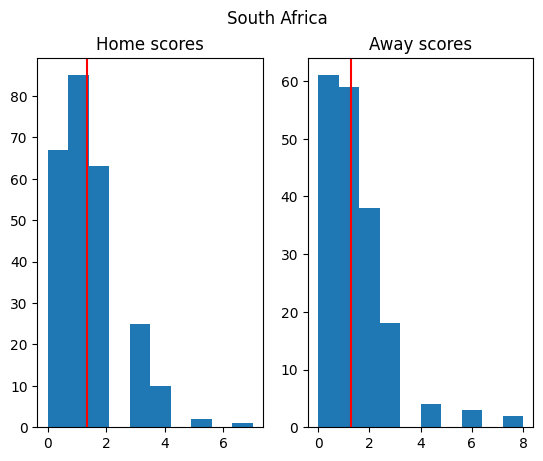

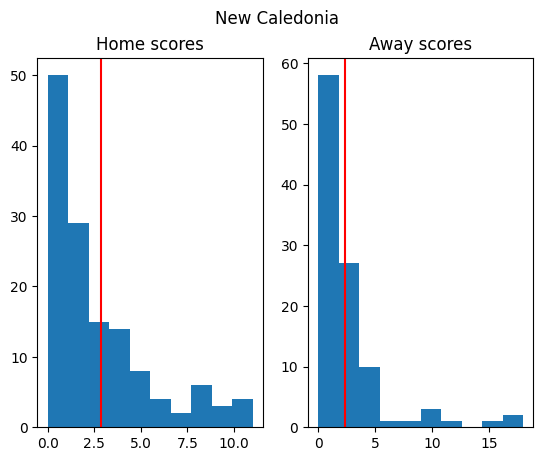

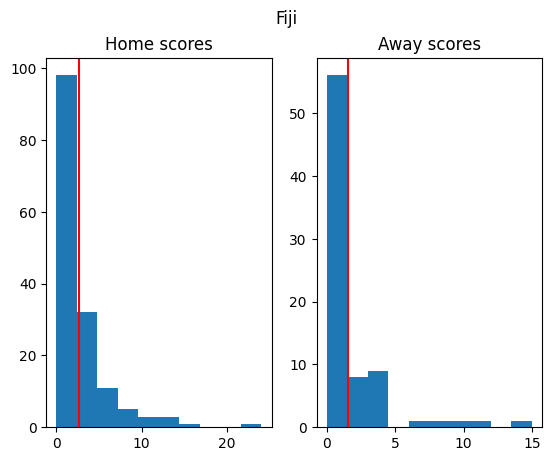

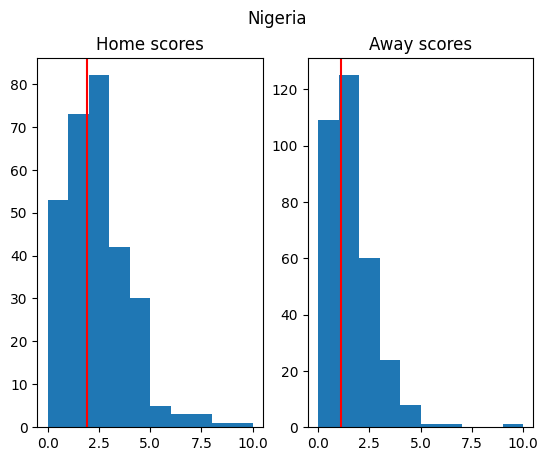

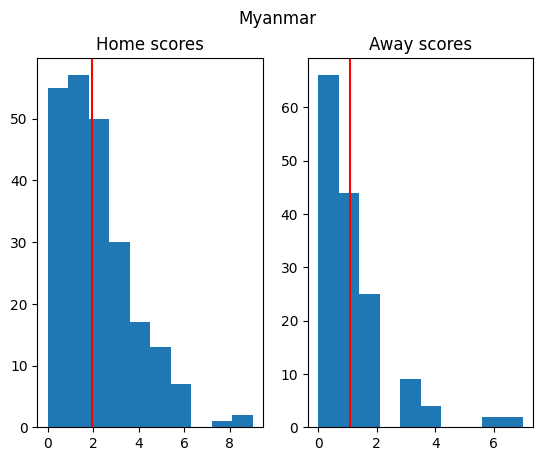

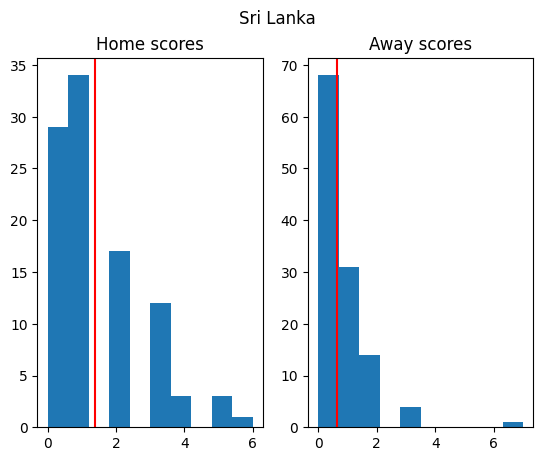

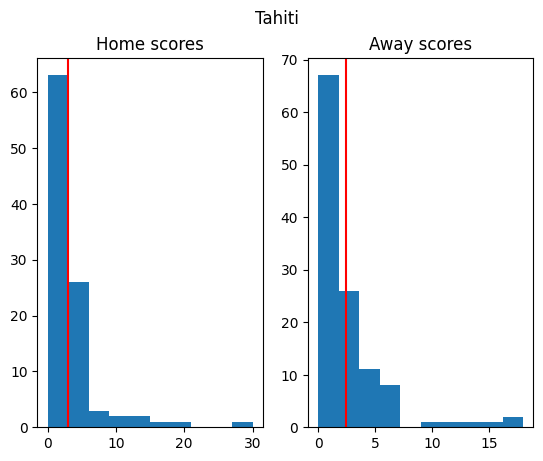

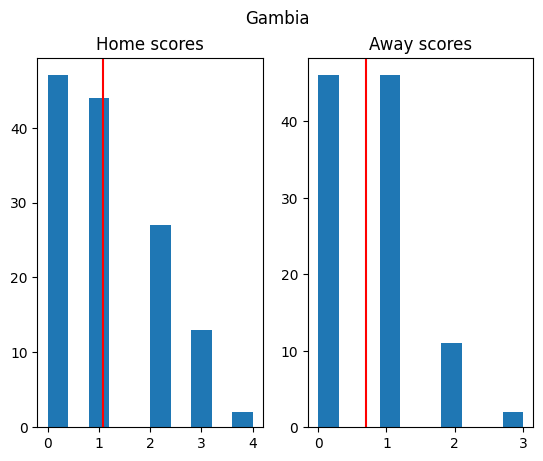

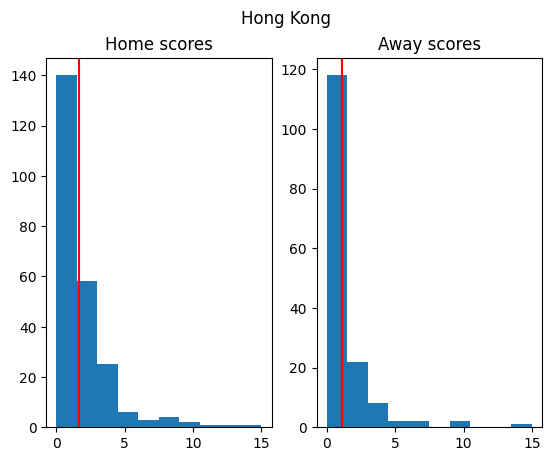

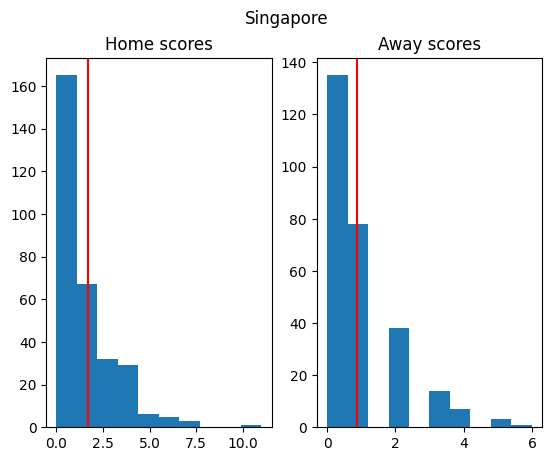

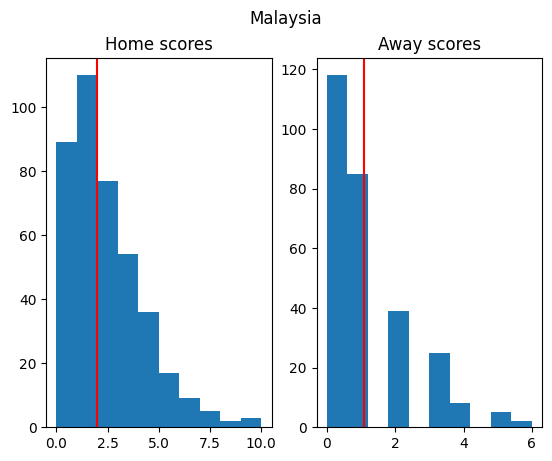

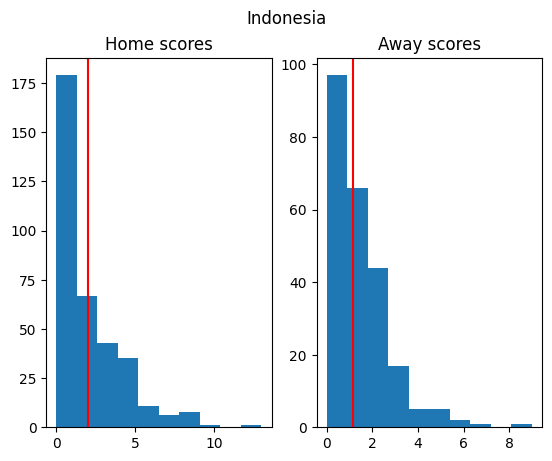

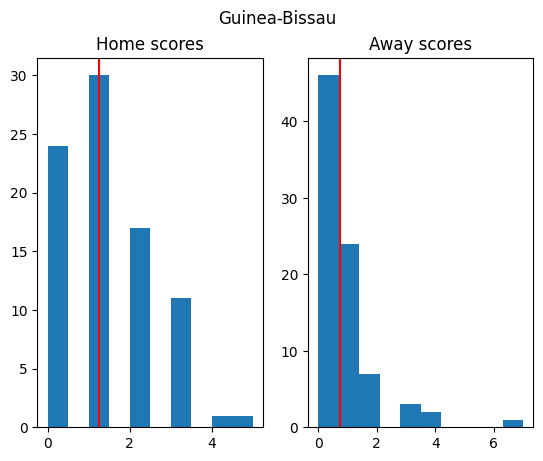

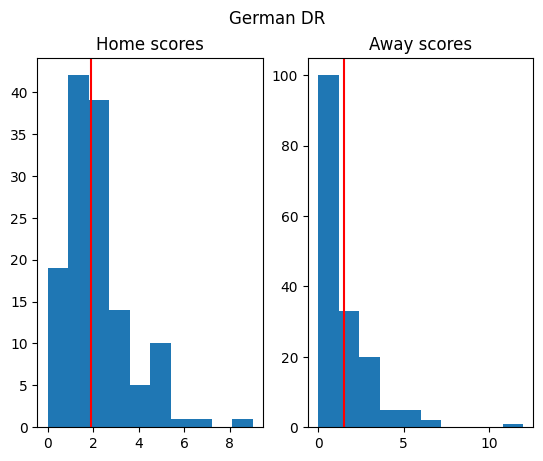

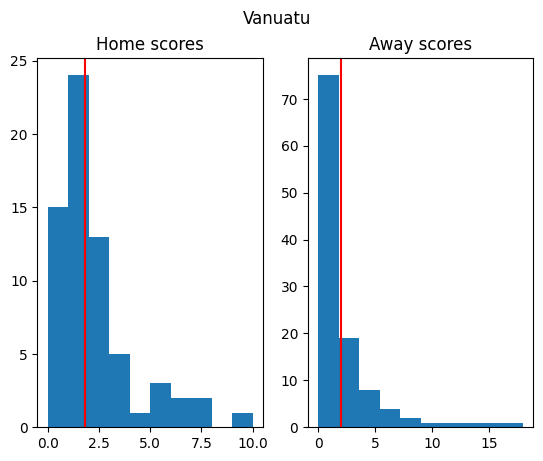

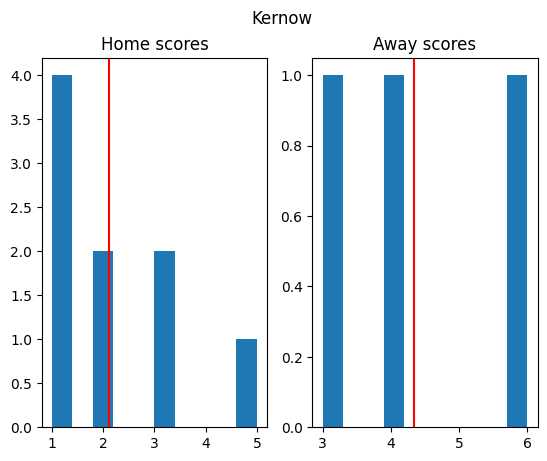

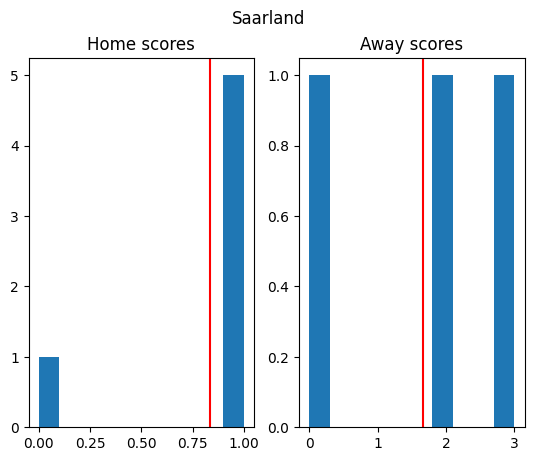

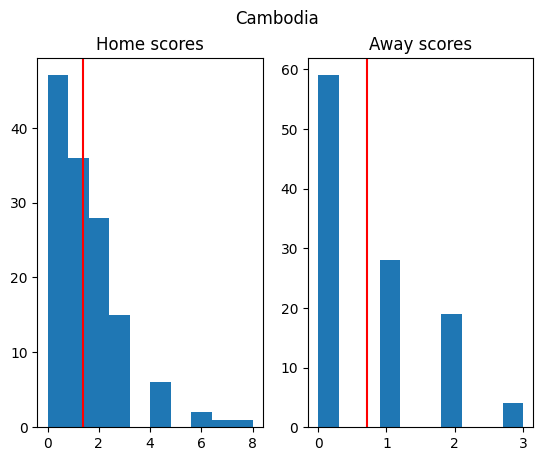

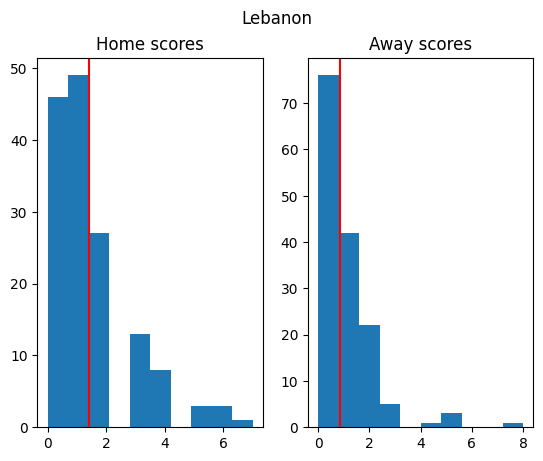

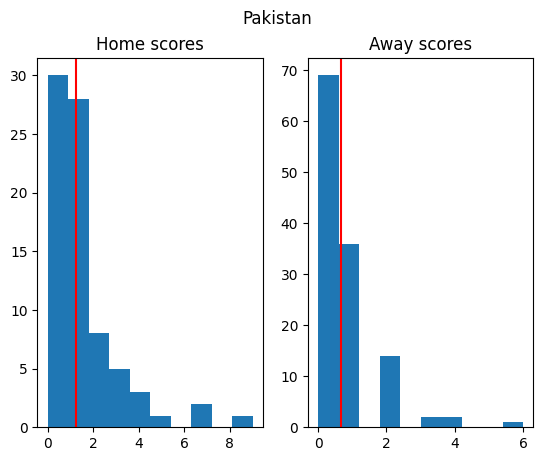

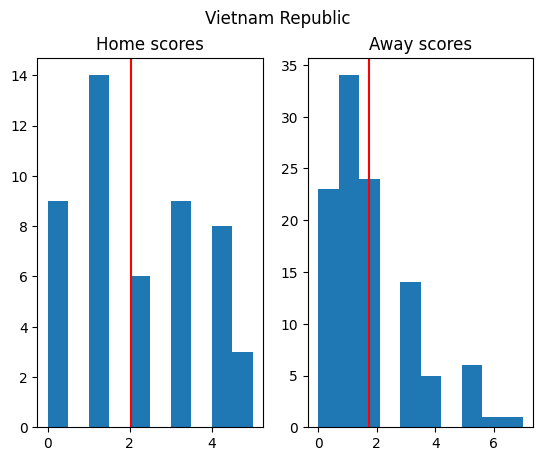

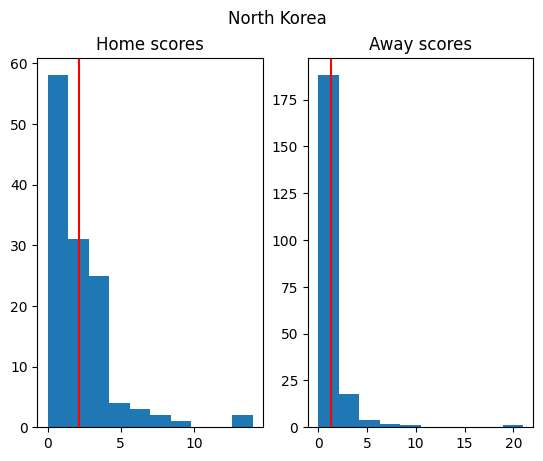

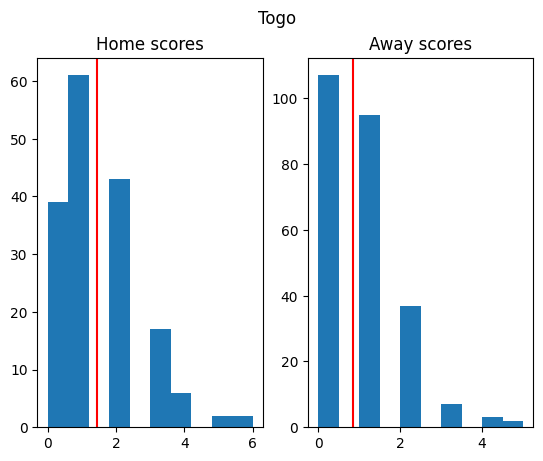

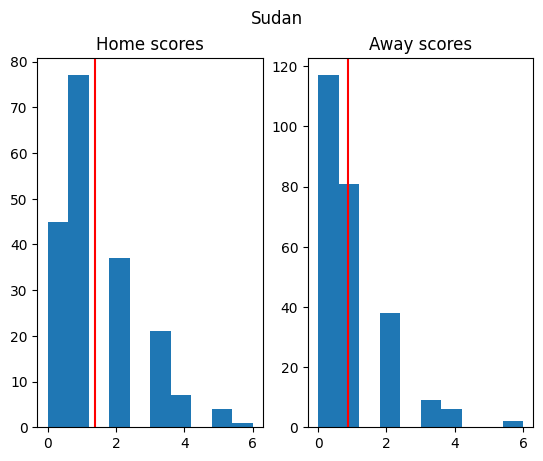

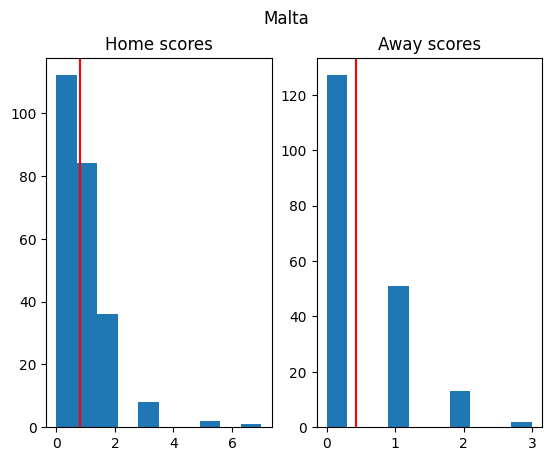

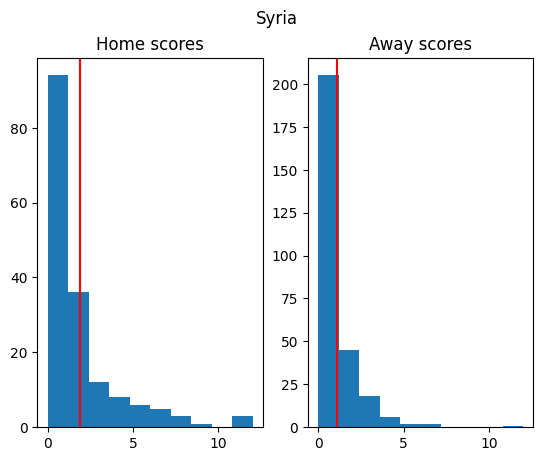

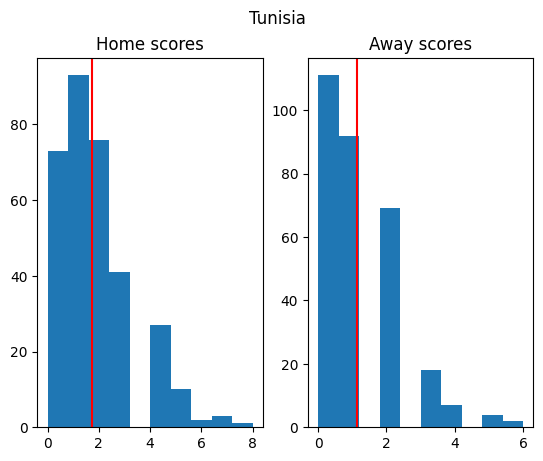

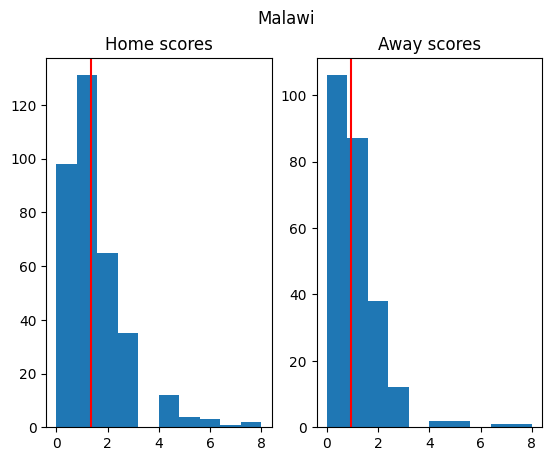

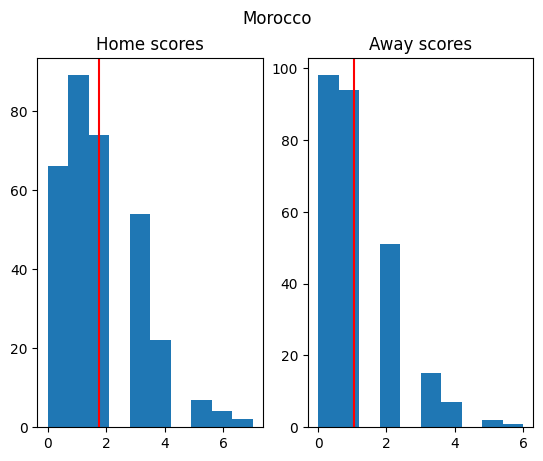

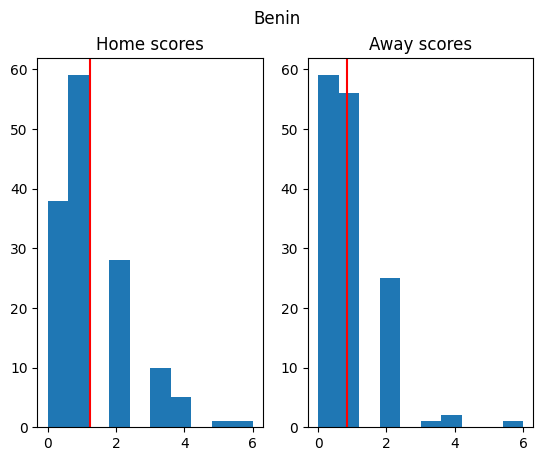

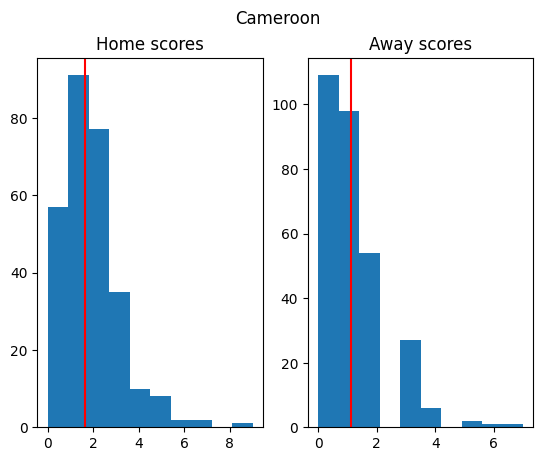

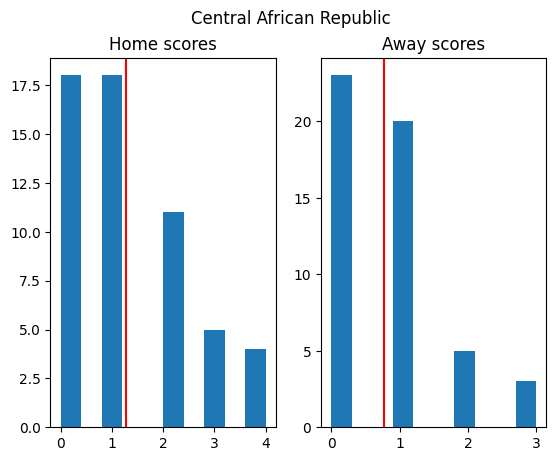

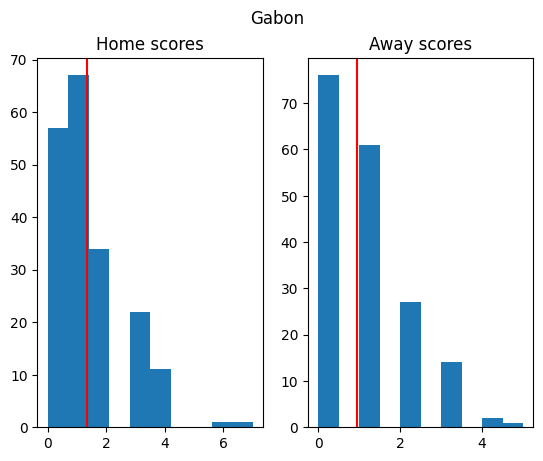

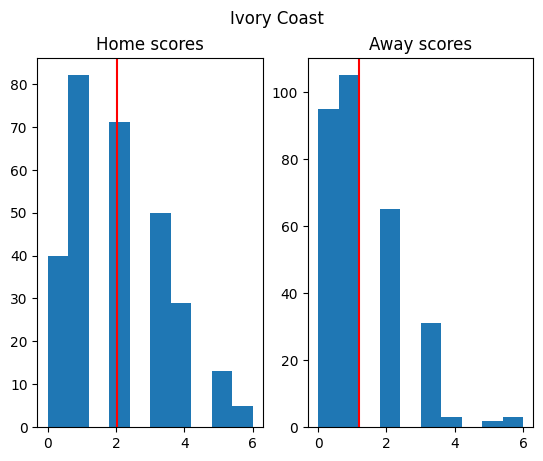

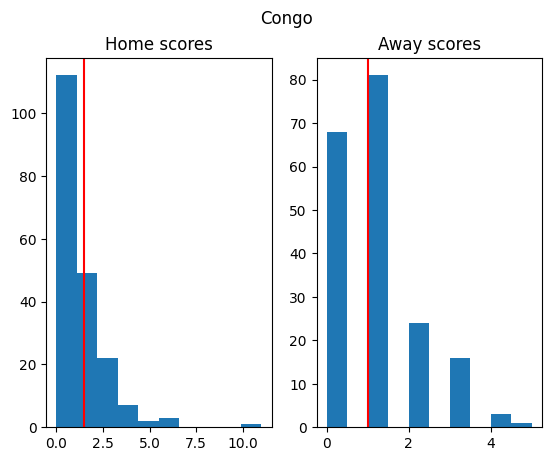

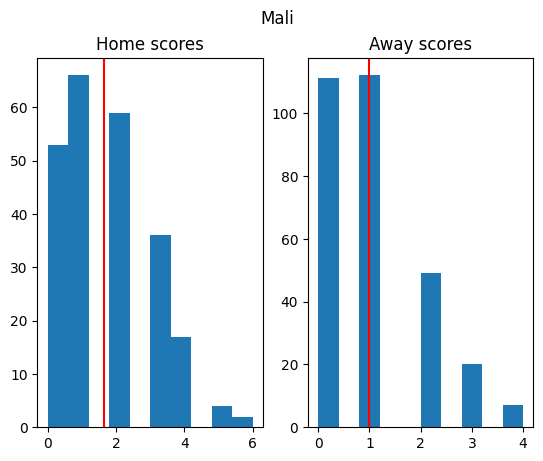

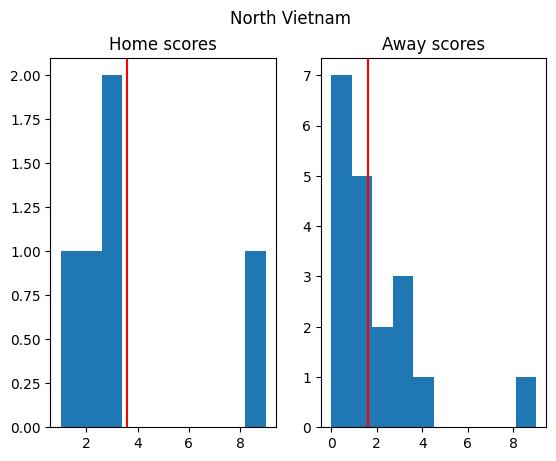

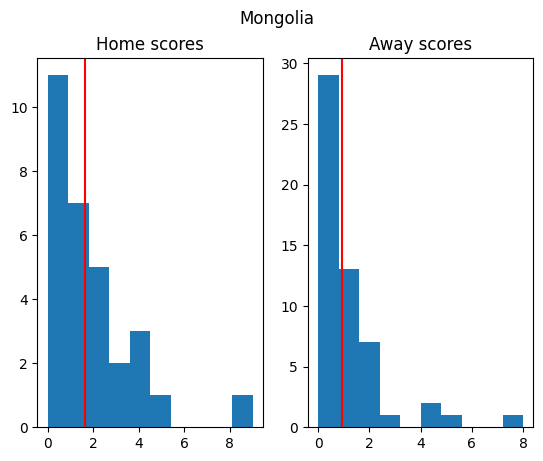

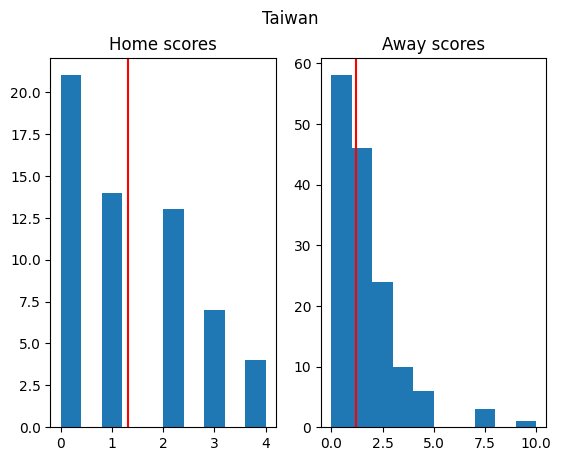

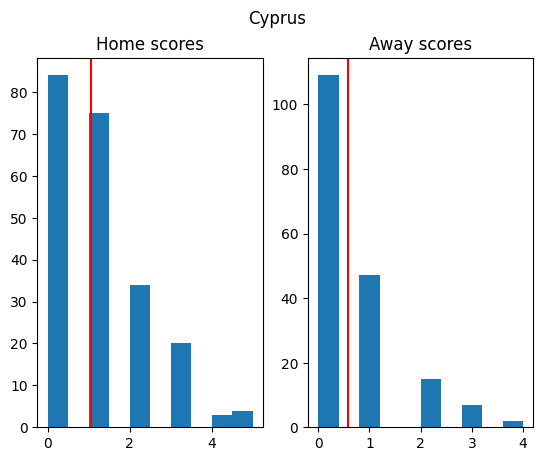

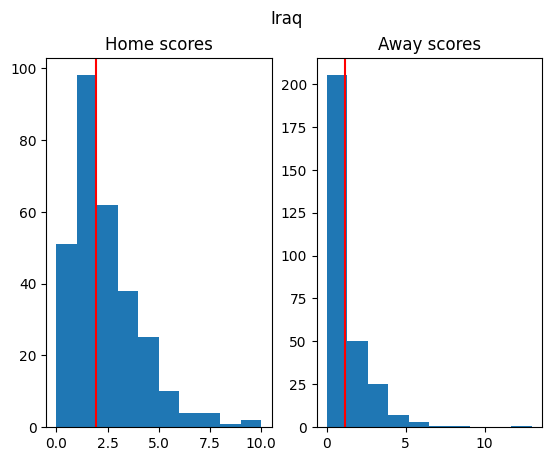

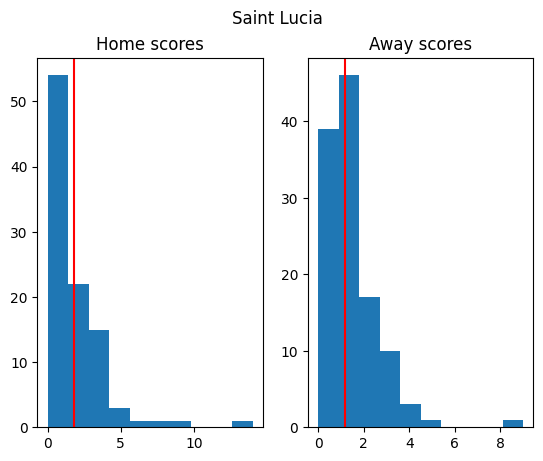

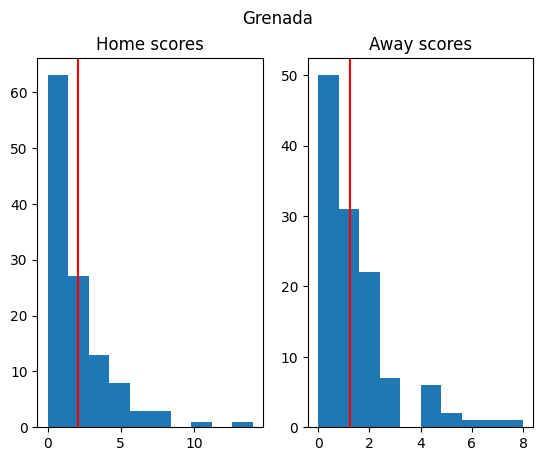

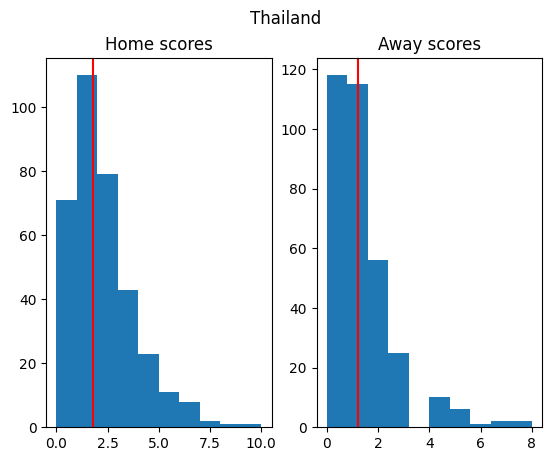

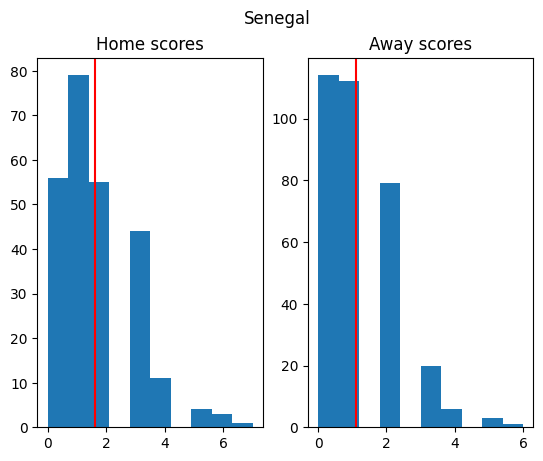

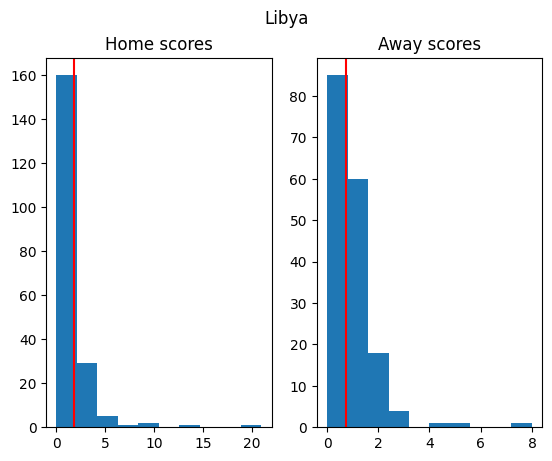

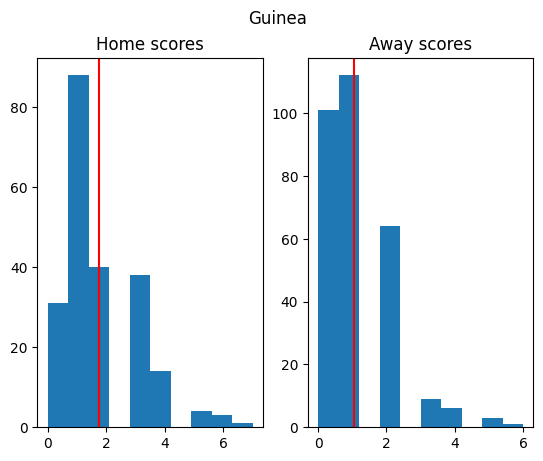

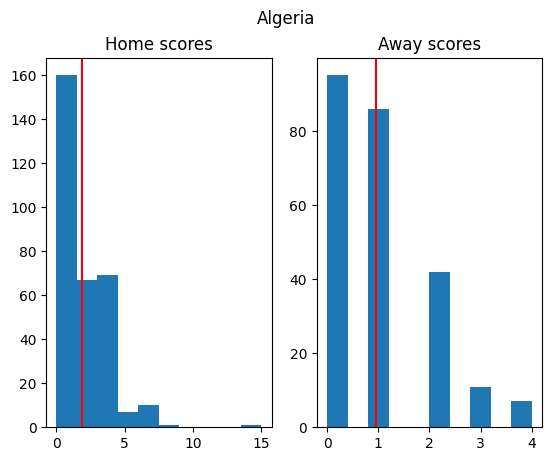

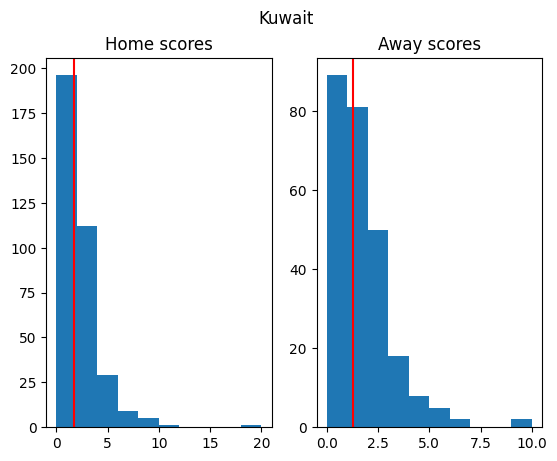

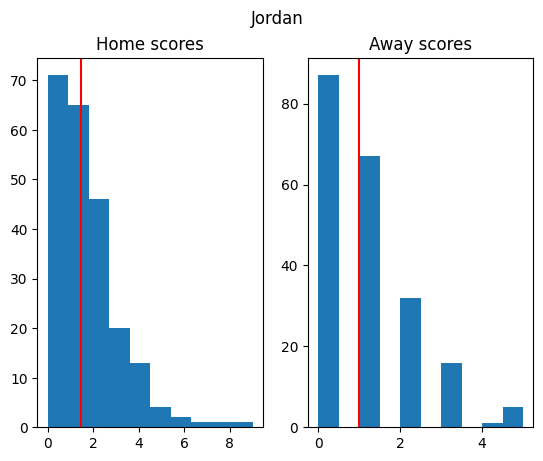

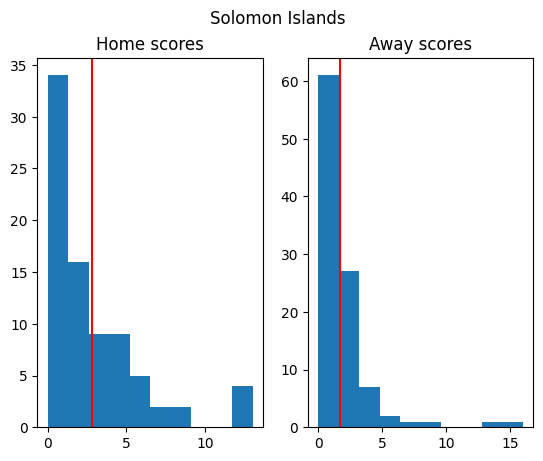

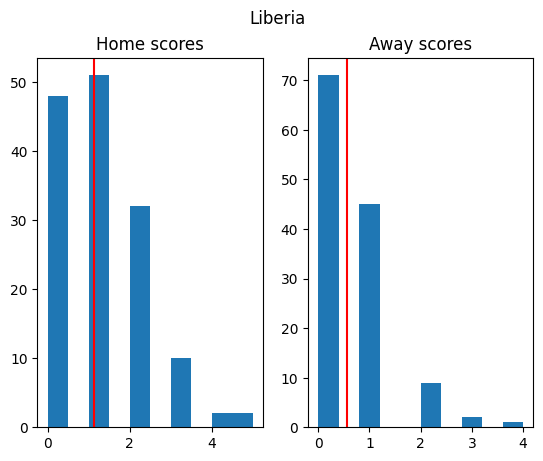

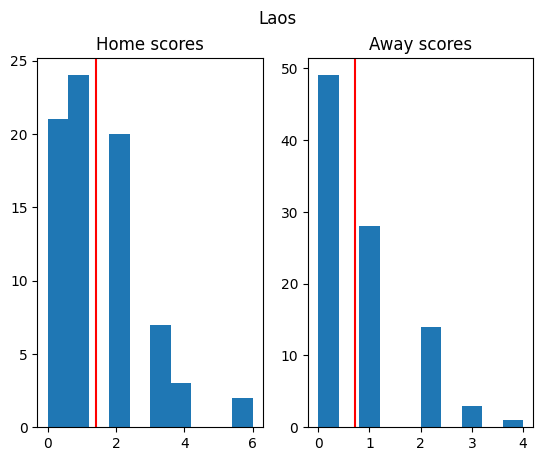

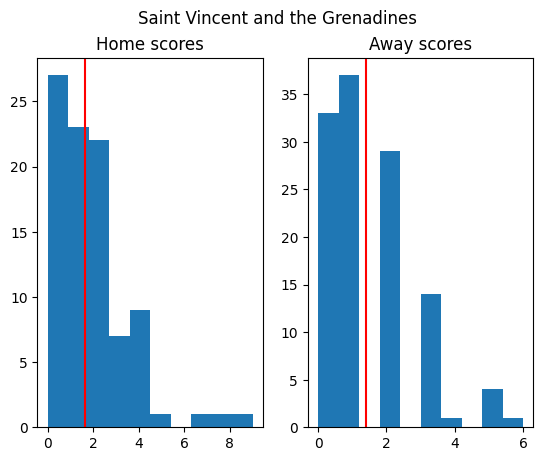

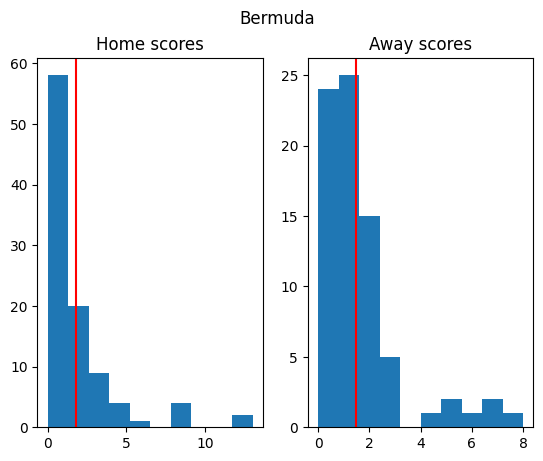

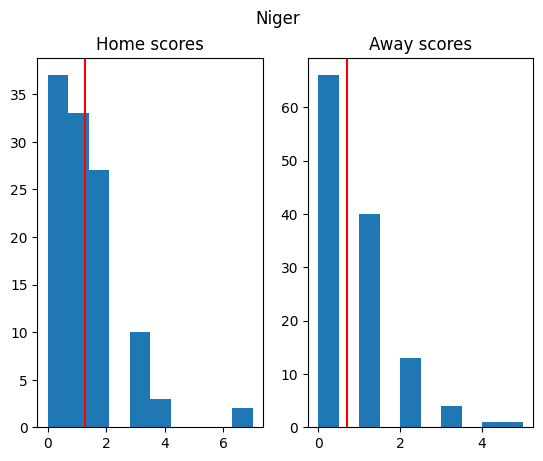

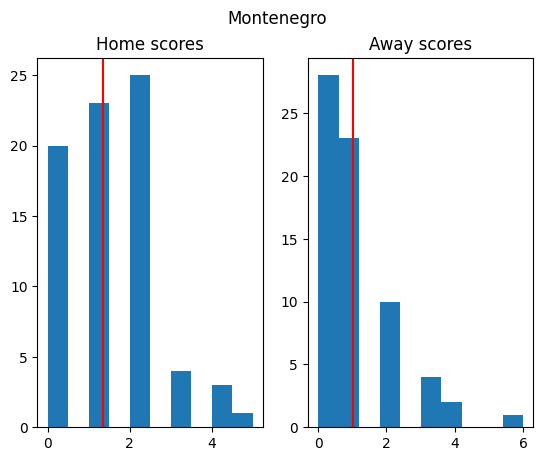

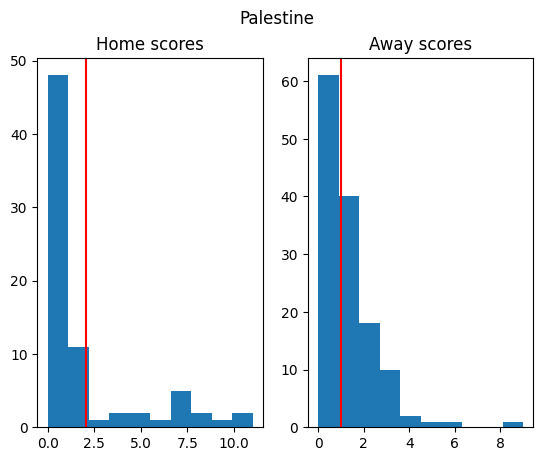

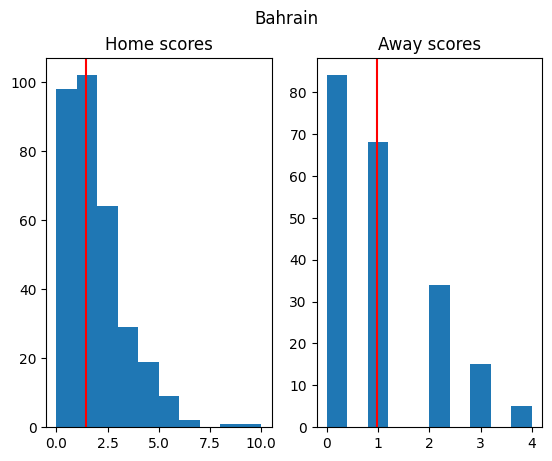

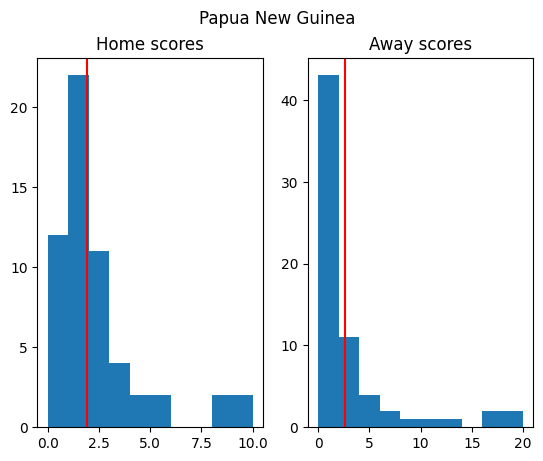

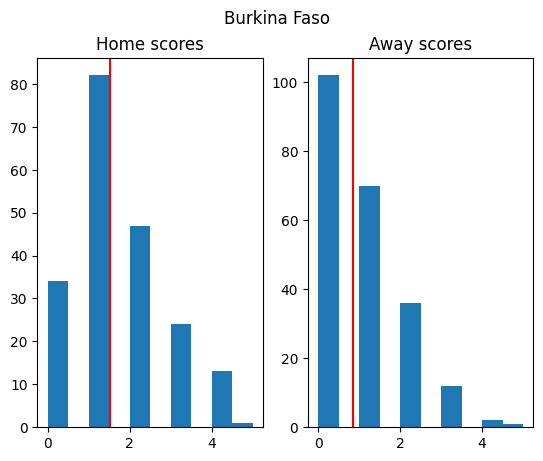

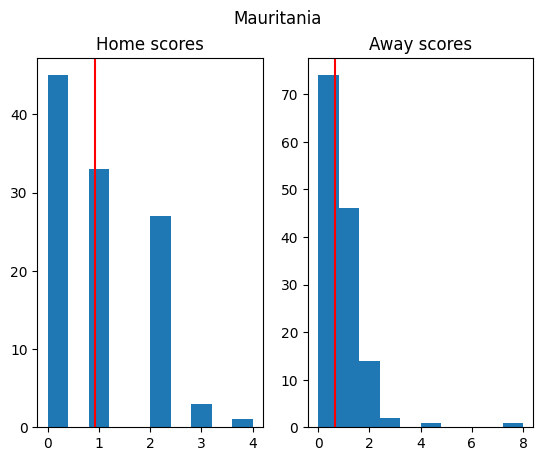

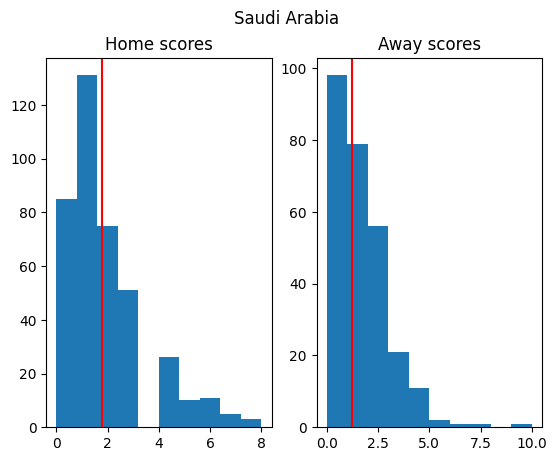

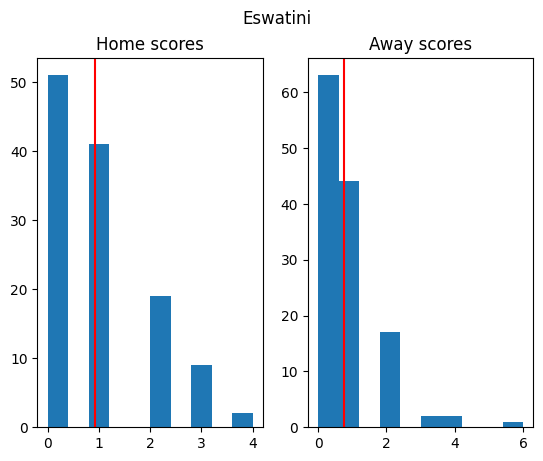

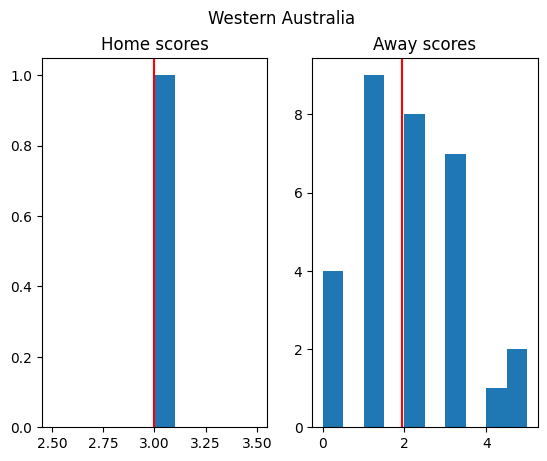

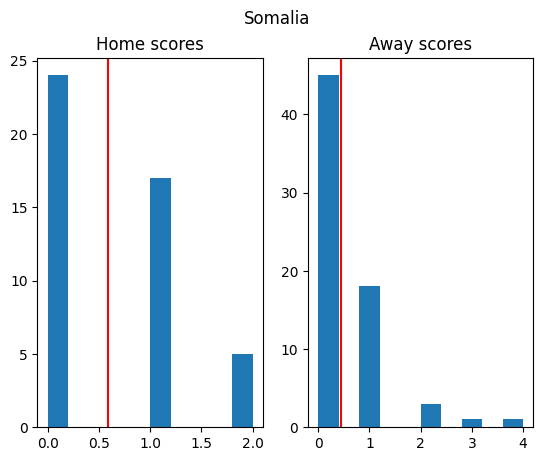

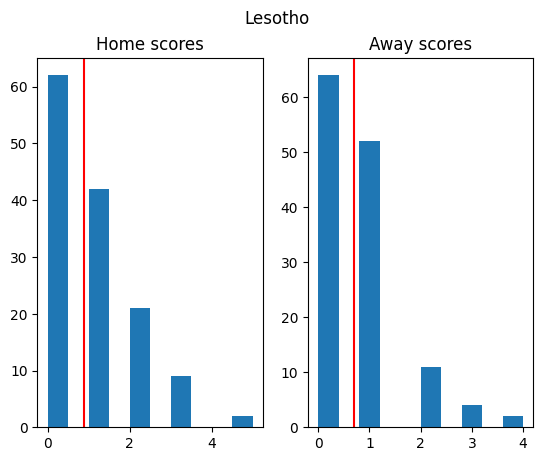

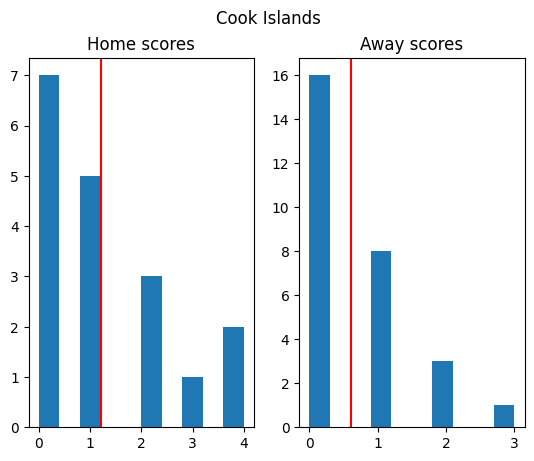

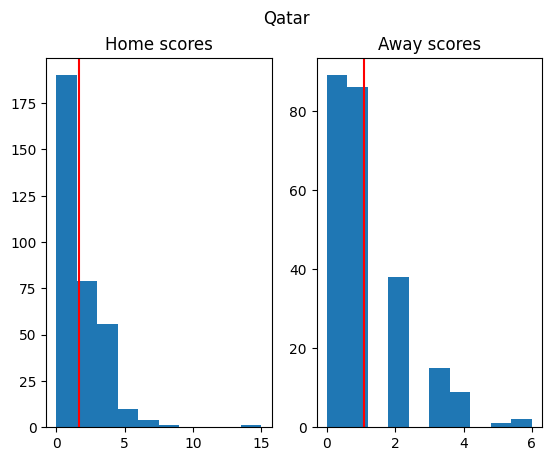

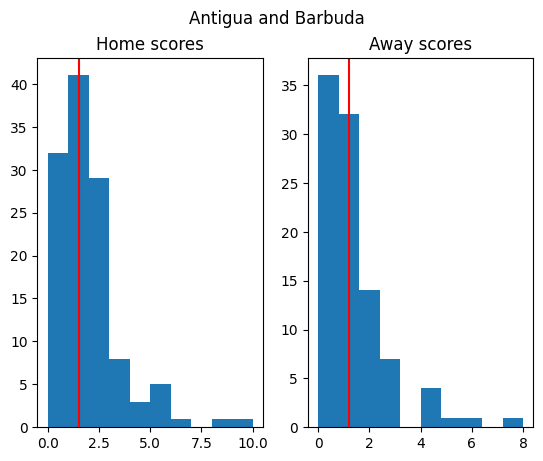

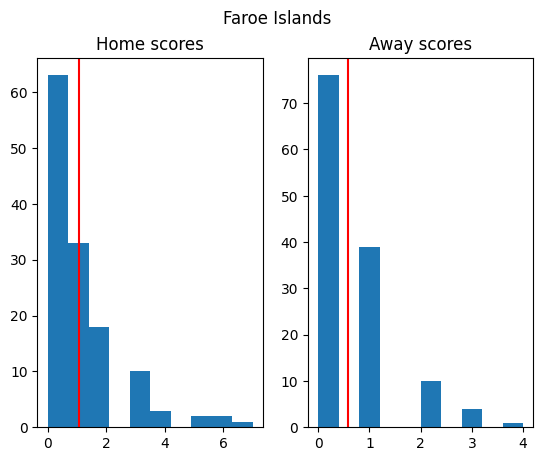

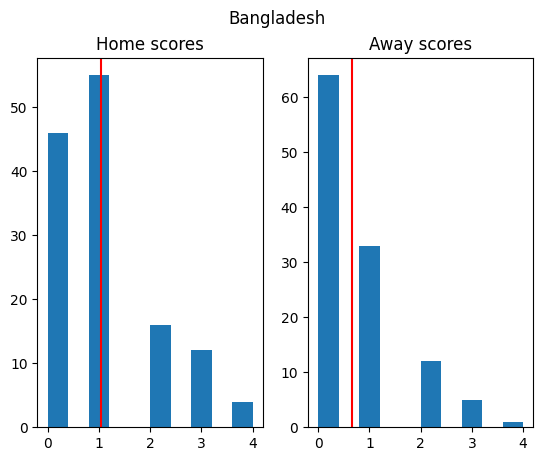

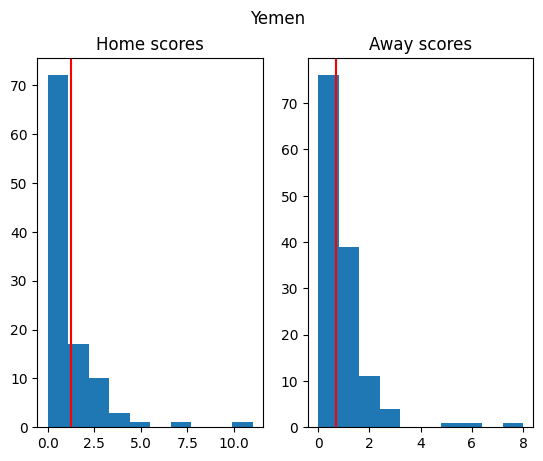

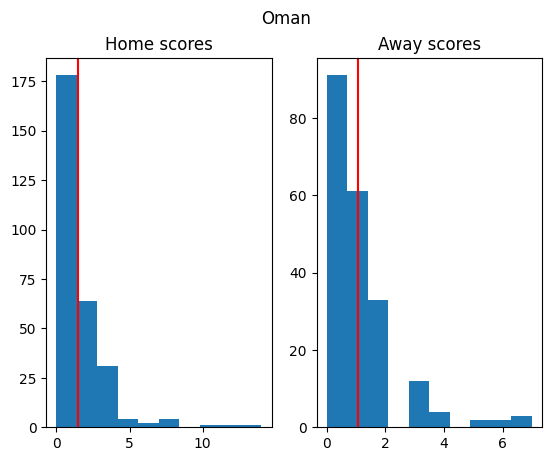

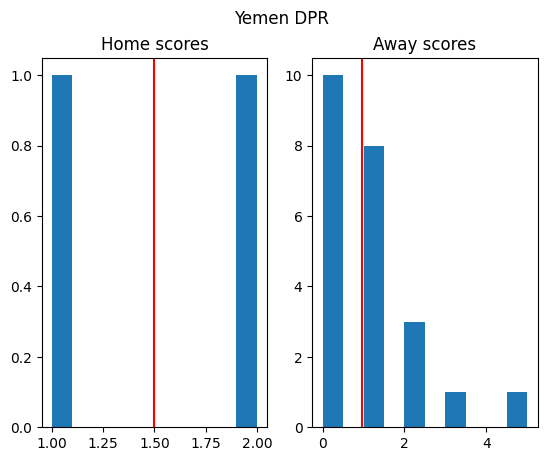

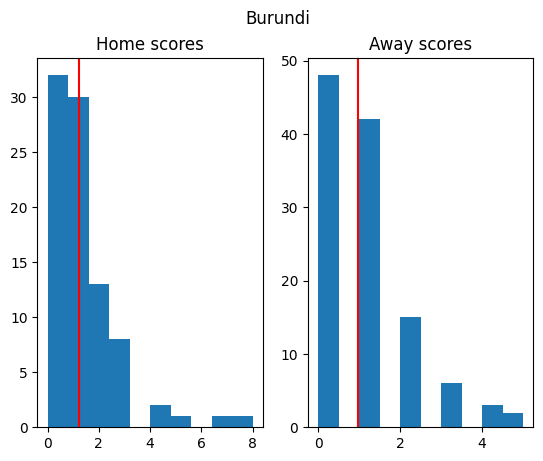

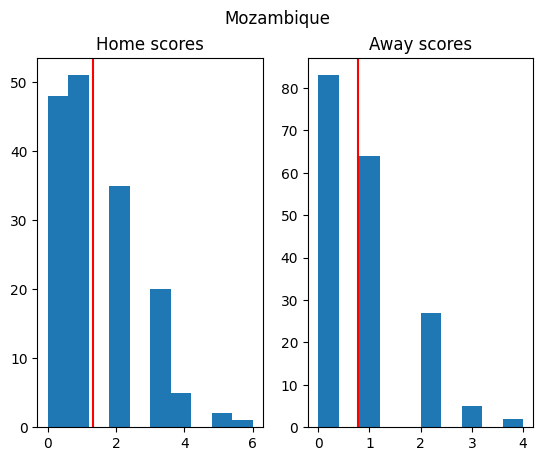

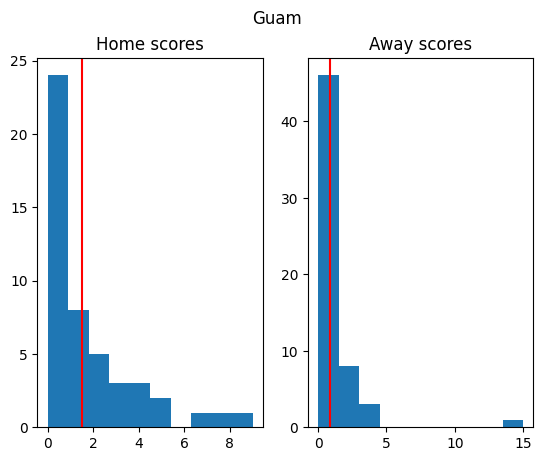

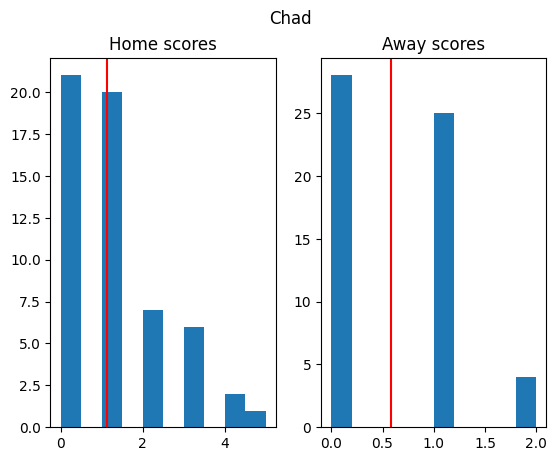

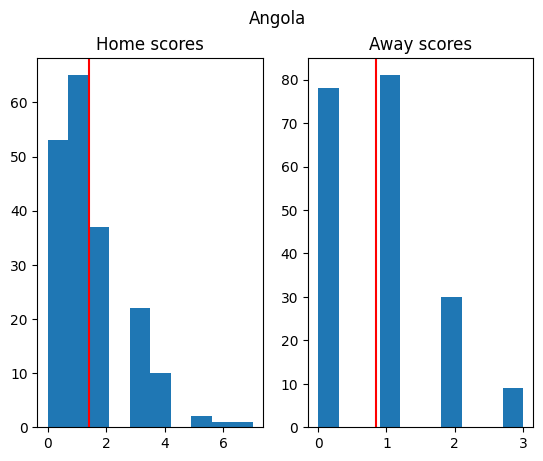

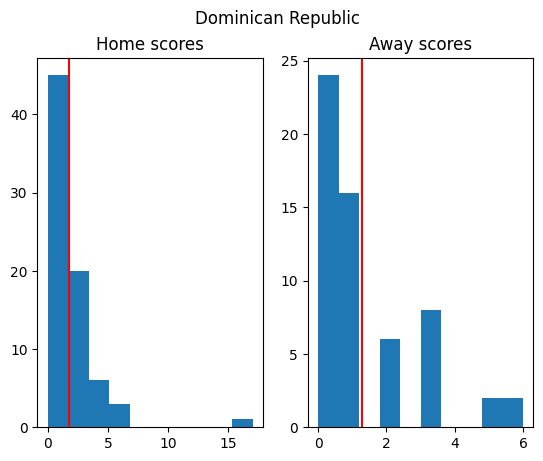

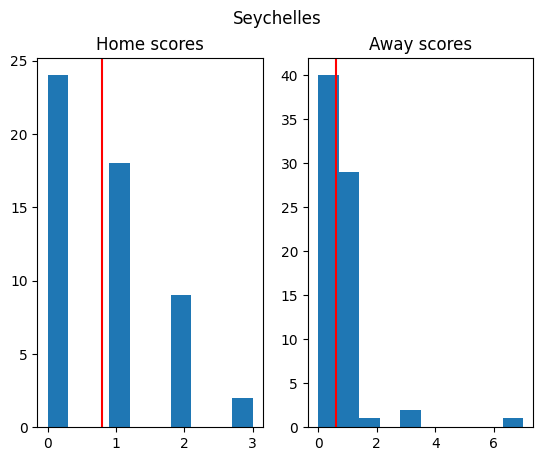

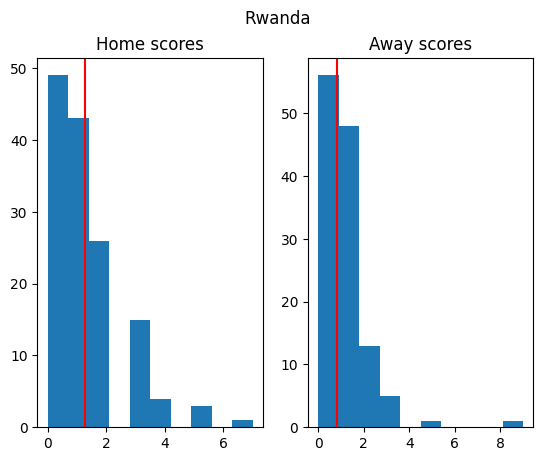

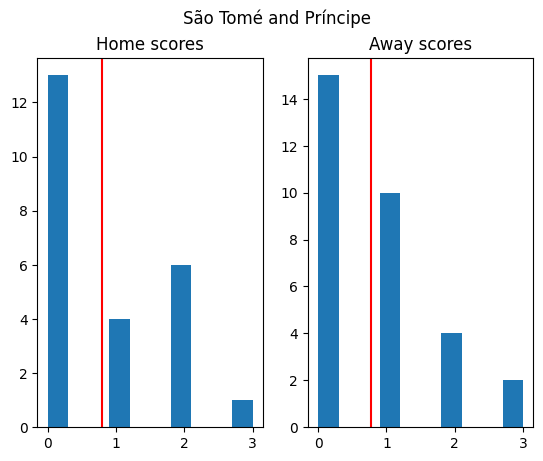

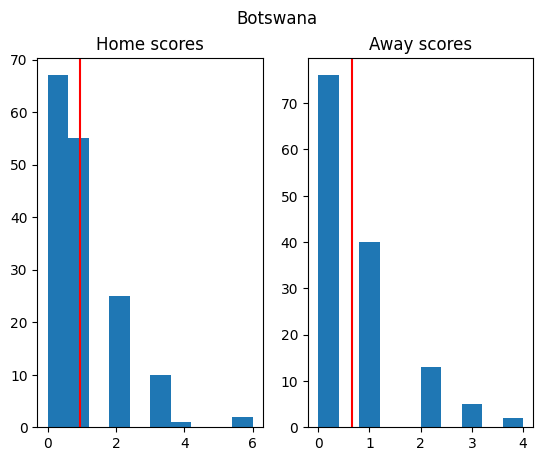

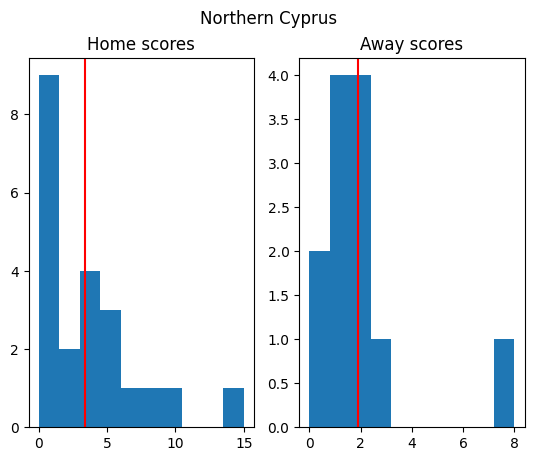

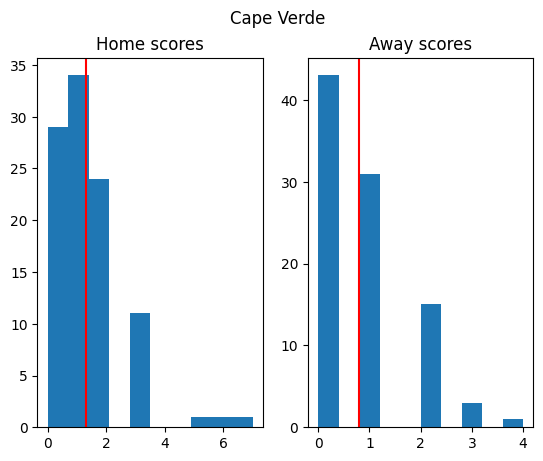

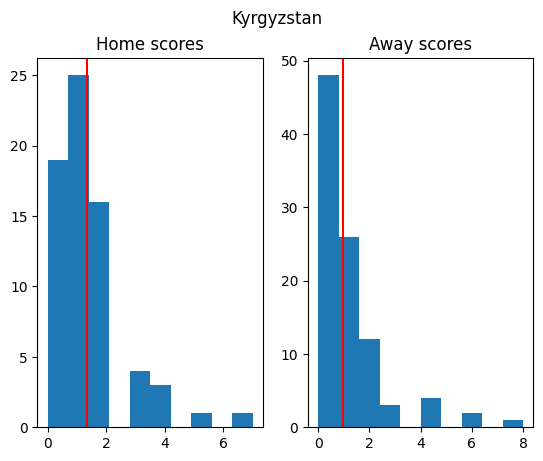

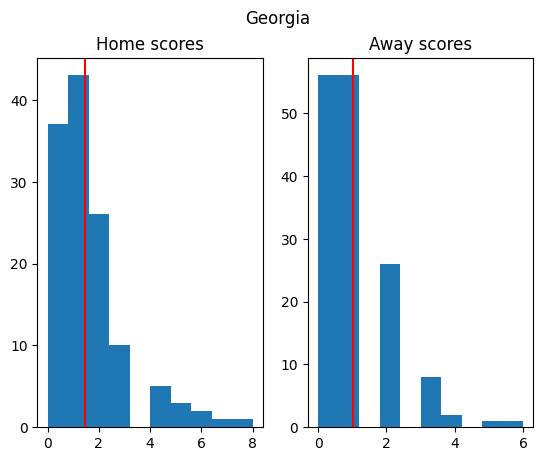

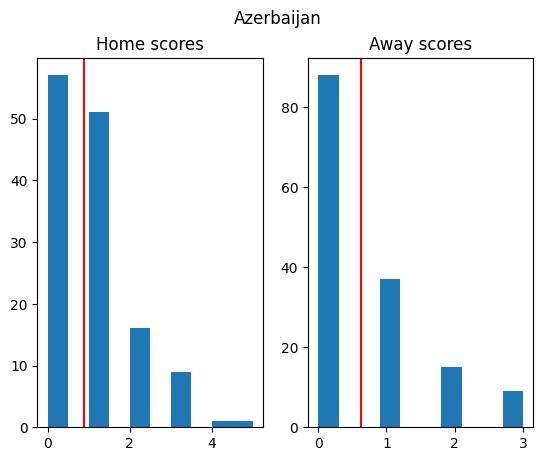

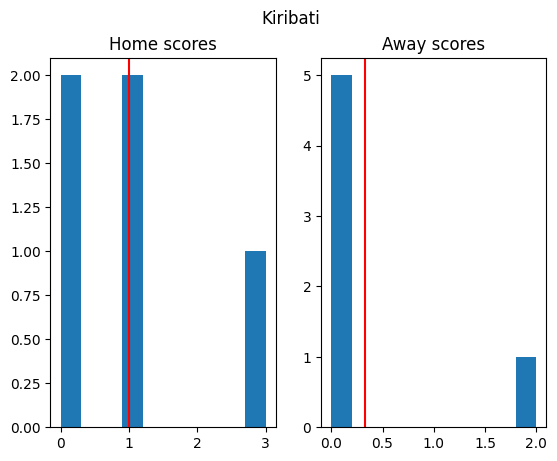

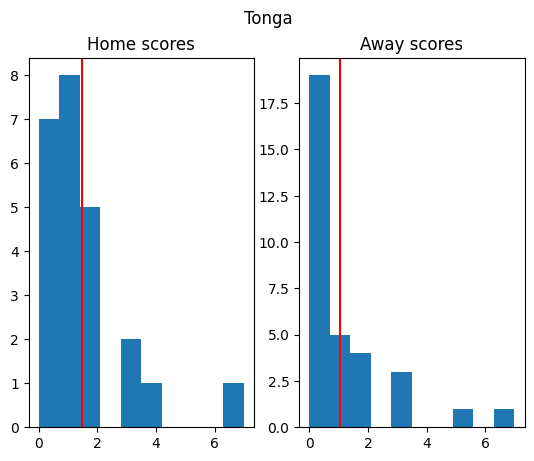

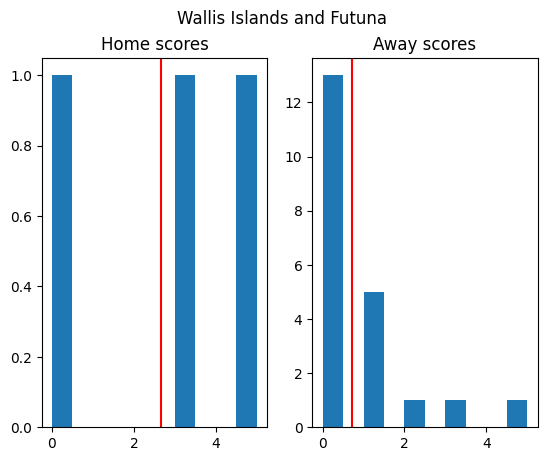

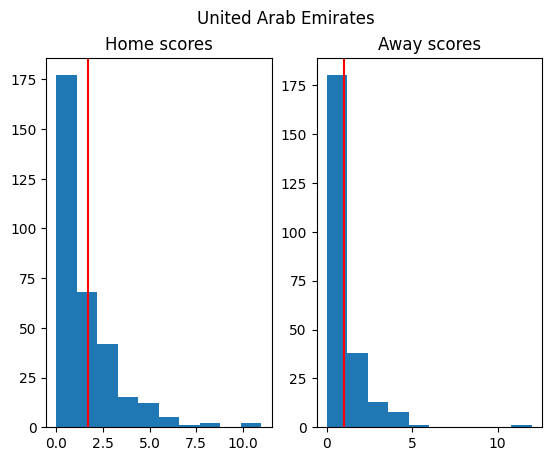

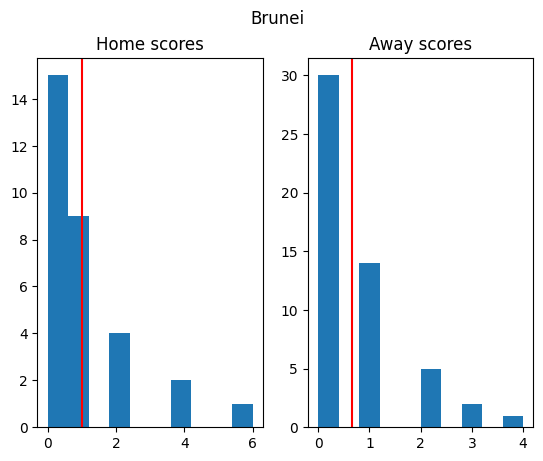

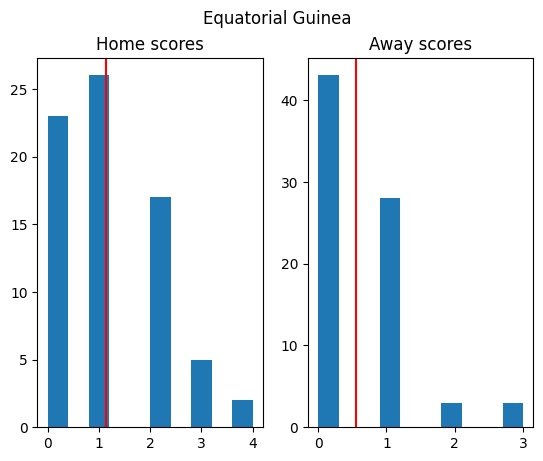

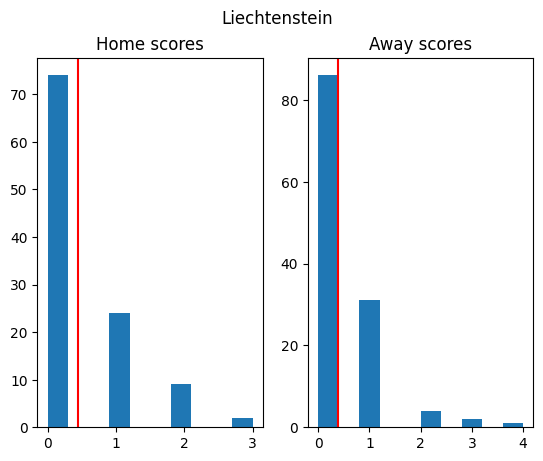

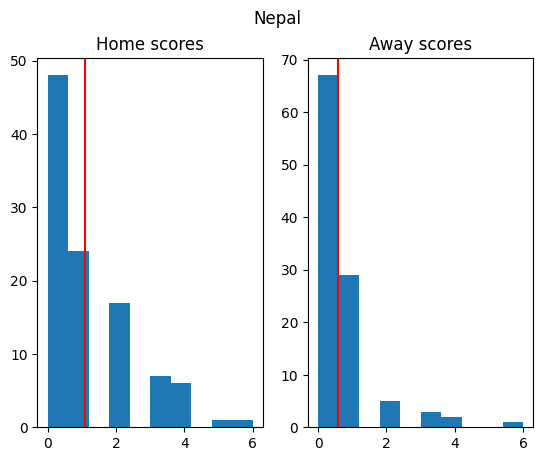

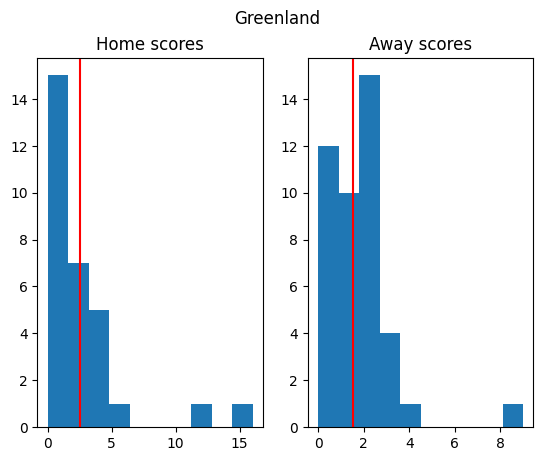

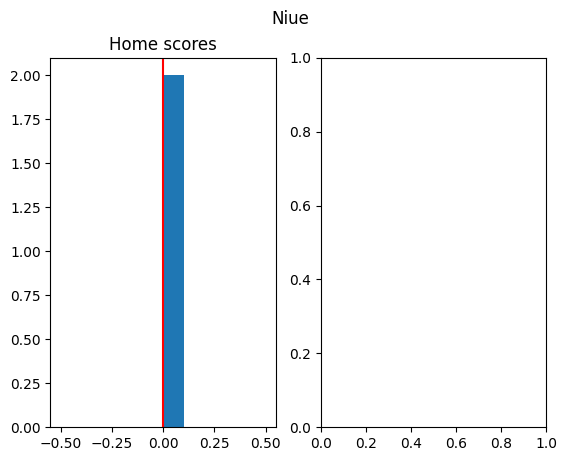

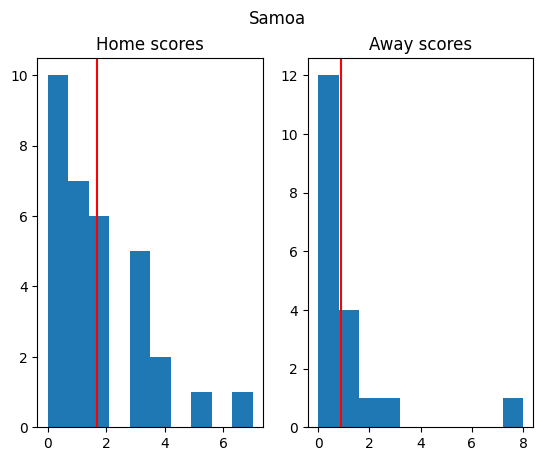

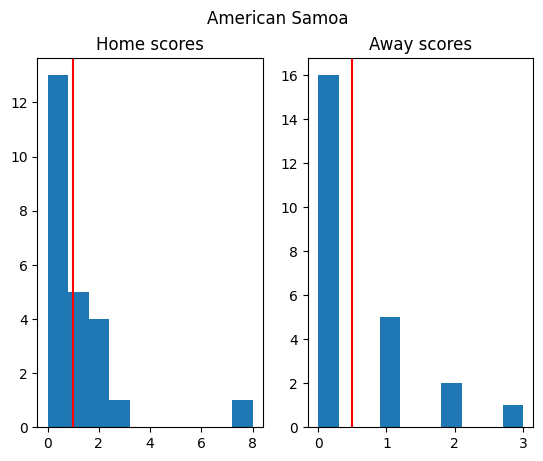

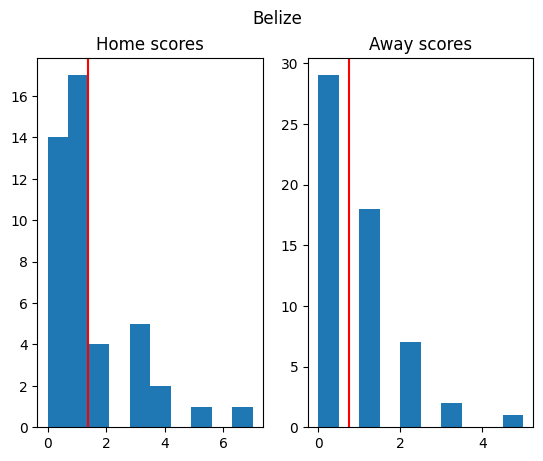

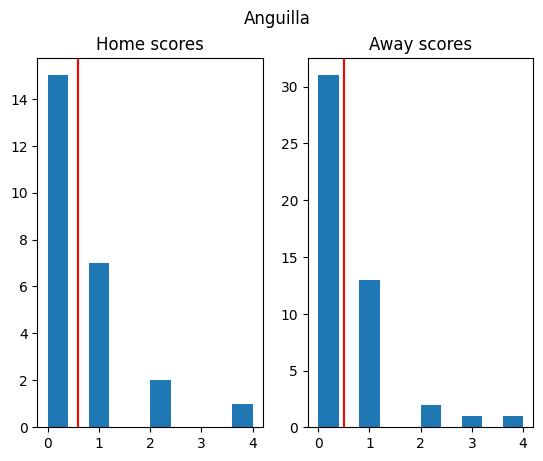

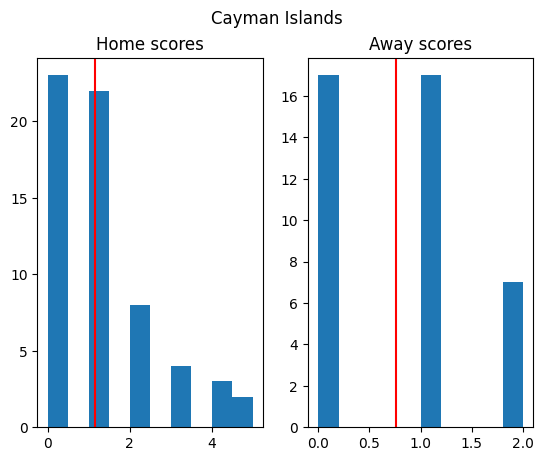

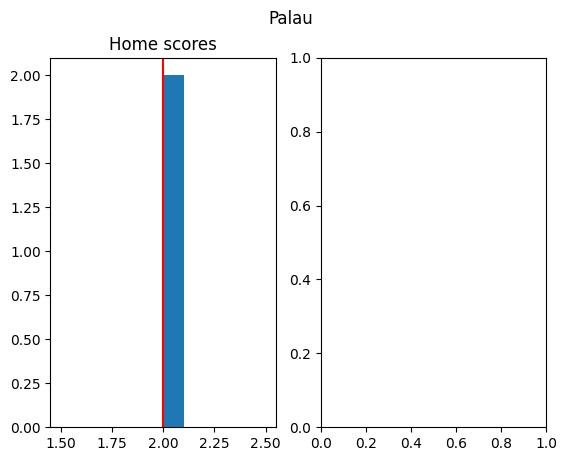

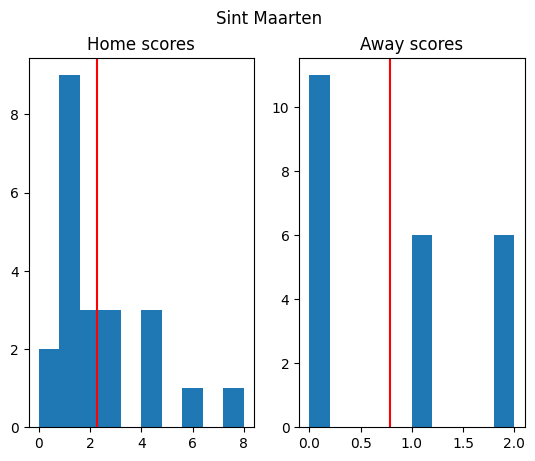

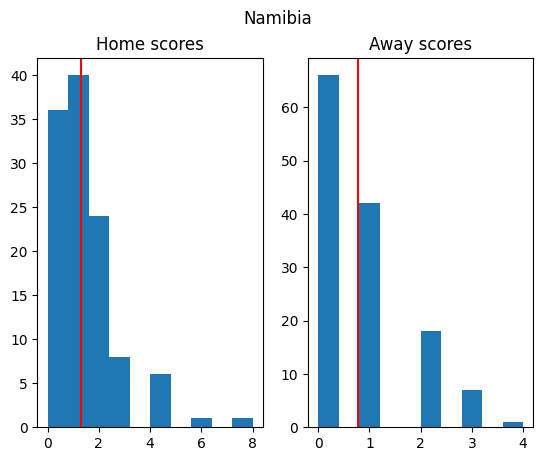

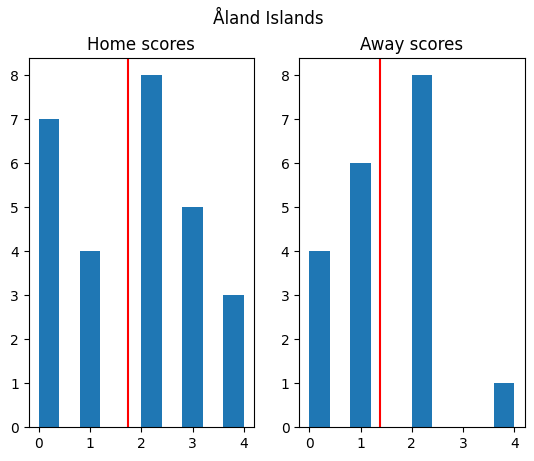

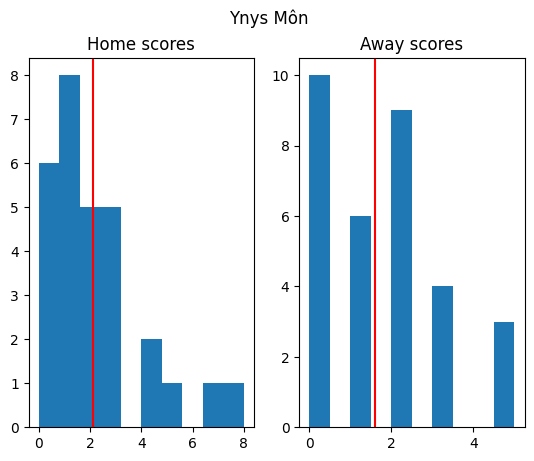

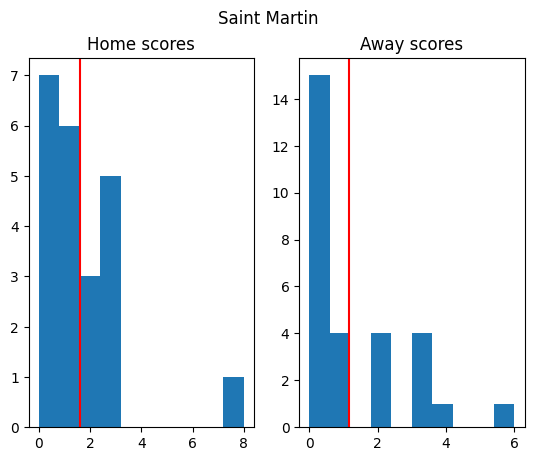

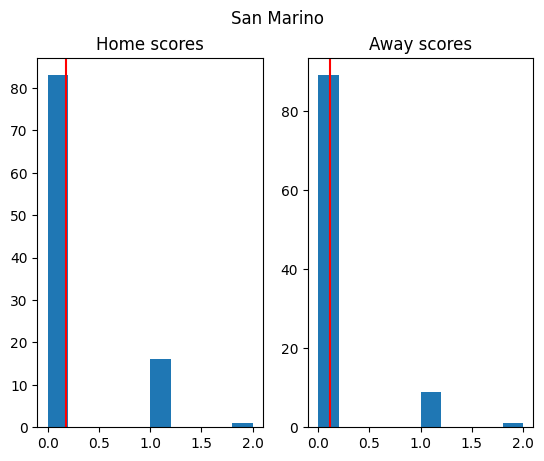

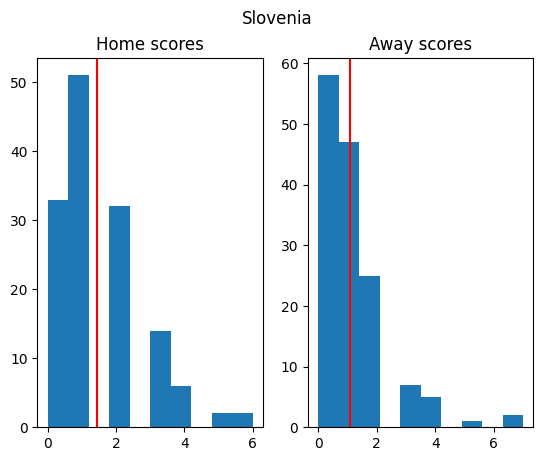

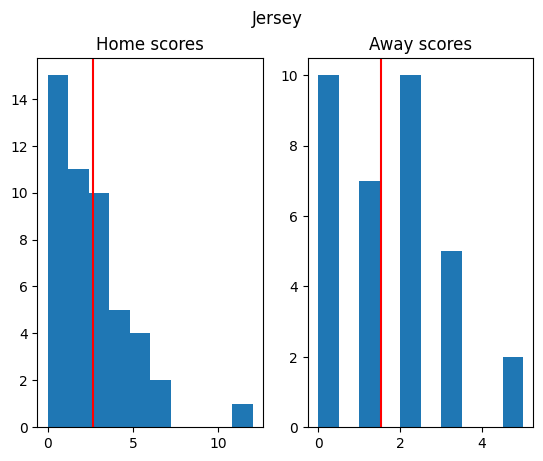

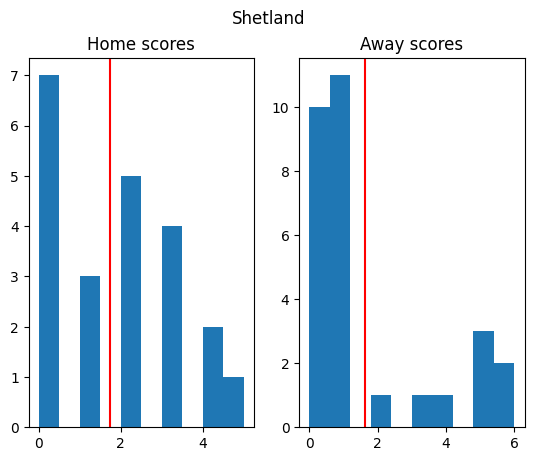

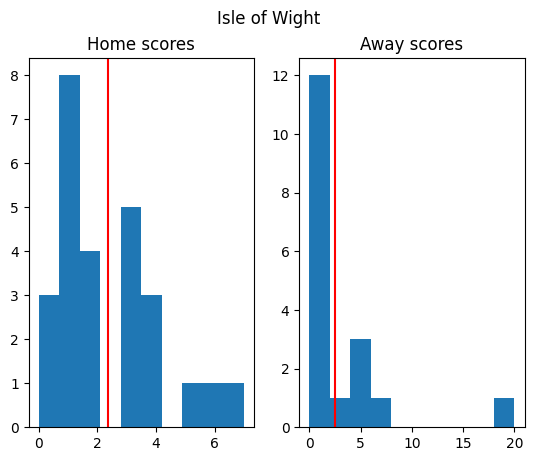

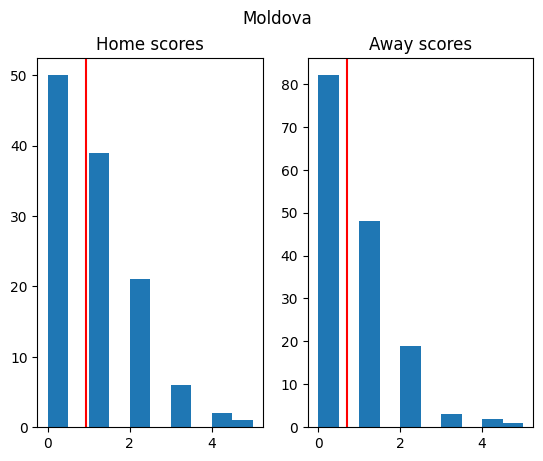

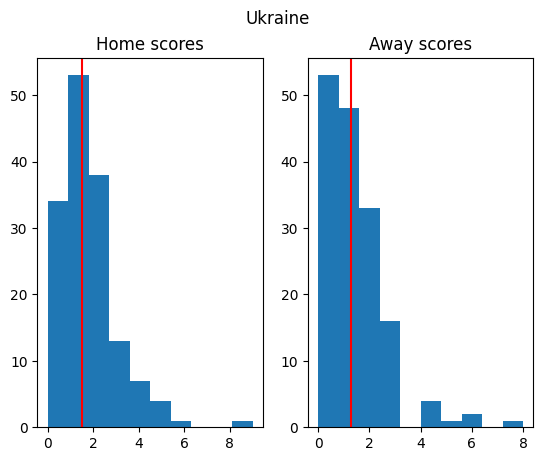

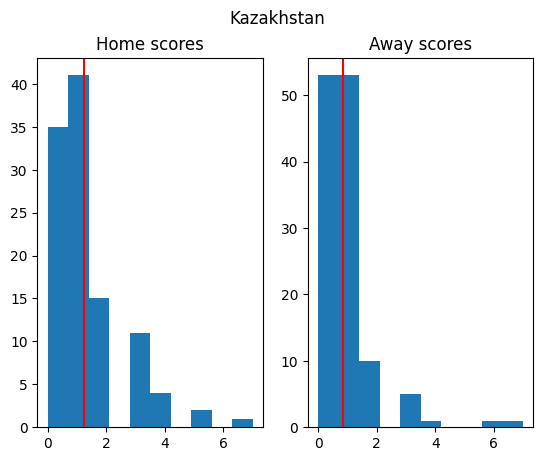

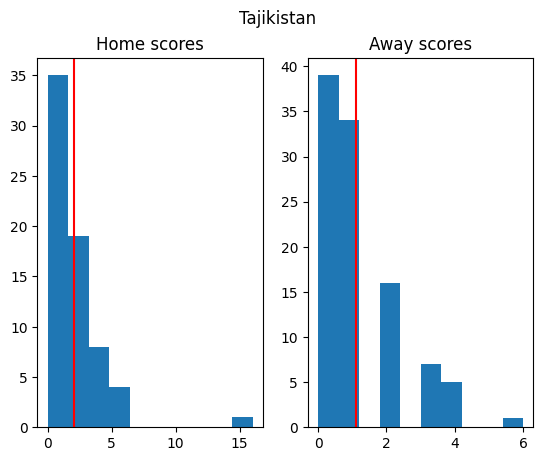

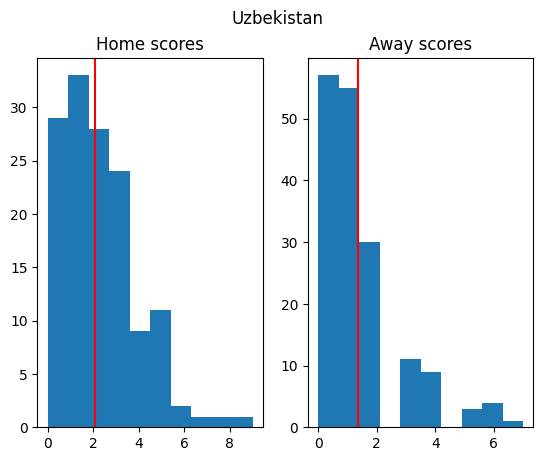

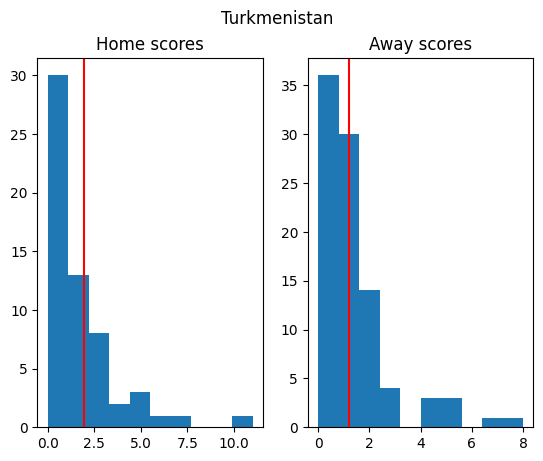

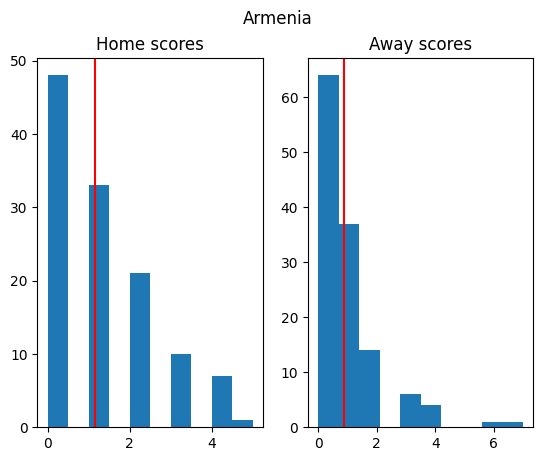

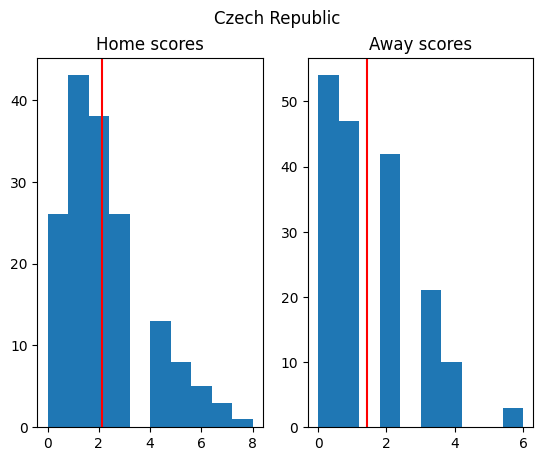

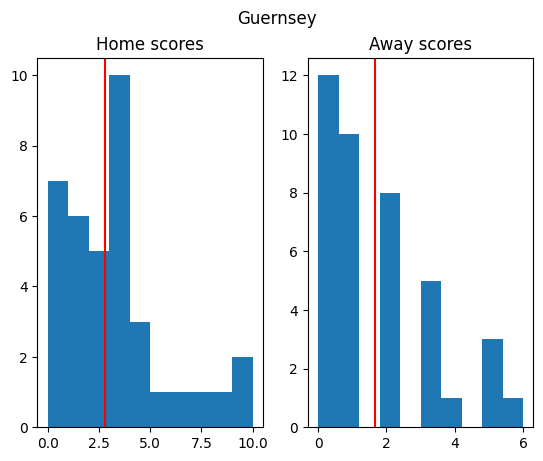

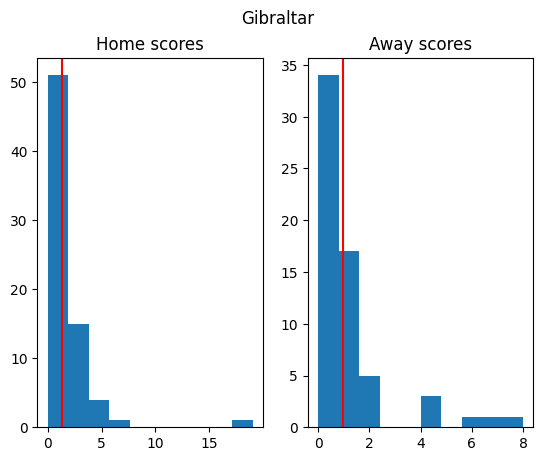

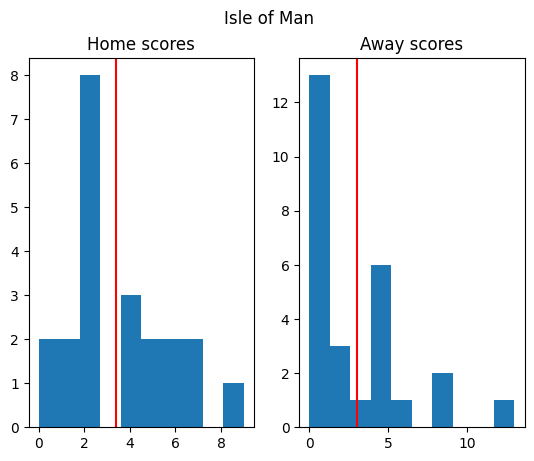

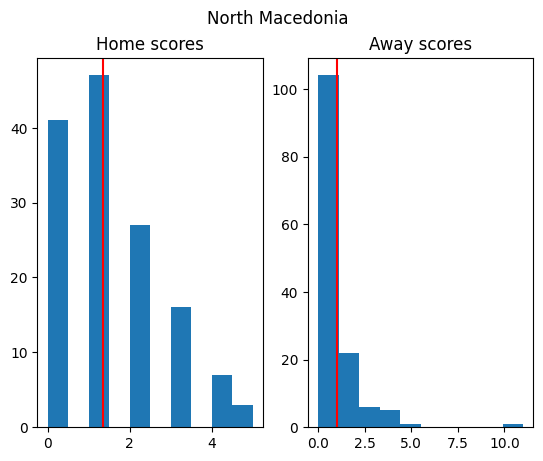

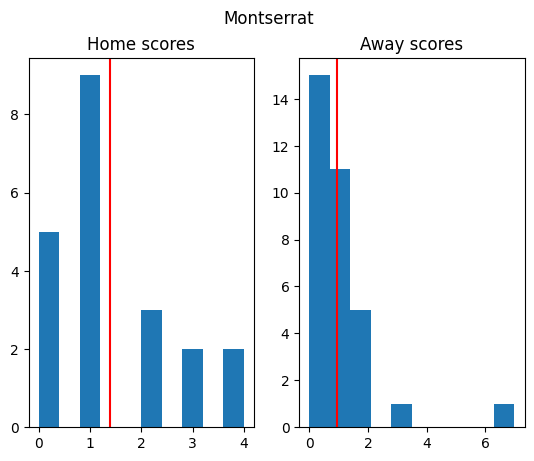

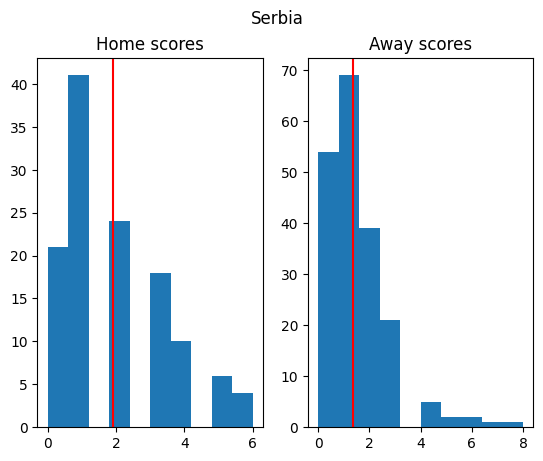

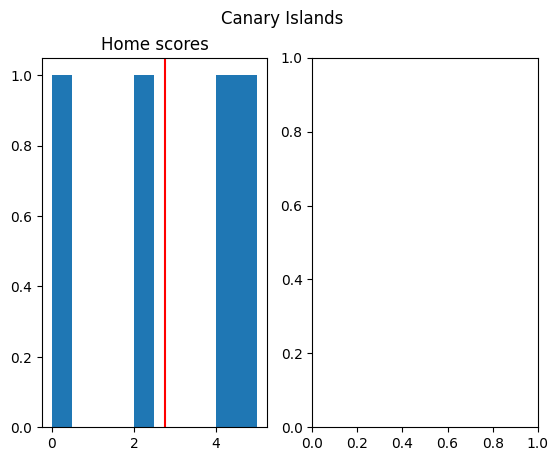

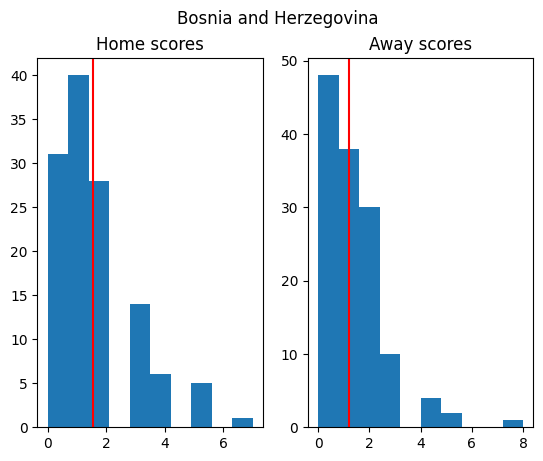

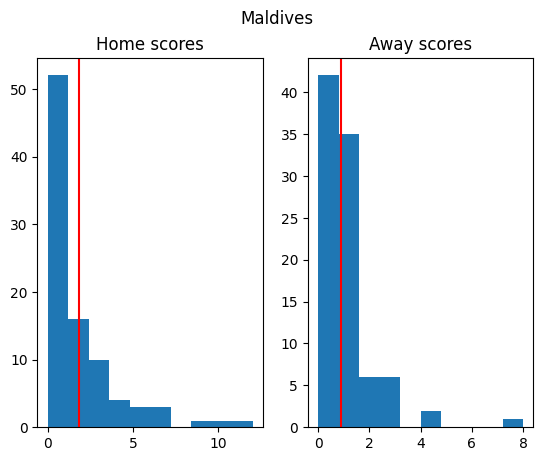

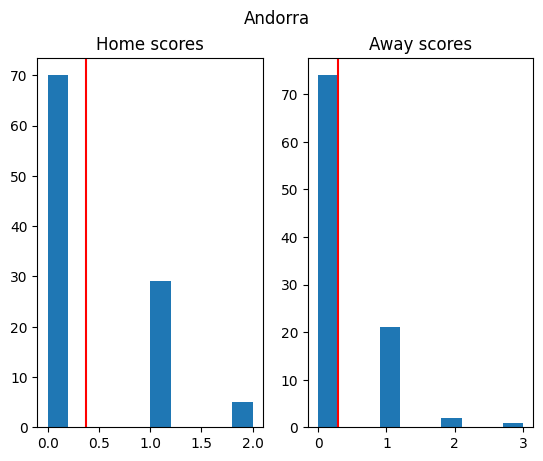

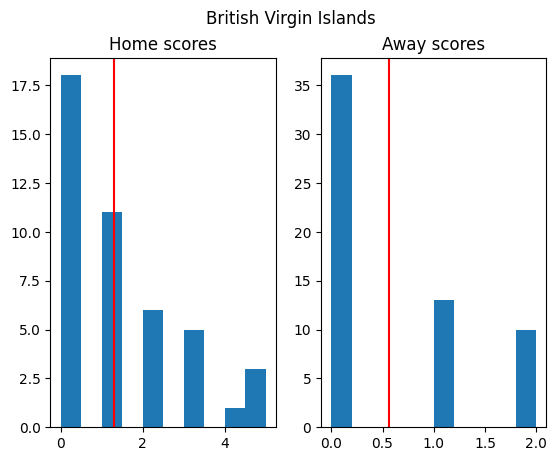

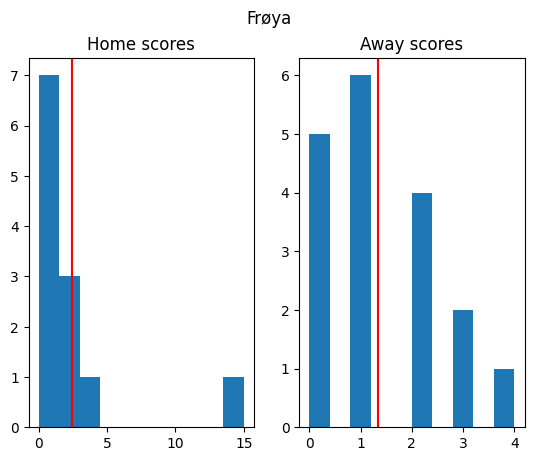

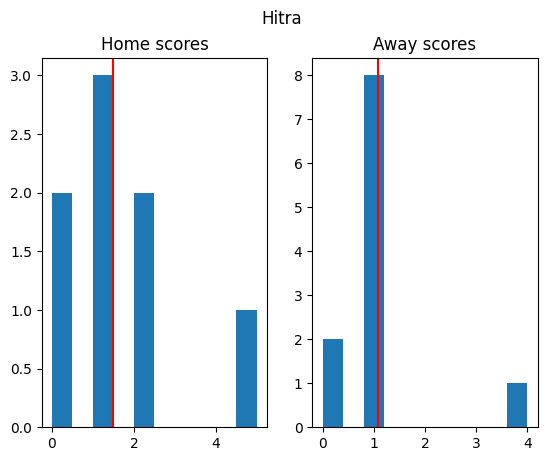

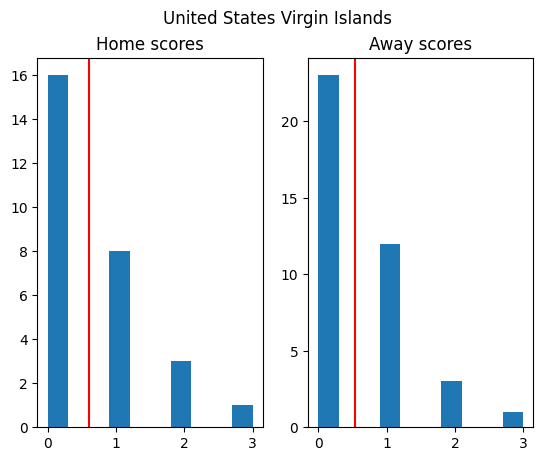

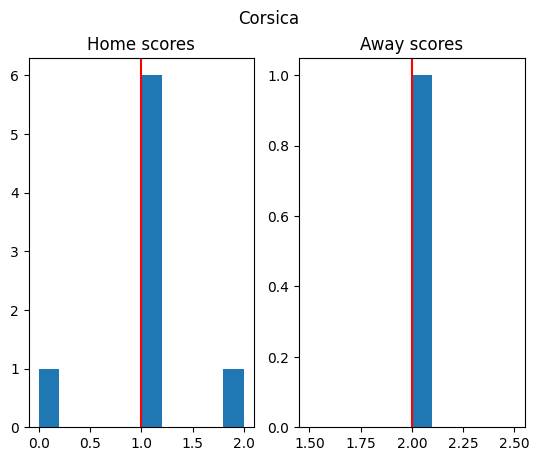

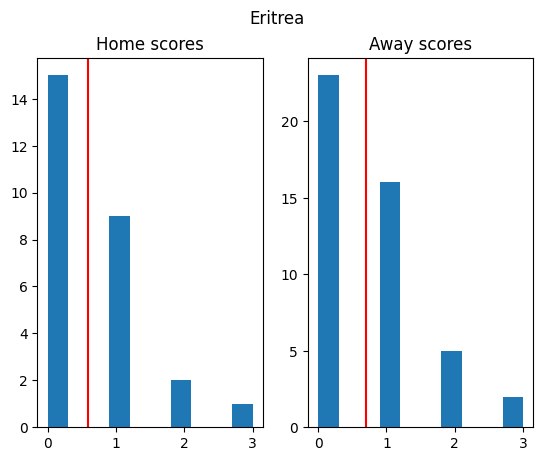

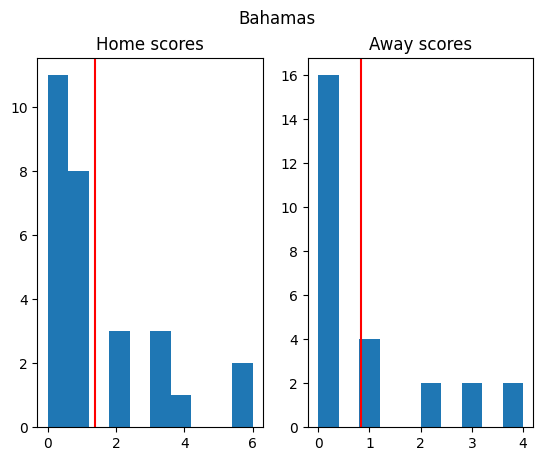

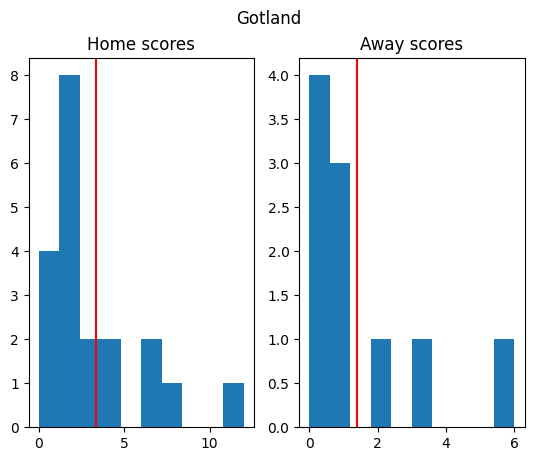

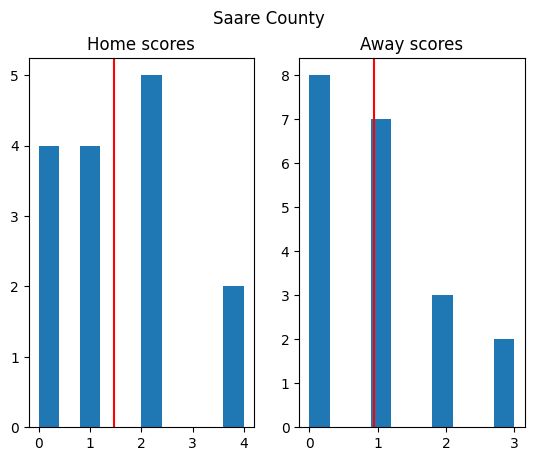

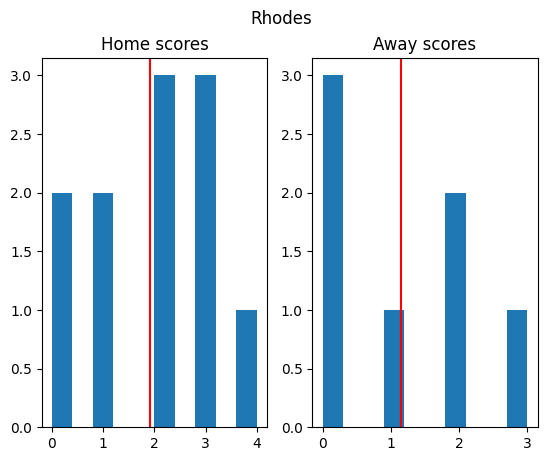

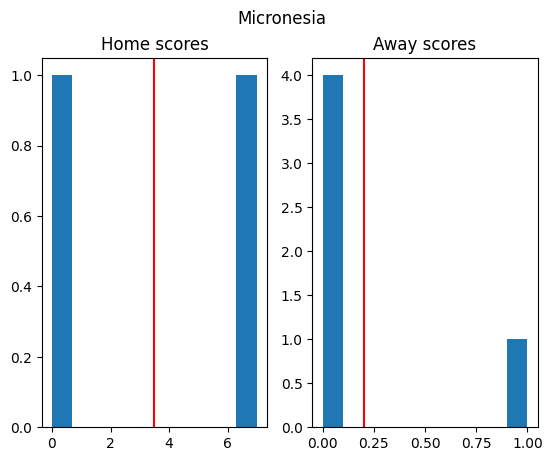

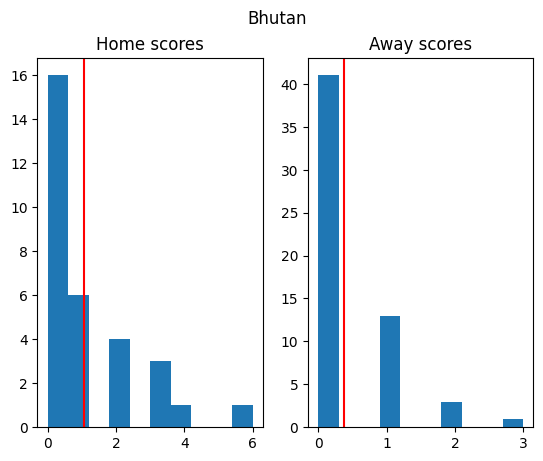

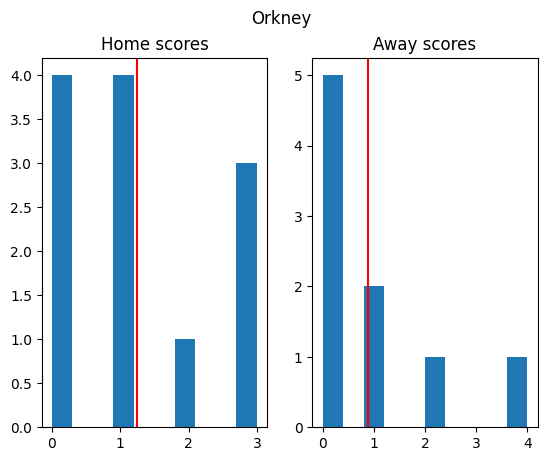

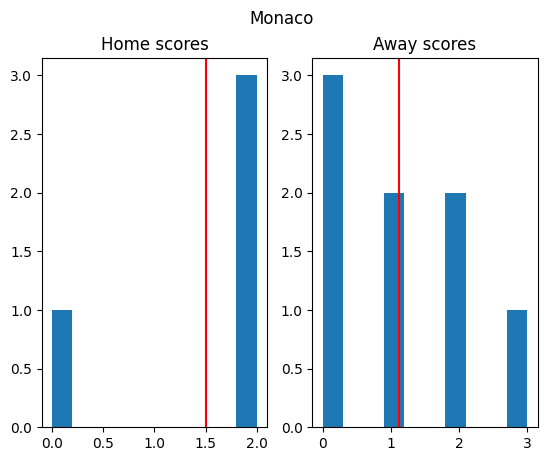

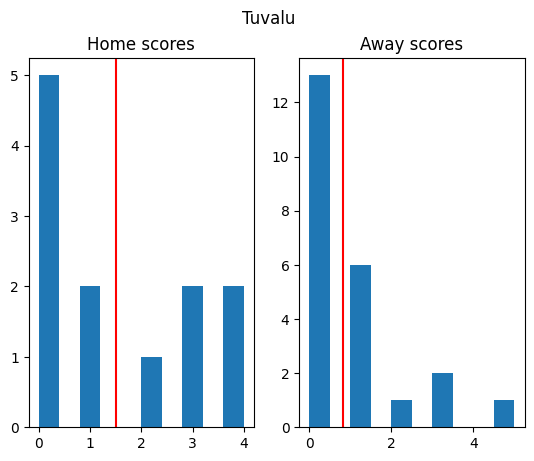

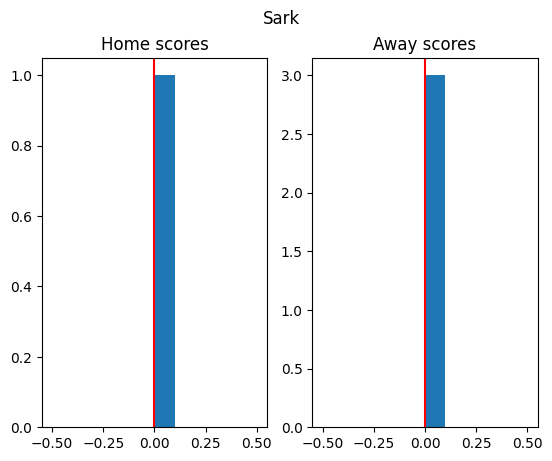

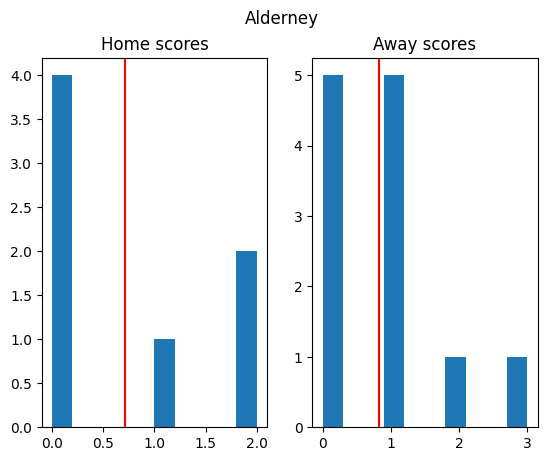

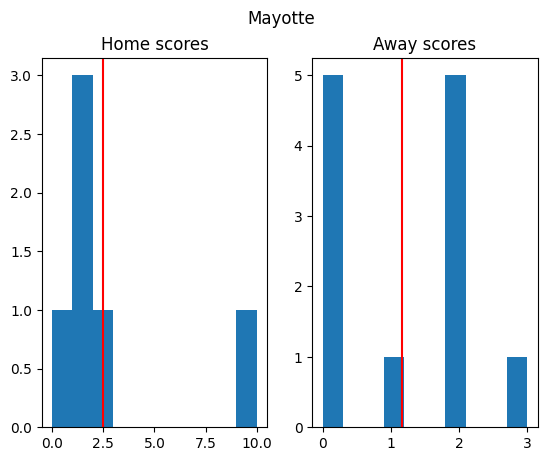

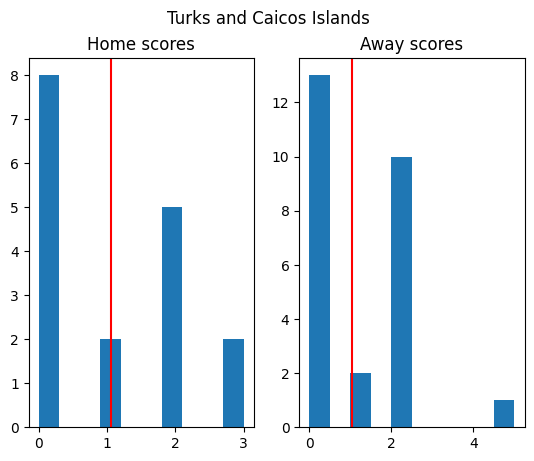

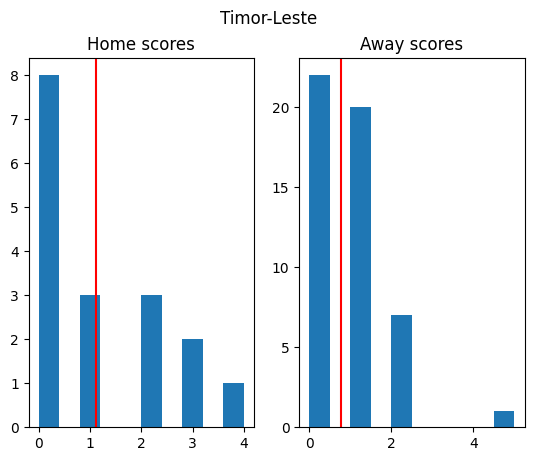

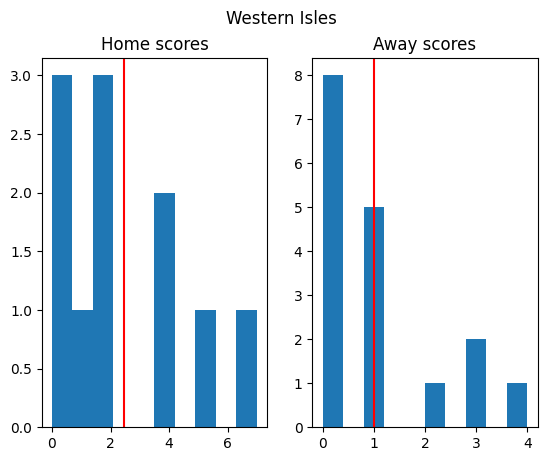

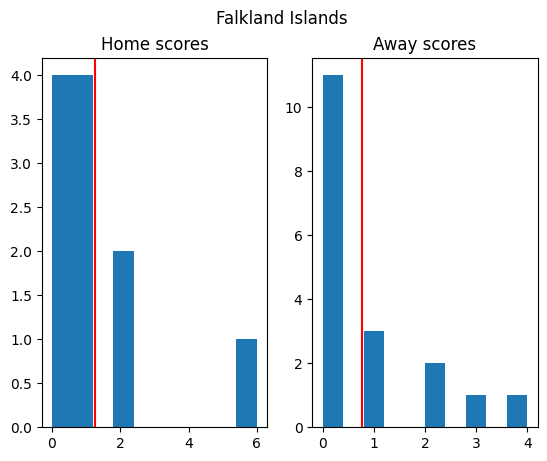

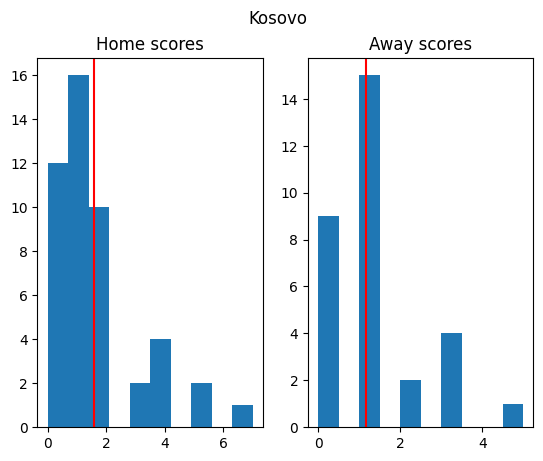

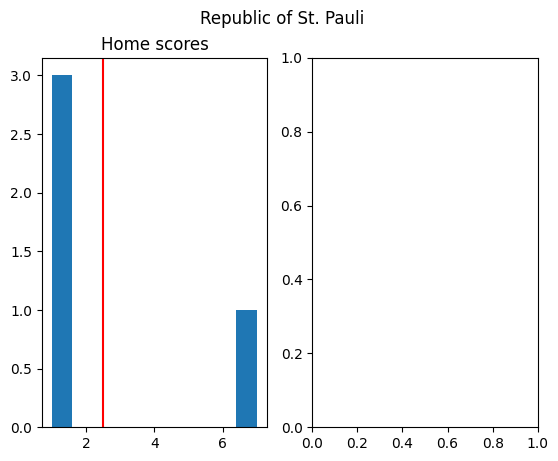

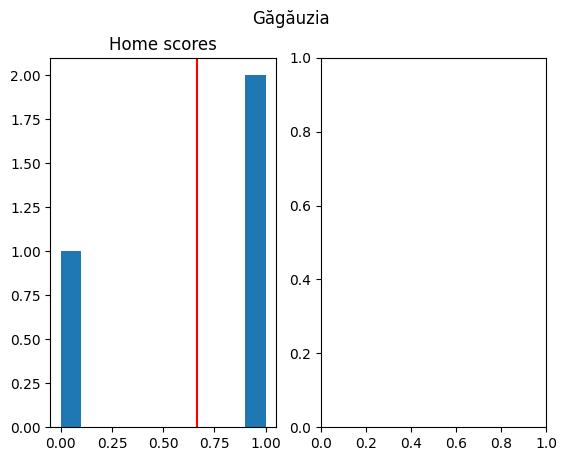

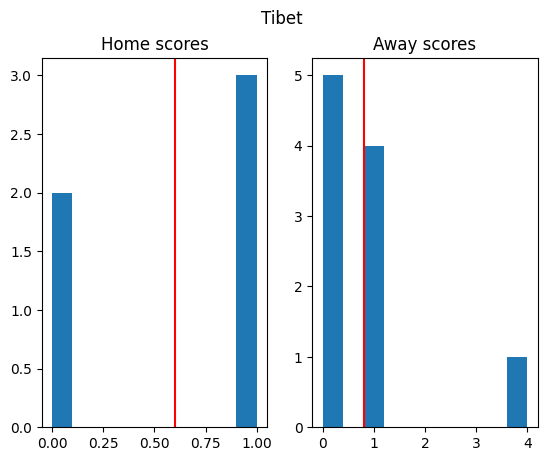

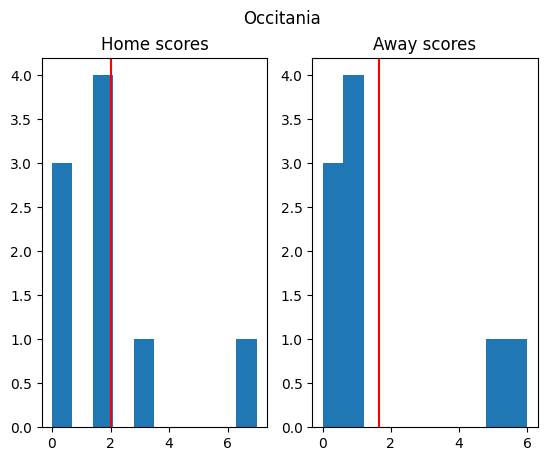

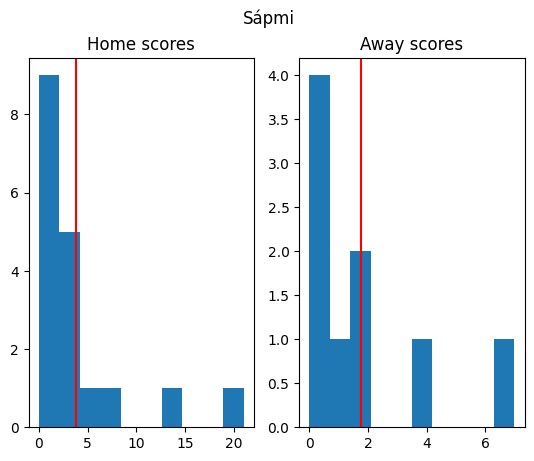

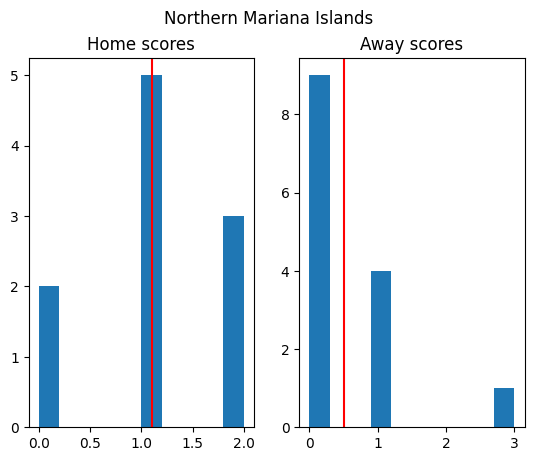

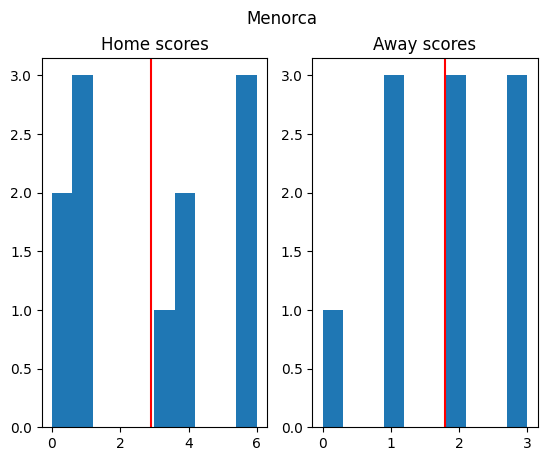

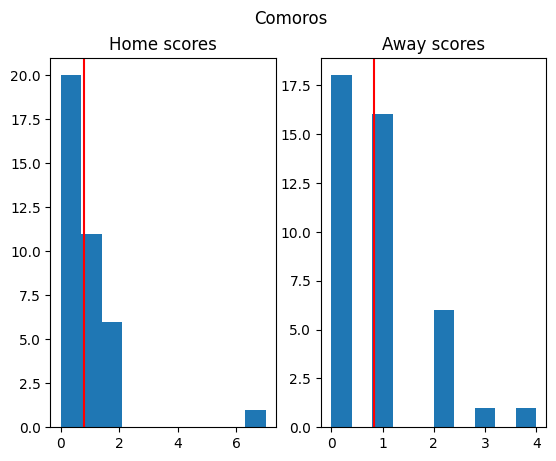

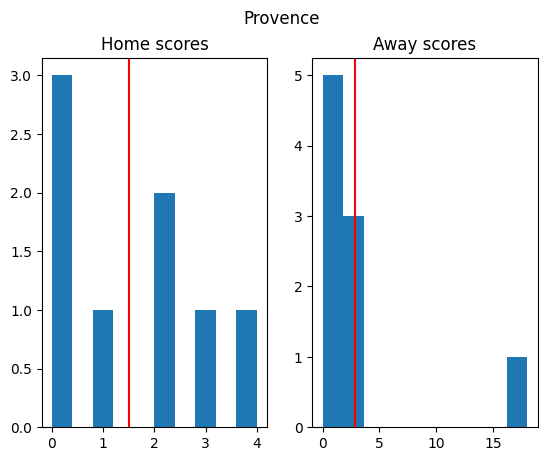

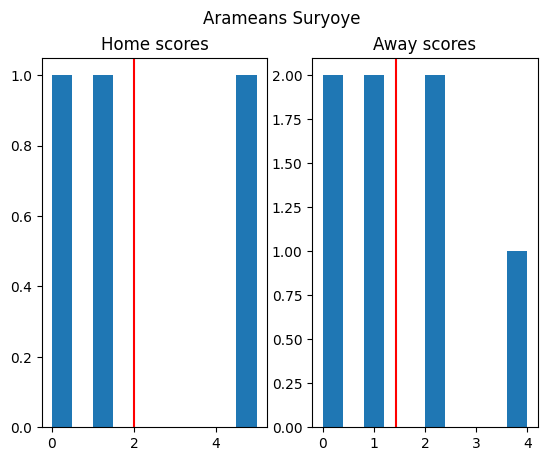

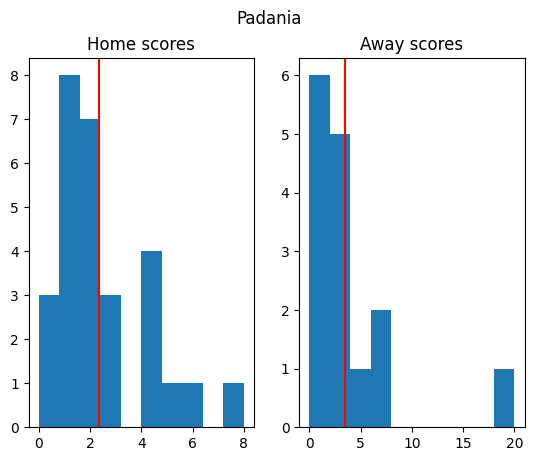

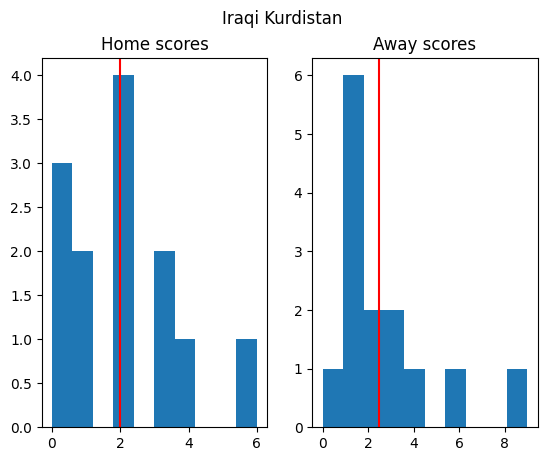

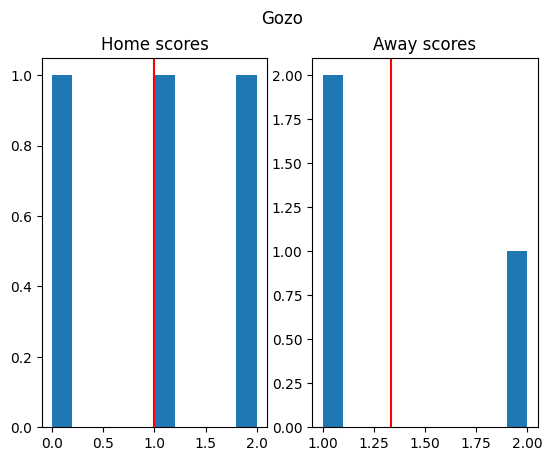

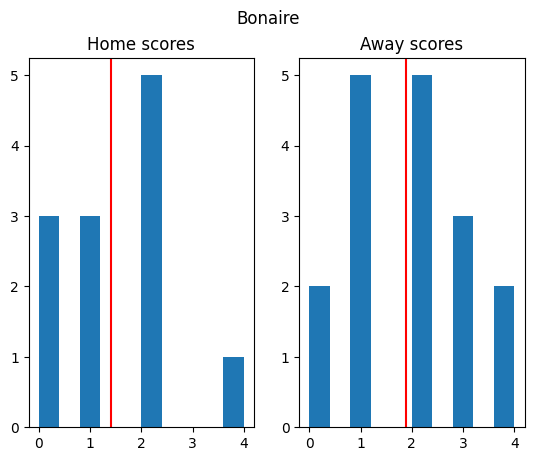

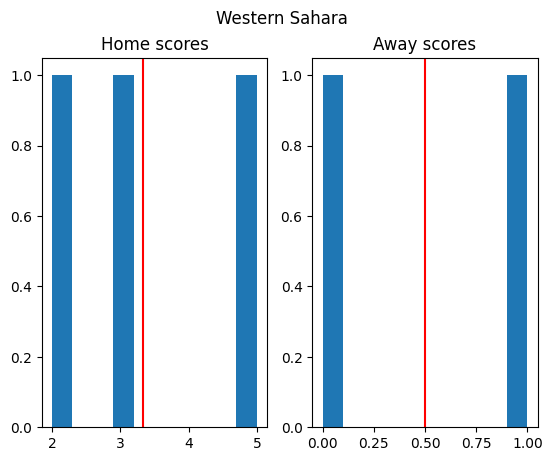

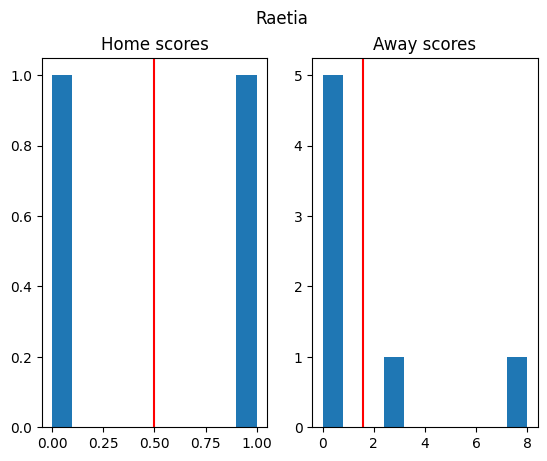

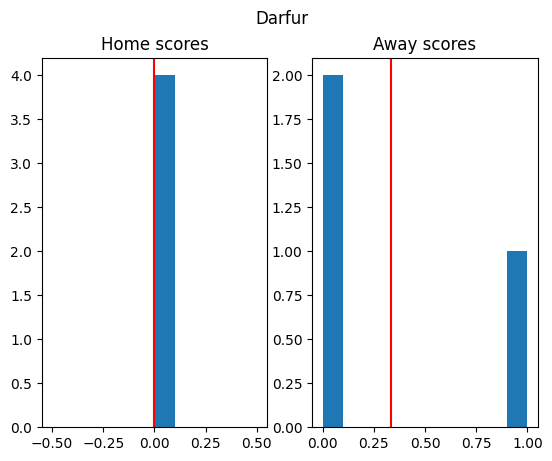

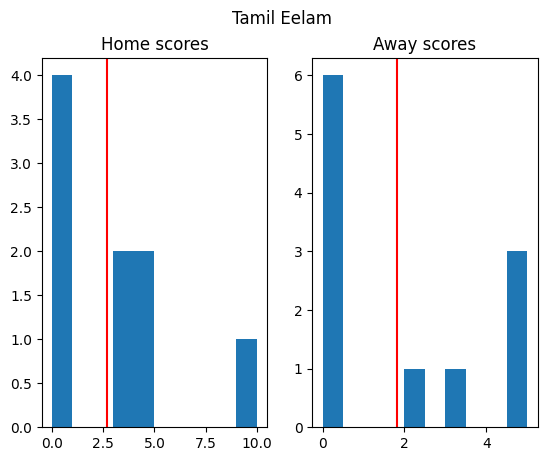

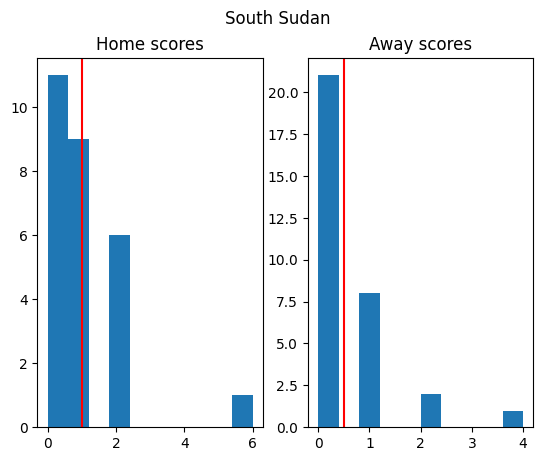

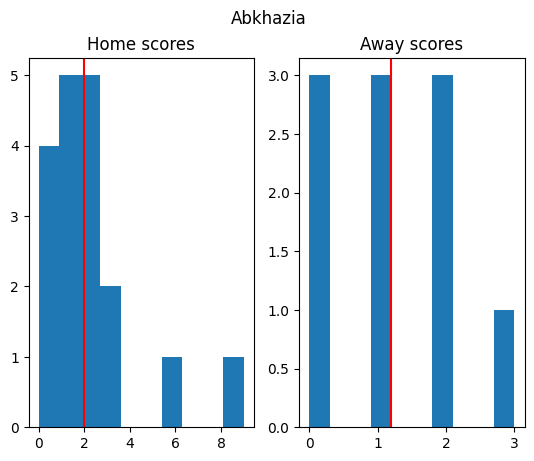

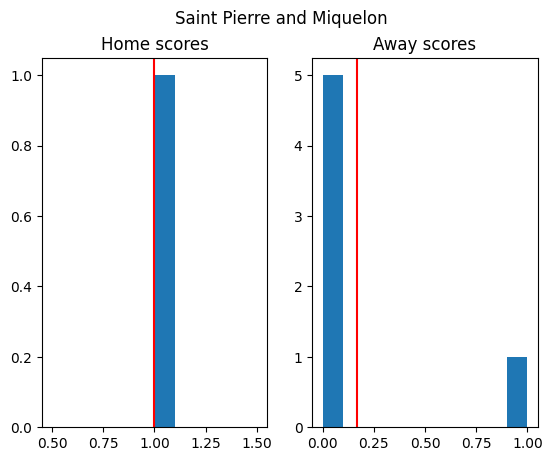

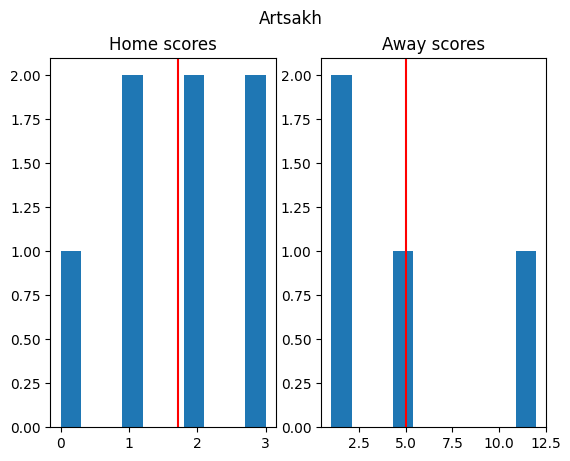

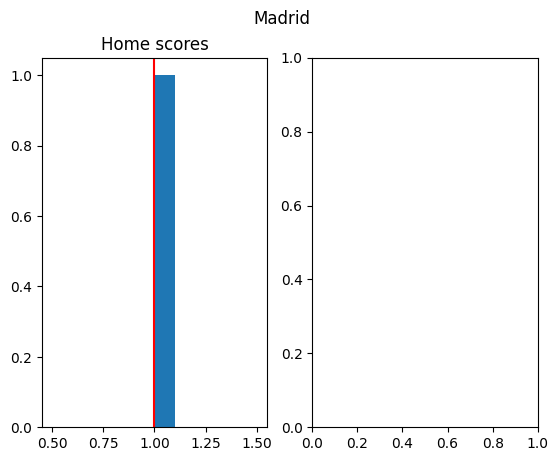

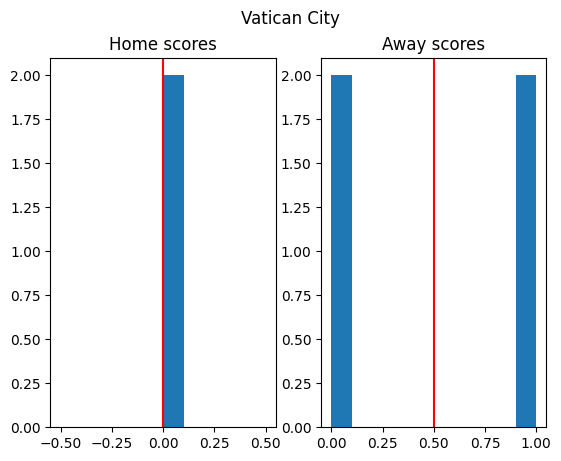

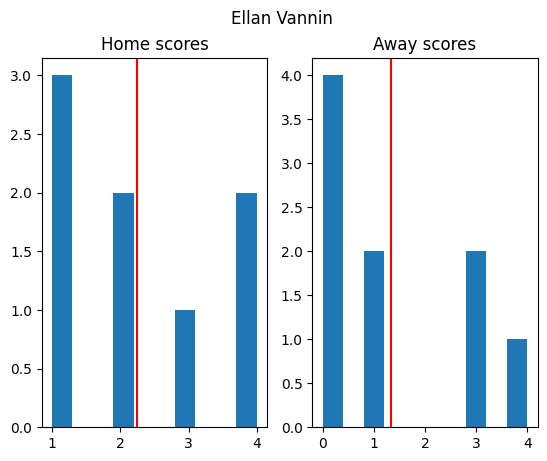

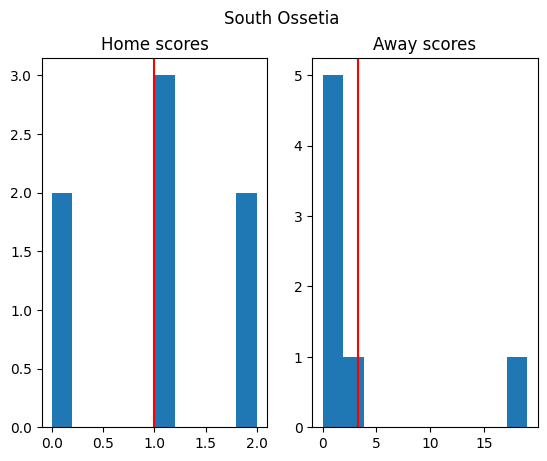

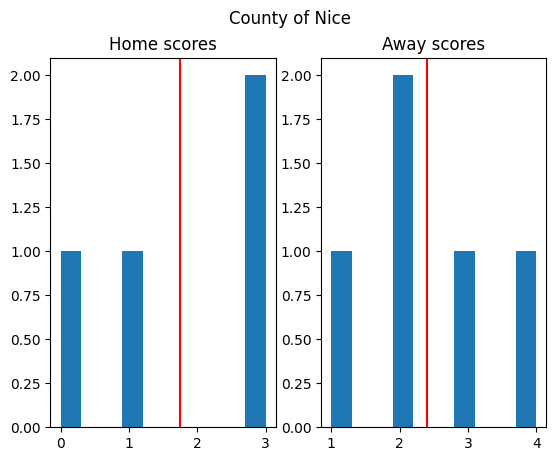

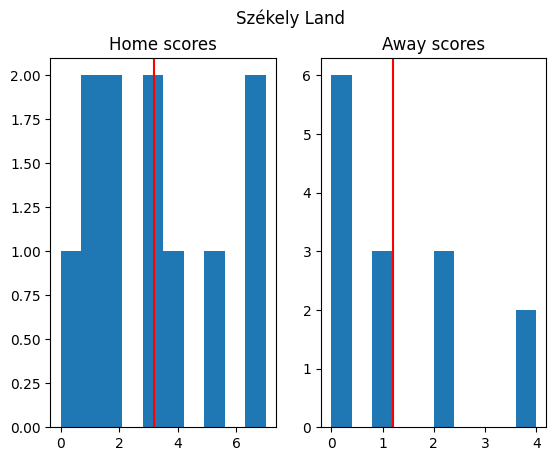

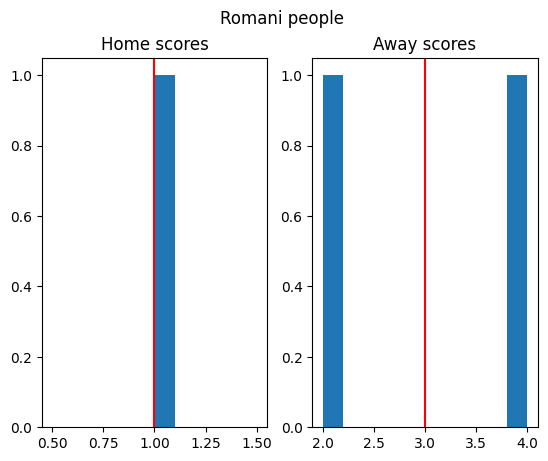

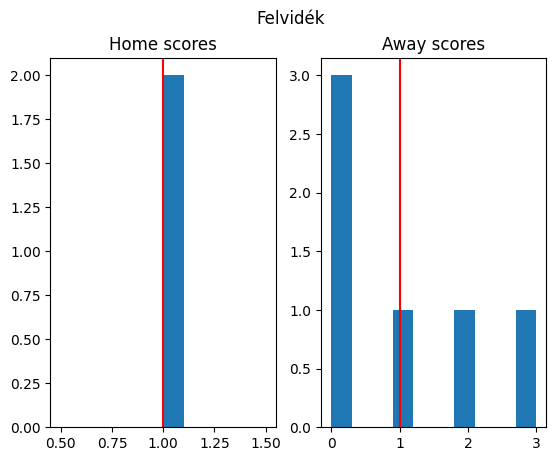

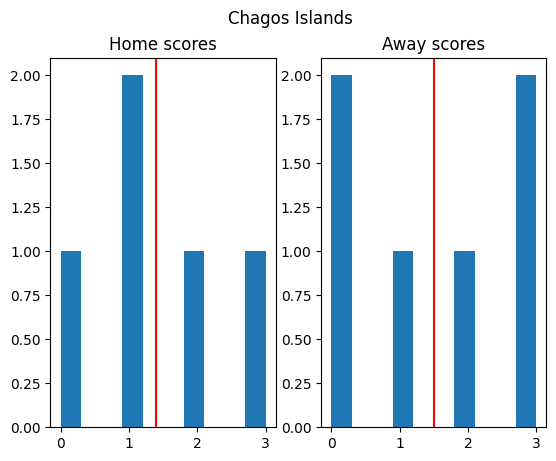

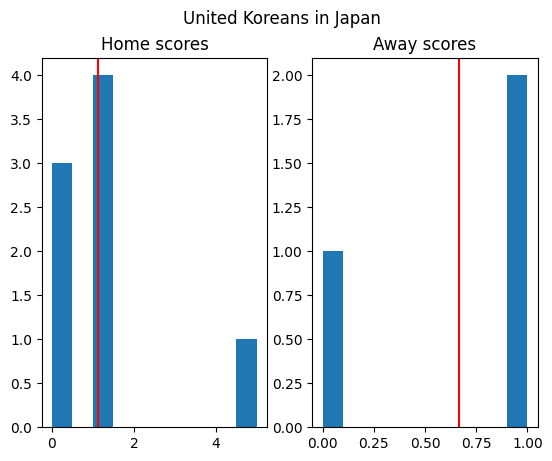

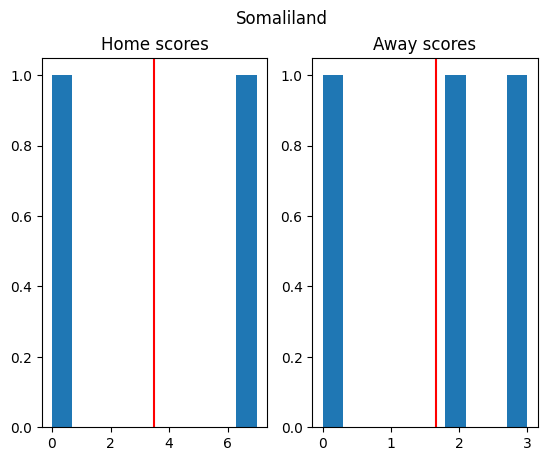

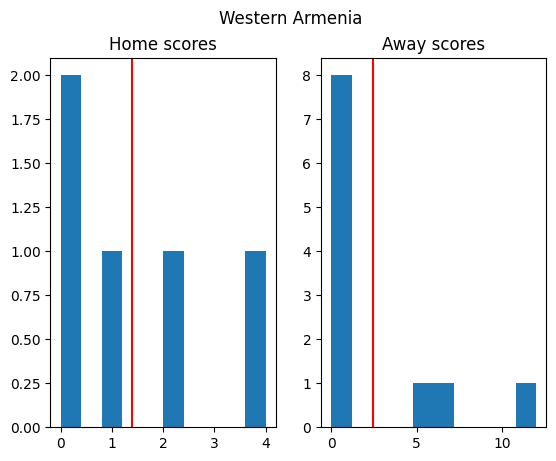

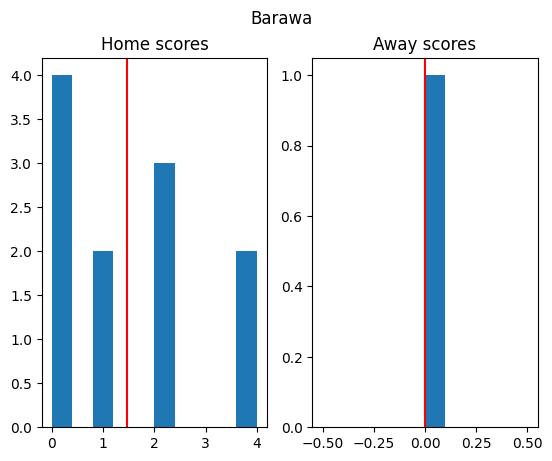

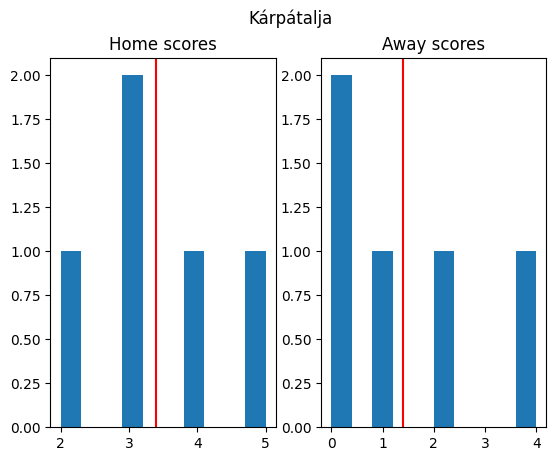

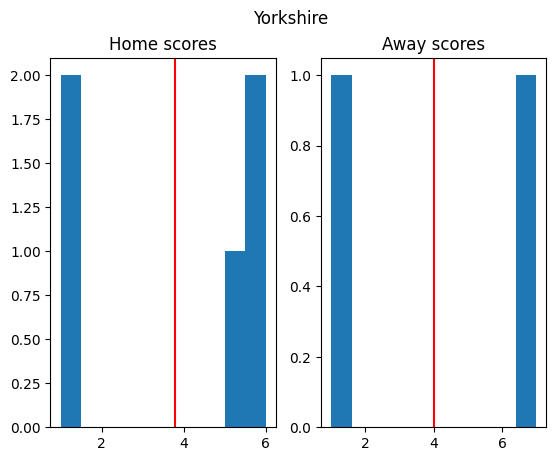

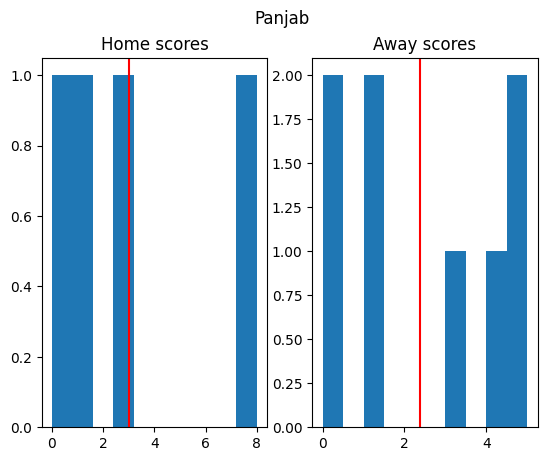

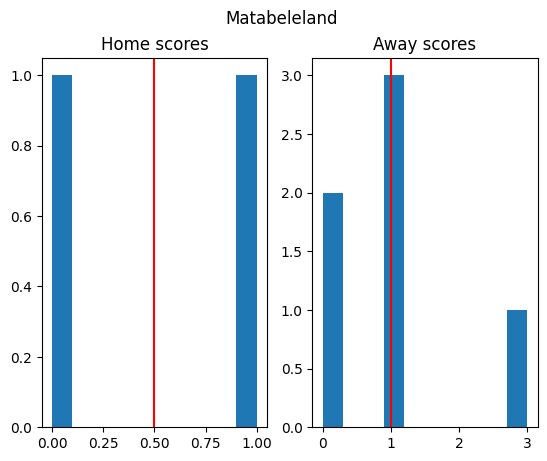

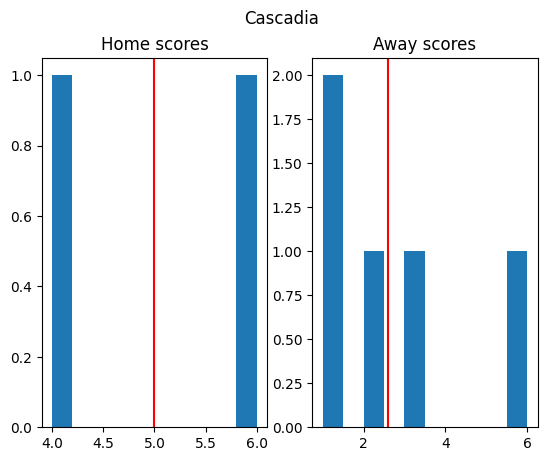

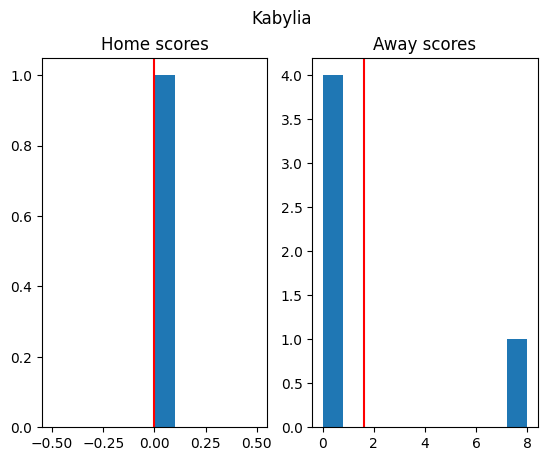

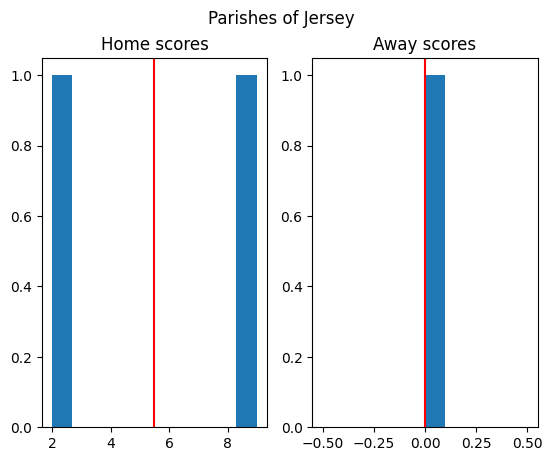

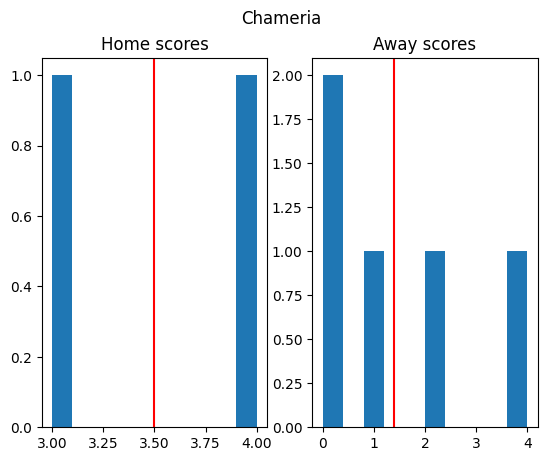

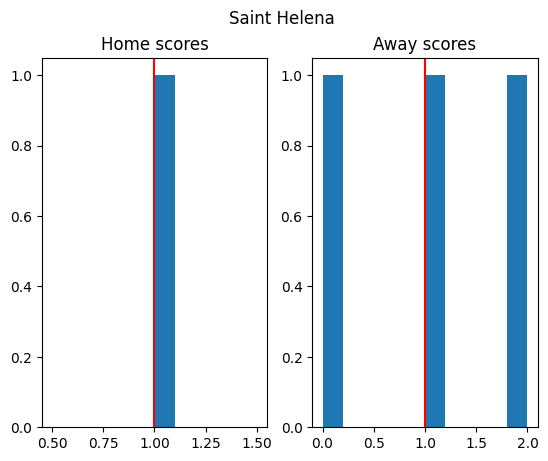

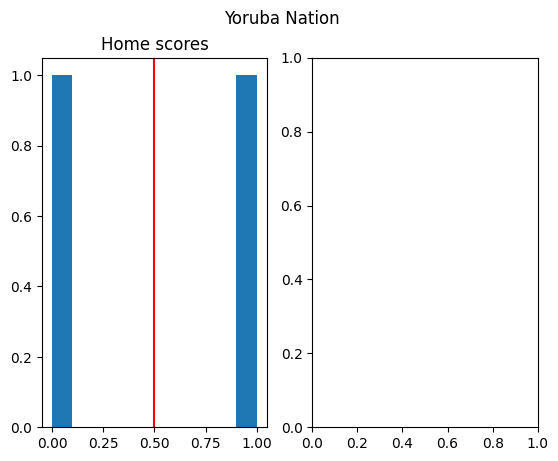

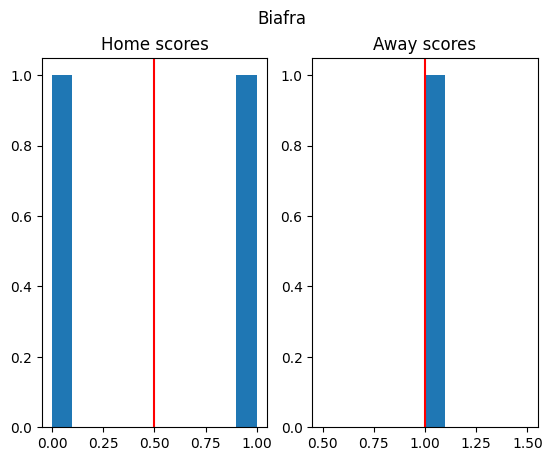

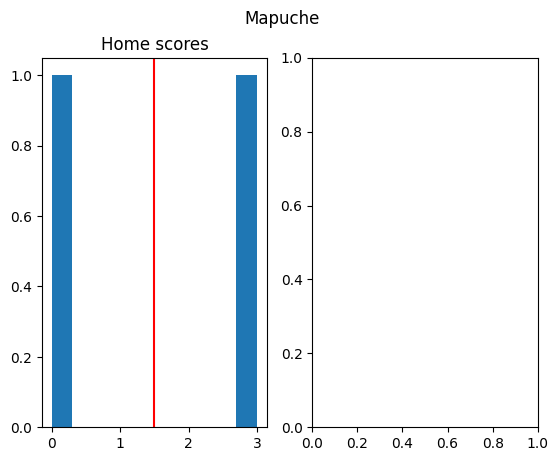

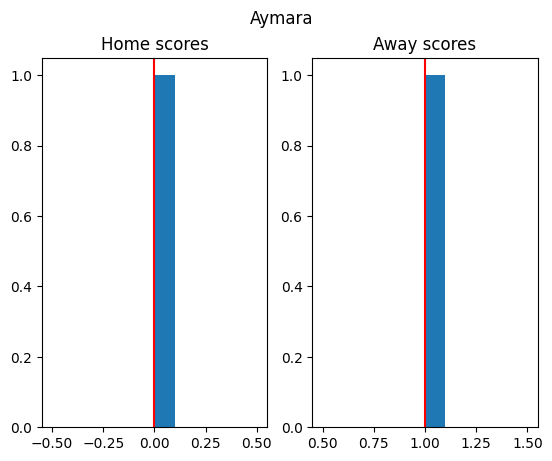

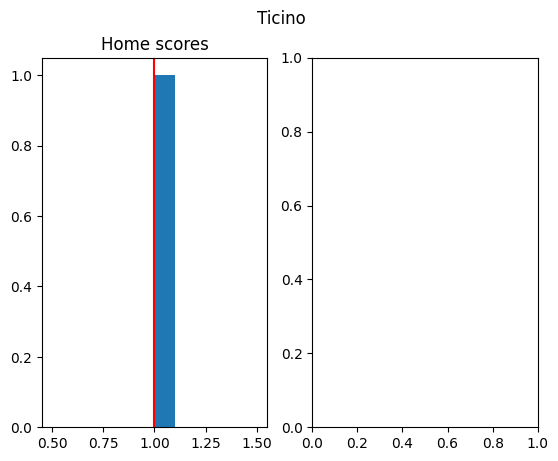

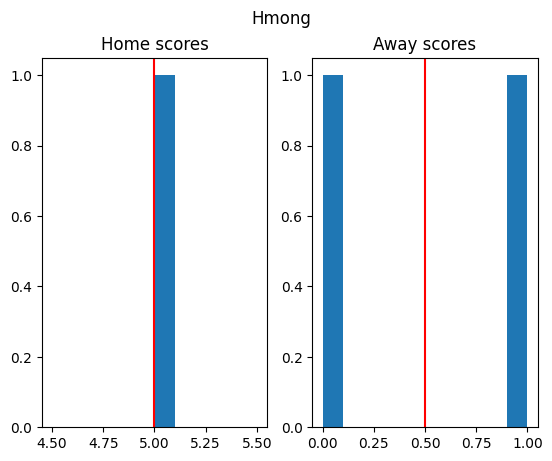

In [49]:
for team in results_home.keys():
    fig, (home, away) = plt.subplots(ncols=2)
    home.hist(results_home[team])
    home.set_title('Home scores')
    home.vlines(av_results_home[team], ymin=0, ymax=1,
                transform=home.get_xaxis_transform(), color='r')
    fig.suptitle(team)
    if team in results_away.keys():
        away.hist(results_away[team])
        away.set_title('Away scores')
        away.vlines(av_results_away[team], ymin=0, ymax=1,
                    transform=away.get_xaxis_transform(), color='r')
    plt.show()

# Suggestions

We could transform the european_teams list into a dictionnary with the UEFA index/ranking of each country.

We found datasets containing players with their physical and game stats.\
However, most of them focus on the top 5 European leagues...